In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
pd.__version__

'1.1.3'

In [2]:
df_labels = pd.read_csv('labels.txt',sep='\n', delimiter=',', header=None )

# Function to remove dublicates from labels.

In [3]:
def uniquify(df_columns):
    df_columns = df_columns.T.iloc[0,:]
    seen = list()

    for item in df_columns:
        fudge = 'hand'
        newitem = item
        
        if newitem in seen:
            newitem = "{}_{}".format(item, fudge)

        seen.append(newitem)
    return seen
        
label_list = uniquify(df_labels)
label_list

['Subject index (1-40)',
 'ECG_original_mean',
 'ECG_original_std',
 'ECG_original_trimmean25',
 'ECG_original_median',
 'ECG_original_skewness',
 'ECG_original_kurtosis',
 'ECG_original_max',
 'ECG_original_min',
 'ECG_original_prctile25',
 'ECG_original_prctile75',
 'ECG_original_geomean(abs)',
 'ECG_original_harmmean',
 'ECG_original_mad',
 'ECG_original_baseline',
 'ECG_RR_window_mean',
 'ECG_RR_window_std',
 'ECG_RR_window_trimmean25',
 'ECG_RR_window_median',
 'ECG_RR_window_skewness',
 'ECG_RR_window_kurtosis',
 'ECG_RR_window_max',
 'ECG_RR_window_min',
 'ECG_RR_window_prctile25',
 'ECG_RR_window_prctile75',
 'ECG_RR_window_geomean(abs)',
 'ECG_RR_window_harmmean',
 'ECG_RR_window_mad',
 'ECG_RR_window_baseline',
 'ECG_amplitude_RR_mean',
 'ECG_amplitude_RR_std',
 'ECG_amplitude_RR_trimmean25',
 'ECG_amplitude_RR_median',
 'ECG_amplitude_RR_skewness',
 'ECG_amplitude_RR_kurtosis',
 'ECG_amplitude_RR_max',
 'ECG_amplitude_RR_min',
 'ECG_amplitude_RR_prctile25',
 'ECG_amplitude_R

In [4]:
df = pd.read_csv('data.txt', header=None, names=label_list, na_values = 'N/A')#, set_flags(allows_duplicate_labels=False))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4480 entries, 0 to 4479
Columns: 535 entries, Subject index (1-40) to Activity
dtypes: float64(520), int64(14), object(1)
memory usage: 18.3+ MB


In [6]:
df.head()

,Subject index (1-40),ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,...,EDA_Functionals_power_Filt2kurtosis_hand,EDA_Functionals_power_Filt2max_hand,EDA_Functionals_power_Filt2min_hand,EDA_Functionals_power_Filt2prctile25_hand,EDA_Functionals_power_Filt2prctile75_hand,EDA_Functionals_power_Filt2geomean(abs)_hand,EDA_Functionals_power_Filt2harmmean_hand,EDA_Functionals_power_Filt2mad_hand,EDA_Functionals_power_Filt2baseline_hand,Activity
0,1,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,...,1015.36,717032000.0,0.027384,2.53425,17.3882,8.05589,1.80247,1413310.0,3028080.0,.0f
1,1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,...,1015.78,705854000.0,0.016947,2.51513,16.5914,7.81769,1.52349,1390180.0,3016420.0,.0f
2,1,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.66530,0.87563,-0.71937,-0.08037,...,1016.16,627018000.0,0.008129,2.25959,15.2312,7.11684,1.25860,1234110.0,3004430.0,.0f
3,1,0.014525,0.176636,-0.006161,-0.02737,1.024900,6.10968,0.91063,-0.71937,-0.08037,...,1015.61,559748000.0,0.007377,2.13924,14.4663,6.70236,1.26643,1102720.0,2992170.0,.0f
4,1,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,...,1015.67,484473000.0,0.011448,1.93595,12.5493,6.08647,1.22387,954322.0,2979610.0,.0f


# Changing the label col from object to numbers.

In [7]:
df.iloc[:,-1].unique()
# array(['\x01.0f', '\x03.0f', '\x02.0f', '\x04.0f'], dtype=object)

for index, rows in df.iterrows():
    if df.loc[index, 'Activity'] == '\x01.0f':
        df.loc[index, 'Activity'] = 1
    elif df.loc[index, 'Activity'] == '\x02.0f':
        df.loc[index, 'Activity'] = 2
    elif df.loc[index, 'Activity'] == '\x03.0f':
        df.loc[index, 'Activity'] = 3
    elif df.loc[index, 'Activity'] == '\x04.0f':
        df.loc[index, 'Activity'] = 4

# Checking for NA

In [8]:
for col in range(df.shape[1]):
    # YOUR CODE HERE
    n_miss = df.isnull().sum(axis=0)
    print('Column {} has {} missing values.'.format(col, n_miss.iloc[col]))
# No NA in dataset.

Column 0 has 0 missing values.
Column 1 has 0 missing values.
Column 2 has 0 missing values.
Column 3 has 0 missing values.
Column 4 has 0 missing values.
Column 5 has 0 missing values.
Column 6 has 0 missing values.
Column 7 has 0 missing values.
Column 8 has 0 missing values.
Column 9 has 0 missing values.
Column 10 has 0 missing values.
Column 11 has 0 missing values.
Column 12 has 0 missing values.
Column 13 has 0 missing values.
Column 14 has 0 missing values.
Column 15 has 0 missing values.
Column 16 has 0 missing values.
Column 17 has 0 missing values.
Column 18 has 0 missing values.
Column 19 has 0 missing values.
Column 20 has 0 missing values.
Column 21 has 0 missing values.
Column 22 has 0 missing values.
Column 23 has 0 missing values.
Column 24 has 0 missing values.
Column 25 has 0 missing values.
Column 26 has 0 missing values.
Column 27 has 0 missing values.
Column 28 has 0 missing values.
Column 29 has 0 missing values.
Column 30 has 0 missing values.
Column 31 has 0 mi

Column 262 has 0 missing values.
Column 263 has 0 missing values.
Column 264 has 0 missing values.
Column 265 has 0 missing values.
Column 266 has 0 missing values.
Column 267 has 0 missing values.
Column 268 has 0 missing values.
Column 269 has 0 missing values.
Column 270 has 0 missing values.
Column 271 has 0 missing values.
Column 272 has 0 missing values.
Column 273 has 0 missing values.
Column 274 has 0 missing values.
Column 275 has 0 missing values.
Column 276 has 0 missing values.
Column 277 has 0 missing values.
Column 278 has 0 missing values.
Column 279 has 0 missing values.
Column 280 has 0 missing values.
Column 281 has 0 missing values.
Column 282 has 0 missing values.
Column 283 has 0 missing values.
Column 284 has 0 missing values.
Column 285 has 0 missing values.
Column 286 has 0 missing values.
Column 287 has 0 missing values.
Column 288 has 0 missing values.
Column 289 has 0 missing values.
Column 290 has 0 missing values.
Column 291 has 0 missing values.
Column 292

Column 511 has 0 missing values.
Column 512 has 0 missing values.
Column 513 has 0 missing values.
Column 514 has 0 missing values.
Column 515 has 0 missing values.
Column 516 has 0 missing values.
Column 517 has 0 missing values.
Column 518 has 0 missing values.
Column 519 has 0 missing values.
Column 520 has 0 missing values.
Column 521 has 0 missing values.
Column 522 has 0 missing values.
Column 523 has 0 missing values.
Column 524 has 0 missing values.
Column 525 has 0 missing values.
Column 526 has 0 missing values.
Column 527 has 0 missing values.
Column 528 has 0 missing values.
Column 529 has 0 missing values.
Column 530 has 0 missing values.
Column 531 has 0 missing values.
Column 532 has 0 missing values.
Column 533 has 0 missing values.
Column 534 has 0 missing values.


* Do we have to normalize all data?

# Summary statistics: 

* The first column correspond to the index of the subject. (1 - 40)
* The next 174 attributes are statistics extracted from the ECG signal. 
* The next 151 attributes are features extracted from the TEB signal. 
* The next 104 attributes come from the EDA measured in the arm.
* The next 104 ones from the EDA in the hand. 
* The last attribute is the pattern class, that is, the corresponding activity: 1-neutral, 2-emotional, 3-mental and 4-physical.

Ide:
 * Group by subject
 * Group by Activity 
 * Filter( string detect (median | mean | std) opmærksom på at "fil" findes med de samme.

In [9]:
df.head()

,Subject index (1-40),ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,...,EDA_Functionals_power_Filt2kurtosis_hand,EDA_Functionals_power_Filt2max_hand,EDA_Functionals_power_Filt2min_hand,EDA_Functionals_power_Filt2prctile25_hand,EDA_Functionals_power_Filt2prctile75_hand,EDA_Functionals_power_Filt2geomean(abs)_hand,EDA_Functionals_power_Filt2harmmean_hand,EDA_Functionals_power_Filt2mad_hand,EDA_Functionals_power_Filt2baseline_hand,Activity
0,1,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,...,1015.36,717032000.0,0.027384,2.53425,17.3882,8.05589,1.80247,1413310.0,3028080.0,1
1,1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,...,1015.78,705854000.0,0.016947,2.51513,16.5914,7.81769,1.52349,1390180.0,3016420.0,1
2,1,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.66530,0.87563,-0.71937,-0.08037,...,1016.16,627018000.0,0.008129,2.25959,15.2312,7.11684,1.25860,1234110.0,3004430.0,1
3,1,0.014525,0.176636,-0.006161,-0.02737,1.024900,6.10968,0.91063,-0.71937,-0.08037,...,1015.61,559748000.0,0.007377,2.13924,14.4663,6.70236,1.26643,1102720.0,2992170.0,1
4,1,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,...,1015.67,484473000.0,0.011448,1.93595,12.5493,6.08647,1.22387,954322.0,2979610.0,1


# Visualization:

<AxesSubplot:xlabel='Activity', ylabel='value'>

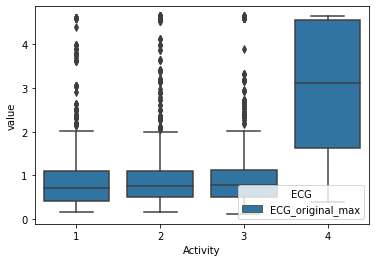

In [10]:
import seaborn as sns

dd=pd.melt(df,id_vars=['Activity'],value_vars=['ECG_original_max'],var_name='ECG')
sns.boxplot(x='Activity',y='value',data=dd,hue='ECG')


<AxesSubplot:xlabel='Activity', ylabel='value'>

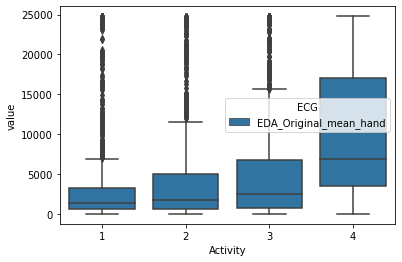

In [11]:
dd=pd.melt(df,id_vars=['Activity'],value_vars=['EDA_Original_mean_hand'],var_name='ECG')
sns.boxplot(x='Activity',y='value',data=dd,hue='ECG')

<AxesSubplot:xlabel='Activity', ylabel='value'>

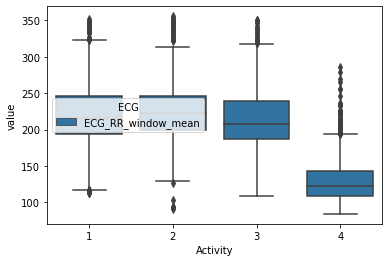

In [12]:
dd=pd.melt(df,id_vars=['Activity'],value_vars=['ECG_RR_window_mean'],var_name='ECG')
sns.boxplot(x='Activity',y='value',data=dd,hue='ECG')

In [ ]:
### LOGISTIC REGRESSION WITH ANOVA FILTER ###

Removed  ECG_p_VFL_kurtosis
Removed  ECG_p_LF_kurtosis
Removed  IT_VLF_kurtosis
Removed  IT_LF_kurtosis_hand


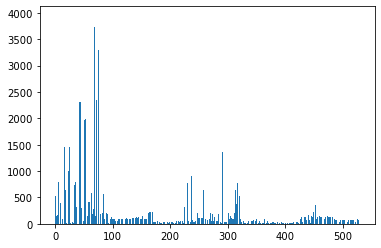

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV


X=df.iloc[:,0:-1]
y=df.iloc[ :, -1:]
X.drop(['Subject index (1-40)'], axis=1, inplace=True) #Removed subject index

constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X)
constant_columns = [column for column in X.columns if column not in X.columns[constant_filter.get_support()]]
for column in constant_columns:
    print("Removed ", column)
    X.drop([column], axis=1, inplace=True)

# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(X)

"""
# boxplot of scaled data 
dfX = pd.DataFrame(scaled)
dfy = pd.DataFrame(y)
cdf=dfX.join(dfy)

dd=pd.melt(cdf,id_vars=['Activity'],value_vars=[6],var_name='ECG')
sns.boxplot(x='Activity',y='value',data=dd)

"""

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, stratify=y, random_state=0)

# ANOVA
# 1) anova filter, take best ranked features
anova_filter = SelectKBest(f_classif, k=40)
# learn relationship from training data
anova_filter.fit(X_train, y_train.values.ravel())
# transform train input data
X_train_anova_filter = anova_filter.transform(X_train)
# transform test input data
X_test_anova_filter = anova_filter.transform(X_test)


# what are scores for the features
#for i in range(len(anova_filter.scores_)):
#    print('Feature %d: %f' % (i, anova_filter.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(anova_filter.scores_))], anova_filter.scores_)
pyplot.show()

In [215]:
y_train=y_train.astype('int')


Cs = [1, 10, 20, 50] #1, 10, 20, 
solvers=[newton-cg', 'lbfgs', 'sag','saga'] #newton-cg', 'lbfgs', 'sag',
penaltys=['l1', 'l2'] #, 'l2'

param_grid_lr = dict(C=Cs, solver=solvers, penalty=penaltys)

grid = GridSearchCV(LogisticRegression(multi_class='multinomial',max_iter=10000), param_grid=param_grid_lr,
                    cv=3, return_train_score=True, verbose=True) 

lr=grid.fit(X_train, y_train.values.ravel())

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

res = pd.DataFrame(grid.cv_results_)
pivot=res.pivot_table(index=["param_C","param_solver","param_penalty"],
                values=['mean_train_score', "mean_test_score"])
print (pivot)

pred = lr.predict(X_test)
y_test=y_test.astype('int')
print("Accuracy: {:.3f}".format(accuracy_score(y_test.values.ravel(), pred)))
print("Confusion matrix:")
conf=confusion_matrix(y_test.values.ravel(), pred)

print(conf)

y_axis_labels = ['P_Neutral','P_Emotional','P_Mental','P_Physical'] # labels for y-axis
x_axis_labels = ['T_Neutral','T_Emotional','T_Mental','T_Physical']

g=sns.heatmap((4*conf)/np.sum(conf), annot=True, 
            fmt='.2%', cmap='Blues', yticklabels=y_axis_labels, xticklabels=x_axis_labels)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 8)

print(classification_report(y_test.values.ravel(), pred))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished


best mean cross-validation score: 0.834
best parameters: {'C': 50, 'penalty': 'l1', 'solver': 'saga'}
                                    mean_test_score  mean_train_score
param_C param_solver param_penalty                                   
50      saga         l1                    0.833705          0.865234


ValueError: X has 60 features per sample; expecting 64

In [253]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99, whiten=True)
pca_transformed = pca.fit_transform(scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_transformed, y, test_size=0.2, stratify=y, random_state=0)

(4480, 64)


Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Rasmus Lynggaard\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rasmus Lynggaard\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rasmus Lynggaard\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Rasmus Lynggaard\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warning

C:\Users\Rasmus Lynggaard\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rasmus Lynggaard\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rasmus Lynggaard\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Rasmus Lynggaard\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rasmus Lyngg

best mean cross-validation score: 0.837
best parameters: {'C': 50, 'penalty': 'l2', 'solver': 'newton-cg'}
                                    mean_test_score  mean_train_score
param_C param_solver param_penalty                                   
1       lbfgs        l2                    0.827009          0.865792
        newton-cg    l2                    0.826730          0.865792
        sag          l2                    0.827009          0.865792
        saga         l1                    0.828404          0.865792
                     l2                    0.825893          0.864118
10      lbfgs        l2                    0.832589          0.873047
        newton-cg    l2                    0.832589          0.873326
        sag          l2                    0.830915          0.870815
        saga         l1                    0.831752          0.870815
                     l2                    0.831194          0.870815
20      lbfgs        l2                    0.833705  

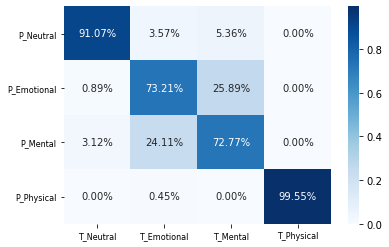

In [255]:
y_train_pca=y_train_pca.astype('int')

Cs = [1, 10, 20,50] #1, 10, 20, 
solvers=['newton-cg', 'lbfgs', 'sag','saga'] #'newton-cg', 'lbfgs', 'sag', 
penaltys=['l1', 'l2'] #, 'l2'

param_grid_lr = dict(C=Cs, solver=solvers, penalty=penaltys)

grid = GridSearchCV(LogisticRegression(multi_class='multinomial',max_iter=10000), param_grid=param_grid_lr,
                    cv=2, return_train_score=True, verbose=True) 

lr=grid.fit(X_train_pca, y_train_pca.values.ravel())

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

res = pd.DataFrame(grid.cv_results_)
pivot=res.pivot_table(index=["param_C","param_solver","param_penalty"],
                values=['mean_train_score', "mean_test_score"])
print (pivot)

pred = lr.predict(X_test_pca)
y_test_pca=y_test_pca.astype('int')
print("Accuracy: {:.3f}".format(accuracy_score(y_test_pca.values.ravel(), pred)))
print("Confusion matrix:")
conf=confusion_matrix(y_test_pca.values.ravel(), pred)

print(conf)

y_axis_labels = ['P_Neutral','P_Emotional','P_Mental','P_Physical'] # labels for y-axis
x_axis_labels = ['T_Neutral','T_Emotional','T_Mental','T_Physical']

g=sns.heatmap((4*conf)/np.sum(conf), annot=True, 
            fmt='.2%', cmap='Blues', yticklabels=y_axis_labels, xticklabels=x_axis_labels)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 8)


print(classification_report(y_test_pca.values.ravel(), pred))

In [21]:
######## NN #########

(3584, 529)


In [76]:
from sklearn.preprocessing import OneHotEncoder

y_train=y_train.astype('int')
y_test=y_test.astype('int')

y_train_one = OneHotEncoder().fit_transform(y_train).toarray()
print(y_train_one)

y_test_one = OneHotEncoder().fit_transform(y_test).toarray()
print(y_test_one)

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [260]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Activation, Input, Conv1D, Dropout
import tensorflow as tf
import numpy


batch_sizes = [32] # 8, 16, 32, 64 
epochs = [250] # 25, 50, 100, 250, 400 
optimizers = ['Adam', 'Adamax', 'Nadam'] # 'Adam', 'RMSprop', #'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam' 
activations = ['relu', 'tanh', 'elu'] # 'relu', 'tanh', # 'softmax','softplus', 'relu', 'tanh', 'sigmoid', 'linear', 'elu' 
dropout_rates = [0.1 ,0.3 , 0.5] # ,0.2,0.3  #0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9
neurons = [120] #80,  #10,20,40,80,120,160

def create_model(optimizer='rmsprop', activation='softmax', dropout_rate=0.0, neurons=1):
        model = Sequential()
        model.add(Input(shape=(X_train_anova_filter.shape[1],)))
        model.add(Dense(neurons, activation=activation))
        model.add(Dropout(dropout_rate))
        model.add(Dense(neurons, activation=activation))
        model.add(Dropout(dropout_rate))
        model.add(Dense(neurons, activation=activation))
        model.add(Dense(4, activation='softmax'))
    
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        return model
 
clf = KerasClassifier(build_fn=create_model)
param_grid = dict(neurons=neurons,batch_size=batch_sizes,epochs=epochs,optimizer=optimizers, activation=activations, dropout_rate=dropout_rates)

grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=2, return_train_score=True)
grid_result = grid.fit(X_train_anova_filter, y_train_one, validation_split = 0.2, verbose=1)

Epoch 1/250
45/45 [==============================] - 1s 13ms/step - loss: 1.1419 - accuracy: 0.5097 - val_loss: 0.6730 - val_accuracy: 0.6797
Epoch 2/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.6961 - val_loss: 0.6498 - val_accuracy: 0.7103
Epoch 3/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.6674 - val_loss: 0.6421 - val_accuracy: 0.7075
Epoch 4/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6990 - accuracy: 0.6789 - val_loss: 0.6591 - val_accuracy: 0.6351
Epoch 5/250
45/45 [==============================] - 0s 7ms/step - loss: 0.6759 - accuracy: 0.6551 - val_loss: 0.6322 - val_accuracy: 0.6964
Epoch 6/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6669 - accuracy: 0.6740 - val_loss: 0.6207 - val_accuracy: 0.7214
Epoch 7/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6848 - accuracy: 0.6822 - val_loss: 0.6082 - val_accuracy: 0.7242
Epoch 8/250


Epoch 59/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5732 - accuracy: 0.7497 - val_loss: 0.5923 - val_accuracy: 0.7437
Epoch 60/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5566 - accuracy: 0.7452 - val_loss: 0.5855 - val_accuracy: 0.7465
Epoch 61/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5396 - accuracy: 0.7435 - val_loss: 0.5828 - val_accuracy: 0.7437
Epoch 62/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5528 - accuracy: 0.7414 - val_loss: 0.5799 - val_accuracy: 0.7521
Epoch 63/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5367 - accuracy: 0.7519 - val_loss: 0.5926 - val_accuracy: 0.7437
Epoch 64/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5281 - accuracy: 0.7631 - val_loss: 0.5870 - val_accuracy: 0.7577
Epoch 65/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5142 - accuracy: 0.7684 - val_loss: 0.5924 - val_accuracy: 0.7521
Epoch 

45/45 [==============================] - 0s 4ms/step - loss: 0.4548 - accuracy: 0.7988 - val_loss: 0.6204 - val_accuracy: 0.7409
Epoch 117/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4850 - accuracy: 0.7766 - val_loss: 0.6262 - val_accuracy: 0.7437
Epoch 118/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5119 - accuracy: 0.7641 - val_loss: 0.6448 - val_accuracy: 0.7437
Epoch 119/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4863 - accuracy: 0.7860 - val_loss: 0.5935 - val_accuracy: 0.7326
Epoch 120/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4556 - accuracy: 0.8014 - val_loss: 0.6183 - val_accuracy: 0.7521
Epoch 121/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4818 - accuracy: 0.7814 - val_loss: 0.6237 - val_accuracy: 0.7382
Epoch 122/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4871 - accuracy: 0.7718 - val_loss: 0.6189 - val_accuracy: 0.7409
Epoch 123/250

45/45 [==============================] - 0s 4ms/step - loss: 0.4421 - accuracy: 0.7950 - val_loss: 0.6561 - val_accuracy: 0.7493
Epoch 174/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4113 - accuracy: 0.8155 - val_loss: 0.6825 - val_accuracy: 0.7437
Epoch 175/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.7896 - val_loss: 0.6847 - val_accuracy: 0.7493
Epoch 176/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4744 - accuracy: 0.7727 - val_loss: 0.6785 - val_accuracy: 0.7549
Epoch 177/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4681 - accuracy: 0.7804 - val_loss: 0.6372 - val_accuracy: 0.7549
Epoch 178/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4769 - accuracy: 0.7906 - val_loss: 0.6437 - val_accuracy: 0.7465
Epoch 179/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4596 - accuracy: 0.7986 - val_loss: 0.6505 - val_accuracy: 0.7549
Epoch 180/250

45/45 [==============================] - 0s 5ms/step - loss: 0.4413 - accuracy: 0.7963 - val_loss: 0.6379 - val_accuracy: 0.7604
Epoch 231/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4288 - accuracy: 0.8006 - val_loss: 0.6711 - val_accuracy: 0.7799
Epoch 232/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4219 - accuracy: 0.8055 - val_loss: 0.6798 - val_accuracy: 0.7632
Epoch 233/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4269 - accuracy: 0.8083 - val_loss: 0.6676 - val_accuracy: 0.7465
Epoch 234/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4163 - accuracy: 0.8023 - val_loss: 0.6593 - val_accuracy: 0.7549
Epoch 235/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4193 - accuracy: 0.7873 - val_loss: 0.6648 - val_accuracy: 0.7772
Epoch 236/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4445 - accuracy: 0.7888 - val_loss: 0.6551 - val_accuracy: 0.7382
Epoch 237/250

45/45 [==============================] - 0s 4ms/step - loss: 0.5866 - accuracy: 0.7259 - val_loss: 0.7142 - val_accuracy: 0.6602
Epoch 37/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5810 - accuracy: 0.7498 - val_loss: 0.7117 - val_accuracy: 0.6657
Epoch 38/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5558 - accuracy: 0.7514 - val_loss: 0.7134 - val_accuracy: 0.6546
Epoch 39/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5838 - accuracy: 0.7363 - val_loss: 0.7313 - val_accuracy: 0.6490
Epoch 40/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6230 - accuracy: 0.7249 - val_loss: 0.7244 - val_accuracy: 0.6657
Epoch 41/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5701 - accuracy: 0.7249 - val_loss: 0.7109 - val_accuracy: 0.6490
Epoch 42/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5842 - accuracy: 0.7196 - val_loss: 0.7158 - val_accuracy: 0.6657
Epoch 43/250
45/45 

Epoch 94/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4923 - accuracy: 0.7728 - val_loss: 0.7007 - val_accuracy: 0.6992
Epoch 95/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4449 - accuracy: 0.8144 - val_loss: 0.6892 - val_accuracy: 0.6964
Epoch 96/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4892 - accuracy: 0.7730 - val_loss: 0.6961 - val_accuracy: 0.6797
Epoch 97/250
45/45 [==============================] - 0s 6ms/step - loss: 0.4962 - accuracy: 0.7753 - val_loss: 0.6948 - val_accuracy: 0.6769
Epoch 98/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4846 - accuracy: 0.7854 - val_loss: 0.6896 - val_accuracy: 0.6825
Epoch 99/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4756 - accuracy: 0.7822 - val_loss: 0.7260 - val_accuracy: 0.6908
Epoch 100/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4919 - accuracy: 0.7924 - val_loss: 0.7112 - val_accuracy: 0.6797
Epoch

45/45 [==============================] - 0s 3ms/step - loss: 0.4317 - accuracy: 0.8192 - val_loss: 0.7137 - val_accuracy: 0.6992
Epoch 152/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4078 - accuracy: 0.8198 - val_loss: 0.7326 - val_accuracy: 0.6992
Epoch 153/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8216 - val_loss: 0.7124 - val_accuracy: 0.6992
Epoch 154/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4203 - accuracy: 0.8170 - val_loss: 0.7382 - val_accuracy: 0.6908
Epoch 155/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4399 - accuracy: 0.8087 - val_loss: 0.7151 - val_accuracy: 0.6852
Epoch 156/250
45/45 [==============================] - 0s 5ms/step - loss: 0.3938 - accuracy: 0.8228 - val_loss: 0.7028 - val_accuracy: 0.6964
Epoch 157/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4224 - accuracy: 0.8205 - val_loss: 0.7087 - val_accuracy: 0.7047
Epoch 158/250

45/45 [==============================] - 0s 5ms/step - loss: 0.3843 - accuracy: 0.8348 - val_loss: 0.7929 - val_accuracy: 0.6908
Epoch 209/250
45/45 [==============================] - 0s 3ms/step - loss: 0.3880 - accuracy: 0.8126 - val_loss: 0.7235 - val_accuracy: 0.6964
Epoch 210/250
45/45 [==============================] - 0s 3ms/step - loss: 0.3605 - accuracy: 0.8412 - val_loss: 0.7381 - val_accuracy: 0.7214
Epoch 211/250
45/45 [==============================] - 0s 3ms/step - loss: 0.3383 - accuracy: 0.8579 - val_loss: 0.7248 - val_accuracy: 0.7187
Epoch 212/250
45/45 [==============================] - 0s 3ms/step - loss: 0.3308 - accuracy: 0.8575 - val_loss: 0.7988 - val_accuracy: 0.6852
Epoch 213/250
45/45 [==============================] - 0s 4ms/step - loss: 0.3893 - accuracy: 0.8137 - val_loss: 0.7366 - val_accuracy: 0.7075
Epoch 214/250
45/45 [==============================] - 0s 3ms/step - loss: 0.3783 - accuracy: 0.8412 - val_loss: 0.7138 - val_accuracy: 0.7187
Epoch 215/250

45/45 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6884 - val_loss: 0.6230 - val_accuracy: 0.7270
Epoch 15/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6470 - accuracy: 0.7026 - val_loss: 0.6219 - val_accuracy: 0.6964
Epoch 16/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6730 - accuracy: 0.6914 - val_loss: 0.6195 - val_accuracy: 0.7075
Epoch 17/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6808 - accuracy: 0.6798 - val_loss: 0.6151 - val_accuracy: 0.7242
Epoch 18/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6741 - accuracy: 0.6915 - val_loss: 0.6140 - val_accuracy: 0.7214
Epoch 19/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6247 - accuracy: 0.7194 - val_loss: 0.6095 - val_accuracy: 0.7242
Epoch 20/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.6877 - val_loss: 0.6151 - val_accuracy: 0.7075
Epoch 21/250
45/45 

Epoch 72/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5546 - accuracy: 0.7459 - val_loss: 0.5657 - val_accuracy: 0.7270
Epoch 73/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5923 - accuracy: 0.7253 - val_loss: 0.5698 - val_accuracy: 0.7465
Epoch 74/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5488 - accuracy: 0.7627 - val_loss: 0.5610 - val_accuracy: 0.7382
Epoch 75/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5709 - accuracy: 0.7438 - val_loss: 0.5594 - val_accuracy: 0.7437
Epoch 76/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5836 - accuracy: 0.7338 - val_loss: 0.5704 - val_accuracy: 0.7465
Epoch 77/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5739 - accuracy: 0.7435 - val_loss: 0.5604 - val_accuracy: 0.7409
Epoch 78/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5947 - accuracy: 0.7222 - val_loss: 0.5613 - val_accuracy: 0.7270
Epoch 

45/45 [==============================] - 0s 3ms/step - loss: 0.5230 - accuracy: 0.7691 - val_loss: 0.5606 - val_accuracy: 0.7577
Epoch 130/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5559 - accuracy: 0.7580 - val_loss: 0.5568 - val_accuracy: 0.7409
Epoch 131/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5352 - accuracy: 0.7408 - val_loss: 0.5586 - val_accuracy: 0.7465
Epoch 132/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5115 - accuracy: 0.7756 - val_loss: 0.5562 - val_accuracy: 0.7437
Epoch 133/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5545 - accuracy: 0.7430 - val_loss: 0.5560 - val_accuracy: 0.7577
Epoch 134/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5263 - accuracy: 0.7621 - val_loss: 0.5546 - val_accuracy: 0.7409
Epoch 135/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5335 - accuracy: 0.7553 - val_loss: 0.5549 - val_accuracy: 0.7465
Epoch 136/250

45/45 [==============================] - 0s 4ms/step - loss: 0.4985 - accuracy: 0.7791 - val_loss: 0.5703 - val_accuracy: 0.7409
Epoch 187/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.7782 - val_loss: 0.5651 - val_accuracy: 0.7437
Epoch 188/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5158 - accuracy: 0.7564 - val_loss: 0.5660 - val_accuracy: 0.7382
Epoch 189/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4828 - accuracy: 0.7711 - val_loss: 0.5714 - val_accuracy: 0.7242
Epoch 190/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5330 - accuracy: 0.7552 - val_loss: 0.5710 - val_accuracy: 0.7354
Epoch 191/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4886 - accuracy: 0.7701 - val_loss: 0.5658 - val_accuracy: 0.7354
Epoch 192/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5190 - accuracy: 0.7445 - val_loss: 0.5726 - val_accuracy: 0.7326
Epoch 193/250

45/45 [==============================] - 0s 4ms/step - loss: 0.4890 - accuracy: 0.7677 - val_loss: 0.5783 - val_accuracy: 0.7326
Epoch 244/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4987 - accuracy: 0.7783 - val_loss: 0.5766 - val_accuracy: 0.7493
Epoch 245/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4662 - accuracy: 0.7937 - val_loss: 0.5834 - val_accuracy: 0.7326
Epoch 246/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4903 - accuracy: 0.7745 - val_loss: 0.5812 - val_accuracy: 0.7354
Epoch 247/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4636 - accuracy: 0.7955 - val_loss: 0.5916 - val_accuracy: 0.7549
Epoch 248/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4889 - accuracy: 0.7734 - val_loss: 0.5853 - val_accuracy: 0.7354
Epoch 249/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4633 - accuracy: 0.7811 - val_loss: 0.5857 - val_accuracy: 0.7577
Epoch 250/250

45/45 [==============================] - 0s 4ms/step - loss: 0.6120 - accuracy: 0.7259 - val_loss: 0.7170 - val_accuracy: 0.6546
Epoch 50/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6012 - accuracy: 0.7240 - val_loss: 0.7174 - val_accuracy: 0.6657
Epoch 51/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5921 - accuracy: 0.7599 - val_loss: 0.7097 - val_accuracy: 0.6602
Epoch 52/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6210 - accuracy: 0.7210 - val_loss: 0.7173 - val_accuracy: 0.6490
Epoch 53/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5660 - accuracy: 0.7577 - val_loss: 0.7076 - val_accuracy: 0.6602
Epoch 54/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6135 - accuracy: 0.7251 - val_loss: 0.7133 - val_accuracy: 0.6602
Epoch 55/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5852 - accuracy: 0.7397 - val_loss: 0.7155 - val_accuracy: 0.6713
Epoch 56/250
45/45 

Epoch 107/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5445 - accuracy: 0.7564 - val_loss: 0.6917 - val_accuracy: 0.6574
Epoch 108/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5592 - accuracy: 0.7407 - val_loss: 0.7190 - val_accuracy: 0.6546
Epoch 109/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5761 - accuracy: 0.7413 - val_loss: 0.6973 - val_accuracy: 0.6769
Epoch 110/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5326 - accuracy: 0.7526 - val_loss: 0.7147 - val_accuracy: 0.6435
Epoch 111/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5469 - accuracy: 0.7480 - val_loss: 0.7053 - val_accuracy: 0.6518
Epoch 112/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5205 - accuracy: 0.7675 - val_loss: 0.6899 - val_accuracy: 0.6769
Epoch 113/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5351 - accuracy: 0.7595 - val_loss: 0.7099 - val_accuracy: 0.6797

45/45 [==============================] - 0s 4ms/step - loss: 0.5430 - accuracy: 0.7744 - val_loss: 0.6819 - val_accuracy: 0.6685
Epoch 165/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.7799 - val_loss: 0.6834 - val_accuracy: 0.6769
Epoch 166/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4981 - accuracy: 0.7832 - val_loss: 0.6821 - val_accuracy: 0.6741
Epoch 167/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5155 - accuracy: 0.7690 - val_loss: 0.6867 - val_accuracy: 0.6657
Epoch 168/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5105 - accuracy: 0.7671 - val_loss: 0.6881 - val_accuracy: 0.6741
Epoch 169/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5141 - accuracy: 0.7679 - val_loss: 0.6895 - val_accuracy: 0.6797
Epoch 170/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5157 - accuracy: 0.7709 - val_loss: 0.6762 - val_accuracy: 0.6825
Epoch 171/250

45/45 [==============================] - 0s 4ms/step - loss: 0.5073 - accuracy: 0.7628 - val_loss: 0.6906 - val_accuracy: 0.6936
Epoch 222/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5070 - accuracy: 0.7725 - val_loss: 0.6795 - val_accuracy: 0.6908
Epoch 223/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4999 - accuracy: 0.7756 - val_loss: 0.6836 - val_accuracy: 0.6936
Epoch 224/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5030 - accuracy: 0.7758 - val_loss: 0.6732 - val_accuracy: 0.6992
Epoch 225/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.7828 - val_loss: 0.6743 - val_accuracy: 0.6992
Epoch 226/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.7933 - val_loss: 0.6888 - val_accuracy: 0.6908
Epoch 227/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4792 - accuracy: 0.7963 - val_loss: 0.6703 - val_accuracy: 0.6769
Epoch 228/250

45/45 [==============================] - 0s 5ms/step - loss: 0.5828 - accuracy: 0.7194 - val_loss: 0.5704 - val_accuracy: 0.7493
Epoch 28/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5754 - accuracy: 0.7364 - val_loss: 0.5722 - val_accuracy: 0.7270
Epoch 29/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5985 - accuracy: 0.7346 - val_loss: 0.5979 - val_accuracy: 0.6880
Epoch 30/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5748 - accuracy: 0.7371 - val_loss: 0.5841 - val_accuracy: 0.7465
Epoch 31/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6020 - accuracy: 0.7201 - val_loss: 0.5759 - val_accuracy: 0.7604
Epoch 32/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5793 - accuracy: 0.7282 - val_loss: 0.5676 - val_accuracy: 0.7604
Epoch 33/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5815 - accuracy: 0.7400 - val_loss: 0.6017 - val_accuracy: 0.7465
Epoch 34/250
45/45 

45/45 [==============================] - 0s 4ms/step - loss: 0.5266 - accuracy: 0.7530 - val_loss: 0.5880 - val_accuracy: 0.7354
Epoch 85/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4937 - accuracy: 0.7786 - val_loss: 0.5765 - val_accuracy: 0.7382
Epoch 86/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4859 - accuracy: 0.7820 - val_loss: 0.5716 - val_accuracy: 0.7521
Epoch 87/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5098 - accuracy: 0.7694 - val_loss: 0.5915 - val_accuracy: 0.7521
Epoch 88/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5040 - accuracy: 0.7723 - val_loss: 0.5980 - val_accuracy: 0.7437
Epoch 89/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5036 - accuracy: 0.7543 - val_loss: 0.5866 - val_accuracy: 0.7326
Epoch 90/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4875 - accuracy: 0.7836 - val_loss: 0.5756 - val_accuracy: 0.7493
Epoch 91/250
45/45 

45/45 [==============================] - 0s 5ms/step - loss: 0.4594 - accuracy: 0.7908 - val_loss: 0.6275 - val_accuracy: 0.7660
Epoch 142/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4519 - accuracy: 0.8050 - val_loss: 0.6365 - val_accuracy: 0.7437
Epoch 143/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4459 - accuracy: 0.7973 - val_loss: 0.6083 - val_accuracy: 0.7549
Epoch 144/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4556 - accuracy: 0.7806 - val_loss: 0.6111 - val_accuracy: 0.7382
Epoch 145/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4426 - accuracy: 0.8041 - val_loss: 0.6449 - val_accuracy: 0.7604
Epoch 146/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4779 - accuracy: 0.7672 - val_loss: 0.6189 - val_accuracy: 0.7549
Epoch 147/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4402 - accuracy: 0.8002 - val_loss: 0.6391 - val_accuracy: 0.7604
Epoch 148/250

45/45 [==============================] - 0s 6ms/step - loss: 0.4069 - accuracy: 0.8176 - val_loss: 0.6054 - val_accuracy: 0.7549
Epoch 199/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4291 - accuracy: 0.7929 - val_loss: 0.6772 - val_accuracy: 0.7632
Epoch 200/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4074 - accuracy: 0.8191 - val_loss: 0.6011 - val_accuracy: 0.7577
Epoch 201/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4198 - accuracy: 0.8068 - val_loss: 0.6245 - val_accuracy: 0.7660
Epoch 202/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4018 - accuracy: 0.8101 - val_loss: 0.7170 - val_accuracy: 0.7660
Epoch 203/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4441 - accuracy: 0.8096 - val_loss: 0.6167 - val_accuracy: 0.7632
Epoch 204/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4003 - accuracy: 0.8111 - val_loss: 0.6028 - val_accuracy: 0.7716
Epoch 205/250

45/45 [==============================] - 0s 4ms/step - loss: 0.7431 - accuracy: 0.6589 - val_loss: 0.7981 - val_accuracy: 0.6295
Epoch 5/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6732 - accuracy: 0.6856 - val_loss: 0.7679 - val_accuracy: 0.6295
Epoch 6/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6735 - accuracy: 0.6811 - val_loss: 0.7769 - val_accuracy: 0.6295
Epoch 7/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6353 - accuracy: 0.7127 - val_loss: 0.7941 - val_accuracy: 0.6240
Epoch 8/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.6739 - val_loss: 0.7511 - val_accuracy: 0.6351
Epoch 9/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6471 - accuracy: 0.6941 - val_loss: 0.7462 - val_accuracy: 0.6435
Epoch 10/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6688 - accuracy: 0.6938 - val_loss: 0.7386 - val_accuracy: 0.6407
Epoch 11/250
45/45 [====

45/45 [==============================] - 0s 5ms/step - loss: 0.5335 - accuracy: 0.7477 - val_loss: 0.6930 - val_accuracy: 0.6685
Epoch 62/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5261 - accuracy: 0.7580 - val_loss: 0.6907 - val_accuracy: 0.6769
Epoch 63/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4980 - accuracy: 0.7757 - val_loss: 0.6878 - val_accuracy: 0.6852
Epoch 64/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5043 - accuracy: 0.7857 - val_loss: 0.6642 - val_accuracy: 0.6769
Epoch 65/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5353 - accuracy: 0.7732 - val_loss: 0.6913 - val_accuracy: 0.6852
Epoch 66/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5053 - accuracy: 0.7748 - val_loss: 0.6763 - val_accuracy: 0.6769
Epoch 67/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5011 - accuracy: 0.7807 - val_loss: 0.7036 - val_accuracy: 0.6797
Epoch 68/250
45/45 

45/45 [==============================] - ETA: 0s - loss: 0.4672 - accuracy: 0.79 - 0s 4ms/step - loss: 0.4668 - accuracy: 0.7920 - val_loss: 0.6859 - val_accuracy: 0.6936
Epoch 119/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.7970 - val_loss: 0.7168 - val_accuracy: 0.6992
Epoch 120/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4431 - accuracy: 0.8071 - val_loss: 0.6927 - val_accuracy: 0.7047
Epoch 121/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4265 - accuracy: 0.7998 - val_loss: 0.7650 - val_accuracy: 0.6880
Epoch 122/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4542 - accuracy: 0.7972 - val_loss: 0.7017 - val_accuracy: 0.6936
Epoch 123/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4560 - accuracy: 0.7995 - val_loss: 0.7127 - val_accuracy: 0.6936
Epoch 124/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4222 - accuracy: 0.8159 - val_loss: 0

45/45 [==============================] - 0s 4ms/step - loss: 0.3656 - accuracy: 0.8449 - val_loss: 0.6845 - val_accuracy: 0.7075
Epoch 176/250
45/45 [==============================] - 0s 4ms/step - loss: 0.3602 - accuracy: 0.8389 - val_loss: 0.7158 - val_accuracy: 0.7103
Epoch 177/250
45/45 [==============================] - 0s 4ms/step - loss: 0.3818 - accuracy: 0.8445 - val_loss: 0.7582 - val_accuracy: 0.7382
Epoch 178/250
45/45 [==============================] - 0s 4ms/step - loss: 0.3871 - accuracy: 0.8318 - val_loss: 0.7680 - val_accuracy: 0.6852
Epoch 179/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4092 - accuracy: 0.8226 - val_loss: 0.7750 - val_accuracy: 0.6936
Epoch 180/250
45/45 [==============================] - 0s 4ms/step - loss: 0.3879 - accuracy: 0.8246 - val_loss: 0.7049 - val_accuracy: 0.7131
Epoch 181/250
45/45 [==============================] - 0s 4ms/step - loss: 0.3901 - accuracy: 0.8299 - val_loss: 0.7294 - val_accuracy: 0.6908
Epoch 182/250

45/45 [==============================] - 0s 5ms/step - loss: 0.3606 - accuracy: 0.8349 - val_loss: 0.7254 - val_accuracy: 0.7270
Epoch 233/250
45/45 [==============================] - 0s 5ms/step - loss: 0.3590 - accuracy: 0.8401 - val_loss: 0.6914 - val_accuracy: 0.7354
Epoch 234/250
45/45 [==============================] - 0s 6ms/step - loss: 0.3486 - accuracy: 0.8566 - val_loss: 0.7787 - val_accuracy: 0.7354
Epoch 235/250
45/45 [==============================] - 0s 5ms/step - loss: 0.3417 - accuracy: 0.8503 - val_loss: 0.7726 - val_accuracy: 0.7103
Epoch 236/250
45/45 [==============================] - 0s 4ms/step - loss: 0.3211 - accuracy: 0.8487 - val_loss: 0.7785 - val_accuracy: 0.7187
Epoch 237/250
45/45 [==============================] - 0s 4ms/step - loss: 0.3694 - accuracy: 0.8339 - val_loss: 0.7755 - val_accuracy: 0.7270
Epoch 238/250
45/45 [==============================] - 0s 5ms/step - loss: 0.3287 - accuracy: 0.8724 - val_loss: 0.7577 - val_accuracy: 0.7382
Epoch 239/250

45/45 [==============================] - 0s 4ms/step - loss: 0.6179 - accuracy: 0.7125 - val_loss: 0.5725 - val_accuracy: 0.7298
Epoch 39/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6075 - accuracy: 0.7182 - val_loss: 0.5732 - val_accuracy: 0.7465
Epoch 40/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5852 - accuracy: 0.7121 - val_loss: 0.5657 - val_accuracy: 0.7437
Epoch 41/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6347 - accuracy: 0.6933 - val_loss: 0.5864 - val_accuracy: 0.7298
Epoch 42/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6046 - accuracy: 0.6936 - val_loss: 0.5588 - val_accuracy: 0.7521
Epoch 43/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6052 - accuracy: 0.7128 - val_loss: 0.5848 - val_accuracy: 0.7298
Epoch 44/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6096 - accuracy: 0.7102 - val_loss: 0.5510 - val_accuracy: 0.7577
Epoch 45/250
45/45 

Epoch 96/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5586 - accuracy: 0.7264 - val_loss: 0.5784 - val_accuracy: 0.7465
Epoch 97/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5612 - accuracy: 0.7355 - val_loss: 0.5673 - val_accuracy: 0.7354
Epoch 98/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5717 - accuracy: 0.7309 - val_loss: 0.5530 - val_accuracy: 0.7382
Epoch 99/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5482 - accuracy: 0.7590 - val_loss: 0.5580 - val_accuracy: 0.7354
Epoch 100/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5630 - accuracy: 0.7401 - val_loss: 0.5685 - val_accuracy: 0.7493
Epoch 101/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5724 - accuracy: 0.7374 - val_loss: 0.5722 - val_accuracy: 0.7577
Epoch 102/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5516 - accuracy: 0.7535 - val_loss: 0.5630 - val_accuracy: 0.7577
Epo

45/45 [==============================] - 0s 3ms/step - loss: 0.5315 - accuracy: 0.7542 - val_loss: 0.5708 - val_accuracy: 0.7354
Epoch 154/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5359 - accuracy: 0.7433 - val_loss: 0.5938 - val_accuracy: 0.7577
Epoch 155/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5404 - accuracy: 0.7447 - val_loss: 0.5860 - val_accuracy: 0.7521
Epoch 156/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5341 - accuracy: 0.7576 - val_loss: 0.5811 - val_accuracy: 0.7549
Epoch 157/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5436 - accuracy: 0.7408 - val_loss: 0.5878 - val_accuracy: 0.7577
Epoch 158/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5520 - accuracy: 0.7278 - val_loss: 0.5905 - val_accuracy: 0.7493
Epoch 159/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5142 - accuracy: 0.7551 - val_loss: 0.5790 - val_accuracy: 0.7604
Epoch 160/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.7440 - val_loss: 0.5686 - val_accuracy: 0.7437
Epoch 211/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5361 - accuracy: 0.7454 - val_loss: 0.5620 - val_accuracy: 0.7772
Epoch 212/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5067 - accuracy: 0.7608 - val_loss: 0.5716 - val_accuracy: 0.7660
Epoch 213/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5269 - accuracy: 0.7585 - val_loss: 0.5746 - val_accuracy: 0.7549
Epoch 214/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5047 - accuracy: 0.7646 - val_loss: 0.5805 - val_accuracy: 0.7521
Epoch 215/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5072 - accuracy: 0.7632 - val_loss: 0.5752 - val_accuracy: 0.7604
Epoch 216/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5083 - accuracy: 0.7691 - val_loss: 0.6224 - val_accuracy: 0.7493
Epoch 217/250

45/45 [==============================] - 0s 5ms/step - loss: 0.6730 - accuracy: 0.6818 - val_loss: 0.7607 - val_accuracy: 0.6323
Epoch 17/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6642 - accuracy: 0.6888 - val_loss: 0.7760 - val_accuracy: 0.6379
Epoch 18/250
45/45 [==============================] - 0s 6ms/step - loss: 0.6547 - accuracy: 0.6902 - val_loss: 0.7566 - val_accuracy: 0.6462
Epoch 19/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6360 - accuracy: 0.7116 - val_loss: 0.7509 - val_accuracy: 0.6407
Epoch 20/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6858 - accuracy: 0.6744 - val_loss: 0.7597 - val_accuracy: 0.6240
Epoch 21/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.6903 - val_loss: 0.7421 - val_accuracy: 0.6379
Epoch 22/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6079 - accuracy: 0.7086 - val_loss: 0.7482 - val_accuracy: 0.6323
Epoch 23/250
45/45 

Epoch 74/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5620 - accuracy: 0.7419 - val_loss: 0.6954 - val_accuracy: 0.6741
Epoch 75/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5610 - accuracy: 0.7527 - val_loss: 0.7045 - val_accuracy: 0.6685
Epoch 76/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5648 - accuracy: 0.7394 - val_loss: 0.7116 - val_accuracy: 0.6713
Epoch 77/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5643 - accuracy: 0.7547 - val_loss: 0.7019 - val_accuracy: 0.6657
Epoch 78/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5507 - accuracy: 0.7531 - val_loss: 0.7086 - val_accuracy: 0.6490
Epoch 79/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5445 - accuracy: 0.7597 - val_loss: 0.6918 - val_accuracy: 0.6630
Epoch 80/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5727 - accuracy: 0.7414 - val_loss: 0.6864 - val_accuracy: 0.6741
Epoch 

45/45 [==============================] - 0s 7ms/step - loss: 0.5417 - accuracy: 0.7646 - val_loss: 0.6734 - val_accuracy: 0.6713
Epoch 132/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5400 - accuracy: 0.7697 - val_loss: 0.6855 - val_accuracy: 0.6992
Epoch 133/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5329 - accuracy: 0.7492 - val_loss: 0.6721 - val_accuracy: 0.6964
Epoch 134/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5097 - accuracy: 0.7753 - val_loss: 0.6727 - val_accuracy: 0.6852
Epoch 135/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5218 - accuracy: 0.7561 - val_loss: 0.6837 - val_accuracy: 0.6880
Epoch 136/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.7657 - val_loss: 0.6922 - val_accuracy: 0.6769
Epoch 137/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5306 - accuracy: 0.7791 - val_loss: 0.6929 - val_accuracy: 0.6797
Epoch 138/250

45/45 [==============================] - 0s 6ms/step - loss: 0.5356 - accuracy: 0.7820 - val_loss: 0.7140 - val_accuracy: 0.6797
Epoch 189/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5123 - accuracy: 0.7784 - val_loss: 0.6677 - val_accuracy: 0.6880
Epoch 190/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5266 - accuracy: 0.7645 - val_loss: 0.6787 - val_accuracy: 0.6992
Epoch 191/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4651 - accuracy: 0.7954 - val_loss: 0.6922 - val_accuracy: 0.6713
Epoch 192/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5101 - accuracy: 0.7555 - val_loss: 0.6697 - val_accuracy: 0.6880
Epoch 193/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4848 - accuracy: 0.7915 - val_loss: 0.6877 - val_accuracy: 0.6936
Epoch 194/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5069 - accuracy: 0.7773 - val_loss: 0.6818 - val_accuracy: 0.6992
Epoch 195/250

45/45 [==============================] - 0s 4ms/step - loss: 0.4369 - accuracy: 0.7993 - val_loss: 0.6627 - val_accuracy: 0.6964
Epoch 246/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4697 - accuracy: 0.7870 - val_loss: 0.6742 - val_accuracy: 0.6936
Epoch 247/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.7782 - val_loss: 0.6876 - val_accuracy: 0.6880
Epoch 248/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4682 - accuracy: 0.7885 - val_loss: 0.7095 - val_accuracy: 0.6908
Epoch 249/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4812 - accuracy: 0.7769 - val_loss: 0.7043 - val_accuracy: 0.6964
Epoch 250/250
56/56 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.7868
Epoch 1/250
45/45 [==============================] - 1s 10ms/step - loss: 1.2824 - accuracy: 0.4439 - val_loss: 0.8810 - val_accuracy: 0.6741
Epoch 2/250
45/45 [==============================] - 0s 

45/45 [==============================] - 0s 5ms/step - loss: 0.6386 - accuracy: 0.7123 - val_loss: 0.5788 - val_accuracy: 0.7465
Epoch 52/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6243 - accuracy: 0.6950 - val_loss: 0.5824 - val_accuracy: 0.7382
Epoch 53/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6521 - accuracy: 0.6759 - val_loss: 0.5779 - val_accuracy: 0.7493
Epoch 54/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6013 - accuracy: 0.7201 - val_loss: 0.5806 - val_accuracy: 0.7465
Epoch 55/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6240 - accuracy: 0.7216 - val_loss: 0.5792 - val_accuracy: 0.7409
Epoch 56/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6090 - accuracy: 0.7109 - val_loss: 0.5765 - val_accuracy: 0.7521
Epoch 57/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6422 - accuracy: 0.6916 - val_loss: 0.5866 - val_accuracy: 0.7326
Epoch 58/250
45/45 

Epoch 109/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5774 - accuracy: 0.7497 - val_loss: 0.5626 - val_accuracy: 0.7493
Epoch 110/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5738 - accuracy: 0.7283 - val_loss: 0.5751 - val_accuracy: 0.7409
Epoch 111/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5766 - accuracy: 0.7288 - val_loss: 0.5605 - val_accuracy: 0.7521
Epoch 112/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6033 - accuracy: 0.7066 - val_loss: 0.5626 - val_accuracy: 0.7270
Epoch 113/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5898 - accuracy: 0.7327 - val_loss: 0.5624 - val_accuracy: 0.7521
Epoch 114/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5767 - accuracy: 0.7417 - val_loss: 0.5643 - val_accuracy: 0.7465
Epoch 115/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5769 - accuracy: 0.7276 - val_loss: 0.5649 - val_accuracy: 0.7409

45/45 [==============================] - 0s 4ms/step - loss: 0.5513 - accuracy: 0.7513 - val_loss: 0.5604 - val_accuracy: 0.7409
Epoch 167/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5418 - accuracy: 0.7570 - val_loss: 0.5567 - val_accuracy: 0.7409
Epoch 168/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5846 - accuracy: 0.7157 - val_loss: 0.5580 - val_accuracy: 0.7493
Epoch 169/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5652 - accuracy: 0.7462 - val_loss: 0.5640 - val_accuracy: 0.7298
Epoch 170/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5354 - accuracy: 0.7540 - val_loss: 0.5567 - val_accuracy: 0.7465
Epoch 171/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5224 - accuracy: 0.7453 - val_loss: 0.5557 - val_accuracy: 0.7270
Epoch 172/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5509 - accuracy: 0.7445 - val_loss: 0.5540 - val_accuracy: 0.7465
Epoch 173/250

45/45 [==============================] - 0s 4ms/step - loss: 0.5359 - accuracy: 0.7568 - val_loss: 0.5513 - val_accuracy: 0.7465
Epoch 224/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5205 - accuracy: 0.7650 - val_loss: 0.5604 - val_accuracy: 0.7326
Epoch 225/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5457 - accuracy: 0.7532 - val_loss: 0.5596 - val_accuracy: 0.7521
Epoch 226/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4935 - accuracy: 0.7744 - val_loss: 0.5612 - val_accuracy: 0.7437
Epoch 227/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7442 - val_loss: 0.5519 - val_accuracy: 0.7465
Epoch 228/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5112 - accuracy: 0.7700 - val_loss: 0.5533 - val_accuracy: 0.7409
Epoch 229/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5393 - accuracy: 0.7434 - val_loss: 0.5579 - val_accuracy: 0.7437
Epoch 230/250

45/45 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.6803 - val_loss: 0.7632 - val_accuracy: 0.6295
Epoch 30/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6508 - accuracy: 0.7100 - val_loss: 0.7778 - val_accuracy: 0.6100
Epoch 31/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6500 - accuracy: 0.7074 - val_loss: 0.7564 - val_accuracy: 0.6295
Epoch 32/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6574 - accuracy: 0.7069 - val_loss: 0.7584 - val_accuracy: 0.6379
Epoch 33/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6345 - accuracy: 0.7034 - val_loss: 0.7512 - val_accuracy: 0.6295
Epoch 34/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6434 - accuracy: 0.7147 - val_loss: 0.7509 - val_accuracy: 0.6407
Epoch 35/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6704 - accuracy: 0.6721 - val_loss: 0.7520 - val_accuracy: 0.6351
Epoch 36/250
45/45 

45/45 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.7728 - val_loss: 0.7081 - val_accuracy: 0.6657
Epoch 87/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5757 - accuracy: 0.7455 - val_loss: 0.7041 - val_accuracy: 0.6657
Epoch 88/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5732 - accuracy: 0.7568 - val_loss: 0.7008 - val_accuracy: 0.6630
Epoch 89/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5863 - accuracy: 0.7448 - val_loss: 0.7060 - val_accuracy: 0.6657
Epoch 90/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6011 - accuracy: 0.7290 - val_loss: 0.7047 - val_accuracy: 0.6685
Epoch 91/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6120 - accuracy: 0.7315 - val_loss: 0.7032 - val_accuracy: 0.6741
Epoch 92/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5788 - accuracy: 0.7448 - val_loss: 0.7108 - val_accuracy: 0.6574
Epoch 93/250
45/45 

45/45 [==============================] - 0s 3ms/step - loss: 0.5290 - accuracy: 0.7622 - val_loss: 0.6927 - val_accuracy: 0.6769
Epoch 144/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5999 - accuracy: 0.7545 - val_loss: 0.7106 - val_accuracy: 0.6797
Epoch 145/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5685 - accuracy: 0.7504 - val_loss: 0.6941 - val_accuracy: 0.6852
Epoch 146/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5256 - accuracy: 0.7563 - val_loss: 0.6979 - val_accuracy: 0.6880
Epoch 147/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5276 - accuracy: 0.7747 - val_loss: 0.6994 - val_accuracy: 0.6825
Epoch 148/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5689 - accuracy: 0.7387 - val_loss: 0.6944 - val_accuracy: 0.6713
Epoch 149/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5481 - accuracy: 0.7592 - val_loss: 0.6993 - val_accuracy: 0.6880
Epoch 150/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5575 - accuracy: 0.7373 - val_loss: 0.6843 - val_accuracy: 0.6769
Epoch 201/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5242 - accuracy: 0.7879 - val_loss: 0.6872 - val_accuracy: 0.6852
Epoch 202/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5207 - accuracy: 0.7845 - val_loss: 0.6937 - val_accuracy: 0.6741
Epoch 203/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5364 - accuracy: 0.7671 - val_loss: 0.6851 - val_accuracy: 0.6852
Epoch 204/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5725 - accuracy: 0.7400 - val_loss: 0.6810 - val_accuracy: 0.6769
Epoch 205/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5372 - accuracy: 0.7565 - val_loss: 0.6834 - val_accuracy: 0.6741
Epoch 206/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5770 - accuracy: 0.7373 - val_loss: 0.6949 - val_accuracy: 0.6741
Epoch 207/250

45/45 [==============================] - 0s 4ms/step - loss: 0.7055 - accuracy: 0.6688 - val_loss: 0.6512 - val_accuracy: 0.6936
Epoch 7/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.6757 - val_loss: 0.6235 - val_accuracy: 0.6992
Epoch 8/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6774 - accuracy: 0.6494 - val_loss: 0.6253 - val_accuracy: 0.6964
Epoch 9/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6644 - accuracy: 0.6916 - val_loss: 0.6197 - val_accuracy: 0.6964
Epoch 10/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6343 - accuracy: 0.7004 - val_loss: 0.6103 - val_accuracy: 0.6964
Epoch 11/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6327 - accuracy: 0.7114 - val_loss: 0.6119 - val_accuracy: 0.7075
Epoch 12/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6488 - accuracy: 0.6929 - val_loss: 0.6056 - val_accuracy: 0.7242
Epoch 13/250
45/45 [==

Epoch 64/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5582 - accuracy: 0.7444 - val_loss: 0.5586 - val_accuracy: 0.7465
Epoch 65/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5695 - accuracy: 0.7392 - val_loss: 0.5610 - val_accuracy: 0.7577
Epoch 66/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5500 - accuracy: 0.7531 - val_loss: 0.5621 - val_accuracy: 0.7465
Epoch 67/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5697 - accuracy: 0.7348 - val_loss: 0.5698 - val_accuracy: 0.7326
Epoch 68/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5559 - accuracy: 0.7349 - val_loss: 0.5593 - val_accuracy: 0.7465
Epoch 69/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5675 - accuracy: 0.7418 - val_loss: 0.5618 - val_accuracy: 0.7437
Epoch 70/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5704 - accuracy: 0.7160 - val_loss: 0.5599 - val_accuracy: 0.7577
Epoch 

45/45 [==============================] - 0s 4ms/step - loss: 0.5373 - accuracy: 0.7553 - val_loss: 0.5711 - val_accuracy: 0.7437
Epoch 122/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5255 - accuracy: 0.7439 - val_loss: 0.5796 - val_accuracy: 0.7326
Epoch 123/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5524 - accuracy: 0.7345 - val_loss: 0.5752 - val_accuracy: 0.7493
Epoch 124/250
45/45 [==============================] - 0s 7ms/step - loss: 0.5257 - accuracy: 0.7557 - val_loss: 0.5542 - val_accuracy: 0.7493
Epoch 125/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5267 - accuracy: 0.7657 - val_loss: 0.5598 - val_accuracy: 0.7382
Epoch 126/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5530 - accuracy: 0.7401 - val_loss: 0.5634 - val_accuracy: 0.7465
Epoch 127/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5502 - accuracy: 0.7394 - val_loss: 0.5798 - val_accuracy: 0.7465
Epoch 128/250

45/45 [==============================] - 0s 5ms/step - loss: 0.5142 - accuracy: 0.7603 - val_loss: 0.5683 - val_accuracy: 0.7521
Epoch 179/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5345 - accuracy: 0.7561 - val_loss: 0.5706 - val_accuracy: 0.7326
Epoch 180/250
45/45 [==============================] - 0s 8ms/step - loss: 0.5194 - accuracy: 0.7614 - val_loss: 0.5757 - val_accuracy: 0.7354
Epoch 181/250
45/45 [==============================] - 0s 6ms/step - loss: 0.4987 - accuracy: 0.7692 - val_loss: 0.5797 - val_accuracy: 0.7437
Epoch 182/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5051 - accuracy: 0.7685 - val_loss: 0.5809 - val_accuracy: 0.7437
Epoch 183/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5121 - accuracy: 0.7524 - val_loss: 0.5666 - val_accuracy: 0.7354
Epoch 184/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4887 - accuracy: 0.7722 - val_loss: 0.5713 - val_accuracy: 0.7409
Epoch 185/250

45/45 [==============================] - 0s 5ms/step - loss: 0.4989 - accuracy: 0.7565 - val_loss: 0.5704 - val_accuracy: 0.7465
Epoch 236/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4896 - accuracy: 0.7639 - val_loss: 0.5897 - val_accuracy: 0.7382
Epoch 237/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4901 - accuracy: 0.7880 - val_loss: 0.5906 - val_accuracy: 0.7604
Epoch 238/250
45/45 [==============================] - 0s 6ms/step - loss: 0.4898 - accuracy: 0.7866 - val_loss: 0.5664 - val_accuracy: 0.7493
Epoch 239/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4855 - accuracy: 0.7654 - val_loss: 0.5733 - val_accuracy: 0.7409
Epoch 240/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.7748 - val_loss: 0.5807 - val_accuracy: 0.7382
Epoch 241/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4763 - accuracy: 0.7878 - val_loss: 0.5830 - val_accuracy: 0.7326
Epoch 242/250

45/45 [==============================] - 0s 6ms/step - loss: 0.5888 - accuracy: 0.7498 - val_loss: 0.7061 - val_accuracy: 0.6462
Epoch 42/250
45/45 [==============================] - 0s 8ms/step - loss: 0.6016 - accuracy: 0.7362 - val_loss: 0.7069 - val_accuracy: 0.6546
Epoch 43/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5993 - accuracy: 0.7099 - val_loss: 0.7186 - val_accuracy: 0.6407
Epoch 44/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5882 - accuracy: 0.7423 - val_loss: 0.7048 - val_accuracy: 0.6630
Epoch 45/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5844 - accuracy: 0.7209 - val_loss: 0.6934 - val_accuracy: 0.6546
Epoch 46/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5964 - accuracy: 0.7274 - val_loss: 0.6950 - val_accuracy: 0.6713
Epoch 47/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6027 - accuracy: 0.7262 - val_loss: 0.7202 - val_accuracy: 0.6630
Epoch 48/250
45/45 

Epoch 99/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5539 - accuracy: 0.7325 - val_loss: 0.6707 - val_accuracy: 0.6741
Epoch 100/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5403 - accuracy: 0.7564 - val_loss: 0.6896 - val_accuracy: 0.6741
Epoch 101/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.7599 - val_loss: 0.6822 - val_accuracy: 0.6657
Epoch 102/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5122 - accuracy: 0.7627 - val_loss: 0.6848 - val_accuracy: 0.6630
Epoch 103/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5178 - accuracy: 0.7513 - val_loss: 0.6728 - val_accuracy: 0.6741
Epoch 104/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.7767 - val_loss: 0.6870 - val_accuracy: 0.6602
Epoch 105/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5499 - accuracy: 0.7481 - val_loss: 0.7006 - val_accuracy: 0.6769


45/45 [==============================] - 0s 7ms/step - loss: 0.5187 - accuracy: 0.7631 - val_loss: 0.6814 - val_accuracy: 0.6964
Epoch 157/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5243 - accuracy: 0.7749 - val_loss: 0.6620 - val_accuracy: 0.6908
Epoch 158/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5219 - accuracy: 0.7647 - val_loss: 0.6651 - val_accuracy: 0.6852
Epoch 159/250
45/45 [==============================] - 0s 8ms/step - loss: 0.5097 - accuracy: 0.7652 - val_loss: 0.6937 - val_accuracy: 0.6852
Epoch 160/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5043 - accuracy: 0.7669 - val_loss: 0.7058 - val_accuracy: 0.6936
Epoch 161/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5077 - accuracy: 0.7835 - val_loss: 0.6682 - val_accuracy: 0.6797
Epoch 162/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4902 - accuracy: 0.7747 - val_loss: 0.6730 - val_accuracy: 0.6685
Epoch 163/250

45/45 [==============================] - 0s 4ms/step - loss: 0.4956 - accuracy: 0.7835 - val_loss: 0.6597 - val_accuracy: 0.6880
Epoch 214/250
45/45 [==============================] - 0s 7ms/step - loss: 0.4713 - accuracy: 0.7903 - val_loss: 0.7107 - val_accuracy: 0.6964
Epoch 215/250
45/45 [==============================] - 0s 6ms/step - loss: 0.4810 - accuracy: 0.7730 - val_loss: 0.6636 - val_accuracy: 0.6992
Epoch 216/250
45/45 [==============================] - 0s 6ms/step - loss: 0.4777 - accuracy: 0.7825 - val_loss: 0.6602 - val_accuracy: 0.6964
Epoch 217/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4532 - accuracy: 0.7881 - val_loss: 0.6832 - val_accuracy: 0.6852
Epoch 218/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4732 - accuracy: 0.7839 - val_loss: 0.7092 - val_accuracy: 0.6936
Epoch 219/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4839 - accuracy: 0.7926 - val_loss: 0.6349 - val_accuracy: 0.7103
Epoch 220/250

45/45 [==============================] - 0s 5ms/step - loss: 0.6713 - accuracy: 0.6754 - val_loss: 0.6169 - val_accuracy: 0.7159
Epoch 20/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.6602 - val_loss: 0.6245 - val_accuracy: 0.7075
Epoch 21/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6482 - accuracy: 0.6963 - val_loss: 0.6184 - val_accuracy: 0.7159
Epoch 22/250
45/45 [==============================] - 0s 6ms/step - loss: 0.6589 - accuracy: 0.6944 - val_loss: 0.6128 - val_accuracy: 0.6964
Epoch 23/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6586 - accuracy: 0.6900 - val_loss: 0.6067 - val_accuracy: 0.7187
Epoch 24/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.6690 - val_loss: 0.6048 - val_accuracy: 0.7159
Epoch 25/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6658 - accuracy: 0.6758 - val_loss: 0.6167 - val_accuracy: 0.7047
Epoch 26/250
45/45 

Epoch 77/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6124 - accuracy: 0.7297 - val_loss: 0.5666 - val_accuracy: 0.7465
Epoch 78/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6240 - accuracy: 0.7185 - val_loss: 0.5679 - val_accuracy: 0.7493
Epoch 79/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6086 - accuracy: 0.7038 - val_loss: 0.5652 - val_accuracy: 0.7577
Epoch 80/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6372 - accuracy: 0.7043 - val_loss: 0.5654 - val_accuracy: 0.7437
Epoch 81/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5916 - accuracy: 0.7081 - val_loss: 0.5691 - val_accuracy: 0.7632
Epoch 82/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5969 - accuracy: 0.7320 - val_loss: 0.5583 - val_accuracy: 0.7521
Epoch 83/250
45/45 [==============================] - 0s 8ms/step - loss: 0.6214 - accuracy: 0.7066 - val_loss: 0.5724 - val_accuracy: 0.7437
Epoch 

45/45 [==============================] - 0s 3ms/step - loss: 0.5785 - accuracy: 0.7305 - val_loss: 0.5646 - val_accuracy: 0.7521
Epoch 135/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5696 - accuracy: 0.7201 - val_loss: 0.5853 - val_accuracy: 0.7521
Epoch 136/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5890 - accuracy: 0.7226 - val_loss: 0.5797 - val_accuracy: 0.7521
Epoch 137/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5792 - accuracy: 0.7364 - val_loss: 0.5679 - val_accuracy: 0.7493
Epoch 138/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5829 - accuracy: 0.7273 - val_loss: 0.5625 - val_accuracy: 0.7577
Epoch 139/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5550 - accuracy: 0.7562 - val_loss: 0.5551 - val_accuracy: 0.7577
Epoch 140/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5864 - accuracy: 0.7297 - val_loss: 0.5665 - val_accuracy: 0.7382
Epoch 141/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5721 - accuracy: 0.7338 - val_loss: 0.5768 - val_accuracy: 0.7465
Epoch 192/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5617 - accuracy: 0.7415 - val_loss: 0.5682 - val_accuracy: 0.7521
Epoch 193/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5686 - accuracy: 0.7533 - val_loss: 0.5541 - val_accuracy: 0.7465
Epoch 194/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6115 - accuracy: 0.7135 - val_loss: 0.5885 - val_accuracy: 0.7493
Epoch 195/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6025 - accuracy: 0.7248 - val_loss: 0.5654 - val_accuracy: 0.7493
Epoch 196/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5655 - accuracy: 0.7253 - val_loss: 0.5762 - val_accuracy: 0.7465
Epoch 197/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6050 - accuracy: 0.7160 - val_loss: 0.5790 - val_accuracy: 0.7270
Epoch 198/250

45/45 [==============================] - 0s 4ms/step - loss: 0.5272 - accuracy: 0.7508 - val_loss: 0.5562 - val_accuracy: 0.7604
Epoch 249/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5660 - accuracy: 0.7274 - val_loss: 0.5664 - val_accuracy: 0.7577
Epoch 250/250
56/56 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7539
Epoch 1/250
45/45 [==============================] - 2s 19ms/step - loss: 1.3127 - accuracy: 0.3678 - val_loss: 0.9222 - val_accuracy: 0.5989
Epoch 2/250
45/45 [==============================] - 0s 3ms/step - loss: 0.9132 - accuracy: 0.5960 - val_loss: 0.8317 - val_accuracy: 0.6184
Epoch 3/250
45/45 [==============================] - 0s 5ms/step - loss: 0.7835 - accuracy: 0.6418 - val_loss: 0.8174 - val_accuracy: 0.6212
Epoch 4/250
45/45 [==============================] - 0s 4ms/step - loss: 0.7955 - accuracy: 0.6192 - val_loss: 0.8177 - val_accuracy: 0.6379
Epoch 5/250
45/45 [==============================] - 0s 3ms/st

45/45 [==============================] - 0s 4ms/step - loss: 0.6587 - accuracy: 0.6945 - val_loss: 0.7250 - val_accuracy: 0.6490
Epoch 55/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6361 - accuracy: 0.7121 - val_loss: 0.7225 - val_accuracy: 0.6546
Epoch 56/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6575 - accuracy: 0.6972 - val_loss: 0.7264 - val_accuracy: 0.6435
Epoch 57/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6176 - accuracy: 0.7194 - val_loss: 0.7286 - val_accuracy: 0.6407
Epoch 58/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6249 - accuracy: 0.7213 - val_loss: 0.7149 - val_accuracy: 0.6602
Epoch 59/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6264 - accuracy: 0.7076 - val_loss: 0.7312 - val_accuracy: 0.6462
Epoch 60/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6325 - accuracy: 0.7061 - val_loss: 0.7181 - val_accuracy: 0.6407
Epoch 61/250
45/45 

Epoch 112/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5914 - accuracy: 0.7240 - val_loss: 0.6999 - val_accuracy: 0.6741
Epoch 113/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5936 - accuracy: 0.7500 - val_loss: 0.7011 - val_accuracy: 0.6574
Epoch 114/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5885 - accuracy: 0.7359 - val_loss: 0.7020 - val_accuracy: 0.6546
Epoch 115/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6105 - accuracy: 0.7150 - val_loss: 0.7112 - val_accuracy: 0.6379
Epoch 116/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6361 - accuracy: 0.7377 - val_loss: 0.7109 - val_accuracy: 0.6518
Epoch 117/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6203 - accuracy: 0.7068 - val_loss: 0.6978 - val_accuracy: 0.6741
Epoch 118/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5749 - accuracy: 0.7439 - val_loss: 0.7051 - val_accuracy: 0.6546

Epoch 169/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5996 - accuracy: 0.7341 - val_loss: 0.7146 - val_accuracy: 0.6462
Epoch 170/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5598 - accuracy: 0.7334 - val_loss: 0.7294 - val_accuracy: 0.6602
Epoch 171/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6183 - accuracy: 0.7160 - val_loss: 0.6944 - val_accuracy: 0.6602
Epoch 172/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5592 - accuracy: 0.7327 - val_loss: 0.7037 - val_accuracy: 0.6462
Epoch 173/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5968 - accuracy: 0.7102 - val_loss: 0.7041 - val_accuracy: 0.6602
Epoch 174/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5730 - accuracy: 0.7484 - val_loss: 0.6949 - val_accuracy: 0.6546
Epoch 175/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5843 - accuracy: 0.7249 - val_loss: 0.6932 - val_accuracy: 0.6546

45/45 [==============================] - 0s 3ms/step - loss: 0.5591 - accuracy: 0.7311 - val_loss: 0.7018 - val_accuracy: 0.6490
Epoch 227/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5760 - accuracy: 0.7234 - val_loss: 0.6994 - val_accuracy: 0.6518
Epoch 228/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5949 - accuracy: 0.7149 - val_loss: 0.6945 - val_accuracy: 0.6741
Epoch 229/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5525 - accuracy: 0.7410 - val_loss: 0.7079 - val_accuracy: 0.6630
Epoch 230/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5636 - accuracy: 0.7365 - val_loss: 0.7048 - val_accuracy: 0.6435
Epoch 231/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5651 - accuracy: 0.7284 - val_loss: 0.6911 - val_accuracy: 0.6797
Epoch 232/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6022 - accuracy: 0.7100 - val_loss: 0.6972 - val_accuracy: 0.6518
Epoch 233/250

45/45 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.6883 - val_loss: 0.6353 - val_accuracy: 0.7047
Epoch 33/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6879 - accuracy: 0.6740 - val_loss: 0.6322 - val_accuracy: 0.7047
Epoch 34/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7110 - accuracy: 0.6559 - val_loss: 0.6337 - val_accuracy: 0.7131
Epoch 35/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6710 - accuracy: 0.6982 - val_loss: 0.6313 - val_accuracy: 0.6992
Epoch 36/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6793 - accuracy: 0.7045 - val_loss: 0.6330 - val_accuracy: 0.7131
Epoch 37/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6453 - accuracy: 0.6874 - val_loss: 0.6292 - val_accuracy: 0.7131
Epoch 38/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.6642 - val_loss: 0.6292 - val_accuracy: 0.7075
Epoch 39/250
45/45 

Epoch 90/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6704 - accuracy: 0.6725 - val_loss: 0.5967 - val_accuracy: 0.7354
Epoch 91/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6436 - accuracy: 0.6857 - val_loss: 0.5972 - val_accuracy: 0.7214
Epoch 92/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6608 - accuracy: 0.6825 - val_loss: 0.5990 - val_accuracy: 0.7270
Epoch 93/250
45/45 [==============================] - 0s 6ms/step - loss: 0.6202 - accuracy: 0.6983 - val_loss: 0.5952 - val_accuracy: 0.7103
Epoch 94/250
45/45 [==============================] - 0s 6ms/step - loss: 0.6653 - accuracy: 0.6893 - val_loss: 0.5964 - val_accuracy: 0.7159
Epoch 95/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6597 - accuracy: 0.6863 - val_loss: 0.5950 - val_accuracy: 0.7270
Epoch 96/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6763 - accuracy: 0.6694 - val_loss: 0.5969 - val_accuracy: 0.7214
Epoch 

45/45 [==============================] - 0s 3ms/step - loss: 0.6263 - accuracy: 0.7162 - val_loss: 0.5831 - val_accuracy: 0.7409
Epoch 148/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.7235 - val_loss: 0.5789 - val_accuracy: 0.7354
Epoch 149/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6396 - accuracy: 0.6935 - val_loss: 0.5731 - val_accuracy: 0.7437
Epoch 150/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6064 - accuracy: 0.7236 - val_loss: 0.5739 - val_accuracy: 0.7354
Epoch 151/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6116 - accuracy: 0.7118 - val_loss: 0.5754 - val_accuracy: 0.7409
Epoch 152/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6087 - accuracy: 0.7227 - val_loss: 0.5730 - val_accuracy: 0.7409
Epoch 153/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6314 - accuracy: 0.7121 - val_loss: 0.5710 - val_accuracy: 0.7382
Epoch 154/250

45/45 [==============================] - 0s 3ms/step - loss: 0.6099 - accuracy: 0.7271 - val_loss: 0.5655 - val_accuracy: 0.7437
Epoch 205/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5769 - accuracy: 0.7417 - val_loss: 0.5638 - val_accuracy: 0.7326
Epoch 206/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6052 - accuracy: 0.7222 - val_loss: 0.5596 - val_accuracy: 0.7409
Epoch 207/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5822 - accuracy: 0.7318 - val_loss: 0.5558 - val_accuracy: 0.7326
Epoch 208/250
45/45 [==============================] - 0s 7ms/step - loss: 0.5591 - accuracy: 0.7441 - val_loss: 0.5679 - val_accuracy: 0.7409
Epoch 209/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5920 - accuracy: 0.7175 - val_loss: 0.5613 - val_accuracy: 0.7354
Epoch 210/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5979 - accuracy: 0.7250 - val_loss: 0.5627 - val_accuracy: 0.7326
Epoch 211/250

45/45 [==============================] - 0s 3ms/step - loss: 0.7415 - accuracy: 0.6715 - val_loss: 0.8158 - val_accuracy: 0.6212
Epoch 11/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7819 - accuracy: 0.6566 - val_loss: 0.8104 - val_accuracy: 0.6128
Epoch 12/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7302 - accuracy: 0.6598 - val_loss: 0.8081 - val_accuracy: 0.6212
Epoch 13/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7719 - accuracy: 0.6417 - val_loss: 0.8075 - val_accuracy: 0.6323
Epoch 14/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7209 - accuracy: 0.6637 - val_loss: 0.8044 - val_accuracy: 0.6295
Epoch 15/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7490 - accuracy: 0.6615 - val_loss: 0.8043 - val_accuracy: 0.6267
Epoch 16/250
45/45 [==============================] - 0s 4ms/step - loss: 0.7389 - accuracy: 0.6644 - val_loss: 0.7991 - val_accuracy: 0.6323
Epoch 17/250
45/45 

Epoch 68/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6286 - accuracy: 0.7117 - val_loss: 0.7414 - val_accuracy: 0.6407
Epoch 69/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6685 - accuracy: 0.7029 - val_loss: 0.7542 - val_accuracy: 0.6351
Epoch 70/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.7207 - val_loss: 0.7459 - val_accuracy: 0.6435
Epoch 71/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.7250 - val_loss: 0.7458 - val_accuracy: 0.6407
Epoch 72/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6456 - accuracy: 0.7194 - val_loss: 0.7435 - val_accuracy: 0.6462
Epoch 73/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6041 - accuracy: 0.7397 - val_loss: 0.7396 - val_accuracy: 0.6407
Epoch 74/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6256 - accuracy: 0.7183 - val_loss: 0.7422 - val_accuracy: 0.6490
Epoch 

45/45 [==============================] - 0s 4ms/step - loss: 0.5977 - accuracy: 0.7292 - val_loss: 0.7156 - val_accuracy: 0.6602
Epoch 126/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6074 - accuracy: 0.7390 - val_loss: 0.7136 - val_accuracy: 0.6462
Epoch 127/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5996 - accuracy: 0.7262 - val_loss: 0.7163 - val_accuracy: 0.6462
Epoch 128/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5698 - accuracy: 0.7477 - val_loss: 0.7242 - val_accuracy: 0.6462
Epoch 129/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5798 - accuracy: 0.7448 - val_loss: 0.7174 - val_accuracy: 0.6462
Epoch 130/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6129 - accuracy: 0.7323 - val_loss: 0.7153 - val_accuracy: 0.6602
Epoch 131/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6153 - accuracy: 0.7267 - val_loss: 0.7123 - val_accuracy: 0.6546
Epoch 132/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5968 - accuracy: 0.7456 - val_loss: 0.7046 - val_accuracy: 0.6657
Epoch 183/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5989 - accuracy: 0.7233 - val_loss: 0.6992 - val_accuracy: 0.6602
Epoch 184/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.7466 - val_loss: 0.7083 - val_accuracy: 0.6574
Epoch 185/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6216 - accuracy: 0.7196 - val_loss: 0.7134 - val_accuracy: 0.6630
Epoch 186/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6010 - accuracy: 0.7294 - val_loss: 0.7051 - val_accuracy: 0.6657
Epoch 187/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6010 - accuracy: 0.7126 - val_loss: 0.6995 - val_accuracy: 0.6630
Epoch 188/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5864 - accuracy: 0.7423 - val_loss: 0.7015 - val_accuracy: 0.6574
Epoch 189/250

45/45 [==============================] - 0s 4ms/step - loss: 0.5922 - accuracy: 0.7335 - val_loss: 0.6929 - val_accuracy: 0.6546
Epoch 240/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5619 - accuracy: 0.7514 - val_loss: 0.6948 - val_accuracy: 0.6713
Epoch 241/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5684 - accuracy: 0.7456 - val_loss: 0.6881 - val_accuracy: 0.6657
Epoch 242/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5741 - accuracy: 0.7461 - val_loss: 0.6924 - val_accuracy: 0.6657
Epoch 243/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5676 - accuracy: 0.7465 - val_loss: 0.6886 - val_accuracy: 0.6685
Epoch 244/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5553 - accuracy: 0.7539 - val_loss: 0.6981 - val_accuracy: 0.6574
Epoch 245/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5967 - accuracy: 0.7285 - val_loss: 0.7008 - val_accuracy: 0.6657
Epoch 246/250

45/45 [==============================] - 0s 4ms/step - loss: 0.6379 - accuracy: 0.6954 - val_loss: 0.5867 - val_accuracy: 0.7242
Epoch 46/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6103 - accuracy: 0.7101 - val_loss: 0.5860 - val_accuracy: 0.7187
Epoch 47/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6238 - accuracy: 0.6825 - val_loss: 0.5860 - val_accuracy: 0.7270
Epoch 48/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6615 - accuracy: 0.6794 - val_loss: 0.5757 - val_accuracy: 0.7326
Epoch 49/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6238 - accuracy: 0.7092 - val_loss: 0.5842 - val_accuracy: 0.7409
Epoch 50/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6115 - accuracy: 0.7275 - val_loss: 0.5793 - val_accuracy: 0.7326
Epoch 51/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6518 - accuracy: 0.6896 - val_loss: 0.5812 - val_accuracy: 0.7298
Epoch 52/250
45/45 

Epoch 103/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6031 - accuracy: 0.7229 - val_loss: 0.5560 - val_accuracy: 0.7577
Epoch 104/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5643 - accuracy: 0.7472 - val_loss: 0.5464 - val_accuracy: 0.7604
Epoch 105/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5828 - accuracy: 0.7267 - val_loss: 0.5610 - val_accuracy: 0.7437
Epoch 106/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5928 - accuracy: 0.7268 - val_loss: 0.5678 - val_accuracy: 0.7549
Epoch 107/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5851 - accuracy: 0.7236 - val_loss: 0.5671 - val_accuracy: 0.7493
Epoch 108/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.7428 - val_loss: 0.5562 - val_accuracy: 0.7549
Epoch 109/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5776 - accuracy: 0.7225 - val_loss: 0.5611 - val_accuracy: 0.7577

45/45 [==============================] - 0s 4ms/step - loss: 0.5713 - accuracy: 0.7258 - val_loss: 0.5632 - val_accuracy: 0.7493
Epoch 161/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5902 - accuracy: 0.7279 - val_loss: 0.5643 - val_accuracy: 0.7549
Epoch 162/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5441 - accuracy: 0.7549 - val_loss: 0.5757 - val_accuracy: 0.7549
Epoch 163/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5937 - accuracy: 0.7278 - val_loss: 0.5677 - val_accuracy: 0.7521
Epoch 164/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5698 - accuracy: 0.7105 - val_loss: 0.5721 - val_accuracy: 0.7577
Epoch 165/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5401 - accuracy: 0.7444 - val_loss: 0.5598 - val_accuracy: 0.7604
Epoch 166/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5786 - accuracy: 0.7310 - val_loss: 0.5773 - val_accuracy: 0.7521
Epoch 167/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.7698 - val_loss: 0.5591 - val_accuracy: 0.7577
Epoch 218/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5321 - accuracy: 0.7543 - val_loss: 0.5821 - val_accuracy: 0.7437
Epoch 219/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5414 - accuracy: 0.7380 - val_loss: 0.5651 - val_accuracy: 0.7354
Epoch 220/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5685 - accuracy: 0.7368 - val_loss: 0.5581 - val_accuracy: 0.7409
Epoch 221/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5602 - accuracy: 0.7306 - val_loss: 0.5530 - val_accuracy: 0.7354
Epoch 222/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5530 - accuracy: 0.7457 - val_loss: 0.5782 - val_accuracy: 0.7549
Epoch 223/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5352 - accuracy: 0.7422 - val_loss: 0.5610 - val_accuracy: 0.7632
Epoch 224/250

45/45 [==============================] - 0s 4ms/step - loss: 0.7108 - accuracy: 0.6762 - val_loss: 0.7485 - val_accuracy: 0.6379
Epoch 24/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6652 - accuracy: 0.6985 - val_loss: 0.7462 - val_accuracy: 0.6379
Epoch 25/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.6725 - val_loss: 0.7551 - val_accuracy: 0.6323
Epoch 26/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.6838 - val_loss: 0.7565 - val_accuracy: 0.6184
Epoch 27/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6564 - accuracy: 0.7037 - val_loss: 0.7434 - val_accuracy: 0.6323
Epoch 28/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6600 - accuracy: 0.6923 - val_loss: 0.7508 - val_accuracy: 0.6379
Epoch 29/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6766 - accuracy: 0.6906 - val_loss: 0.7574 - val_accuracy: 0.6379
Epoch 30/250
45/45 

45/45 [==============================] - 0s 3ms/step - loss: 0.6092 - accuracy: 0.7104 - val_loss: 0.7120 - val_accuracy: 0.6602
Epoch 81/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6281 - accuracy: 0.7144 - val_loss: 0.7191 - val_accuracy: 0.6546
Epoch 82/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6015 - accuracy: 0.7394 - val_loss: 0.7171 - val_accuracy: 0.6462
Epoch 83/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.7285 - val_loss: 0.7023 - val_accuracy: 0.6462
Epoch 84/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6089 - accuracy: 0.7264 - val_loss: 0.7096 - val_accuracy: 0.6602
Epoch 85/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5940 - accuracy: 0.7316 - val_loss: 0.7186 - val_accuracy: 0.6518
Epoch 86/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6246 - accuracy: 0.7258 - val_loss: 0.6995 - val_accuracy: 0.6657
Epoch 87/250
45/45 

45/45 [==============================] - 0s 4ms/step - loss: 0.5712 - accuracy: 0.7511 - val_loss: 0.6980 - val_accuracy: 0.6630
Epoch 138/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6356 - accuracy: 0.7124 - val_loss: 0.7101 - val_accuracy: 0.6435
Epoch 139/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5824 - accuracy: 0.7427 - val_loss: 0.6995 - val_accuracy: 0.6602
Epoch 140/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5769 - accuracy: 0.7380 - val_loss: 0.7056 - val_accuracy: 0.6546
Epoch 141/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5949 - accuracy: 0.7398 - val_loss: 0.7064 - val_accuracy: 0.6685
Epoch 142/250
45/45 [==============================] - 0s 11ms/step - loss: 0.5509 - accuracy: 0.7432 - val_loss: 0.6989 - val_accuracy: 0.6518
Epoch 143/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5770 - accuracy: 0.7452 - val_loss: 0.6979 - val_accuracy: 0.6490
Epoch 144/25

45/45 [==============================] - 0s 3ms/step - loss: 0.5691 - accuracy: 0.7558 - val_loss: 0.6857 - val_accuracy: 0.6741
Epoch 195/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5512 - accuracy: 0.7567 - val_loss: 0.6902 - val_accuracy: 0.6630
Epoch 196/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5963 - accuracy: 0.7083 - val_loss: 0.6801 - val_accuracy: 0.6769
Epoch 197/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5479 - accuracy: 0.7475 - val_loss: 0.6800 - val_accuracy: 0.6602
Epoch 198/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5510 - accuracy: 0.7408 - val_loss: 0.6779 - val_accuracy: 0.6657
Epoch 199/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5365 - accuracy: 0.7614 - val_loss: 0.6953 - val_accuracy: 0.6435
Epoch 200/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5750 - accuracy: 0.7461 - val_loss: 0.6954 - val_accuracy: 0.6630
Epoch 201/250

56/56 [==============================] - 0s 1ms/step - loss: 0.5497 - accuracy: 0.7422
Epoch 1/250
45/45 [==============================] - 1s 9ms/step - loss: 0.9974 - accuracy: 0.5277 - val_loss: 0.6652 - val_accuracy: 0.7159
Epoch 2/250
45/45 [==============================] - 0s 4ms/step - loss: 0.7051 - accuracy: 0.6799 - val_loss: 0.6742 - val_accuracy: 0.6407
Epoch 3/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7014 - accuracy: 0.6705 - val_loss: 0.6513 - val_accuracy: 0.7075
Epoch 4/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.6805 - val_loss: 0.6518 - val_accuracy: 0.7075
Epoch 5/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.6913 - val_loss: 0.6434 - val_accuracy: 0.6741
Epoch 6/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6661 - accuracy: 0.6861 - val_loss: 0.6293 - val_accuracy: 0.7270
Epoch 7/250
45/45 [==============================] - ETA: 0s - loss

45/45 [==============================] - 0s 3ms/step - loss: 0.6055 - accuracy: 0.7193 - val_loss: 0.6038 - val_accuracy: 0.7326
Epoch 58/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5745 - accuracy: 0.7360 - val_loss: 0.6019 - val_accuracy: 0.7103
Epoch 59/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5974 - accuracy: 0.7149 - val_loss: 0.5807 - val_accuracy: 0.7242
Epoch 60/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5987 - accuracy: 0.7231 - val_loss: 0.5716 - val_accuracy: 0.7326
Epoch 61/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5406 - accuracy: 0.7552 - val_loss: 0.6076 - val_accuracy: 0.7187
Epoch 62/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.7212 - val_loss: 0.5914 - val_accuracy: 0.7214
Epoch 63/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5513 - accuracy: 0.7543 - val_loss: 0.5849 - val_accuracy: 0.7354
Epoch 64/250
45/45 

Epoch 115/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5186 - accuracy: 0.7714 - val_loss: 0.5821 - val_accuracy: 0.7354
Epoch 116/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.7704 - val_loss: 0.5627 - val_accuracy: 0.7493
Epoch 117/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5374 - accuracy: 0.7448 - val_loss: 0.5919 - val_accuracy: 0.7326
Epoch 118/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4947 - accuracy: 0.7663 - val_loss: 0.5830 - val_accuracy: 0.7437
Epoch 119/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5060 - accuracy: 0.7710 - val_loss: 0.5744 - val_accuracy: 0.7326
Epoch 120/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5140 - accuracy: 0.7714 - val_loss: 0.5977 - val_accuracy: 0.7493
Epoch 121/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5244 - accuracy: 0.7572 - val_loss: 0.5731 - val_accuracy: 0.7354

Epoch 172/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4607 - accuracy: 0.7872 - val_loss: 0.5833 - val_accuracy: 0.7409
Epoch 173/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4574 - accuracy: 0.7859 - val_loss: 0.6539 - val_accuracy: 0.7382
Epoch 174/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4621 - accuracy: 0.7955 - val_loss: 0.6314 - val_accuracy: 0.7465
Epoch 175/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.7996 - val_loss: 0.5821 - val_accuracy: 0.7409
Epoch 176/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4680 - accuracy: 0.7856 - val_loss: 0.5820 - val_accuracy: 0.7521
Epoch 177/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4519 - accuracy: 0.8083 - val_loss: 0.6273 - val_accuracy: 0.7465
Epoch 178/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.7863 - val_loss: 0.5988 - val_accuracy: 0.7465

45/45 [==============================] - 0s 3ms/step - loss: 0.3824 - accuracy: 0.8273 - val_loss: 0.6010 - val_accuracy: 0.7604
Epoch 230/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.8041 - val_loss: 0.5981 - val_accuracy: 0.7660
Epoch 231/250
45/45 [==============================] - 0s 4ms/step - loss: 0.3572 - accuracy: 0.8415 - val_loss: 0.6056 - val_accuracy: 0.7493
Epoch 232/250
45/45 [==============================] - 0s 4ms/step - loss: 0.3883 - accuracy: 0.8233 - val_loss: 0.6235 - val_accuracy: 0.7577
Epoch 233/250
45/45 [==============================] - 0s 5ms/step - loss: 0.3783 - accuracy: 0.8301 - val_loss: 0.6289 - val_accuracy: 0.7409
Epoch 234/250
45/45 [==============================] - 0s 8ms/step - loss: 0.3961 - accuracy: 0.8217 - val_loss: 0.6375 - val_accuracy: 0.7604
Epoch 235/250
45/45 [==============================] - 0s 3ms/step - loss: 0.3775 - accuracy: 0.8436 - val_loss: 0.6532 - val_accuracy: 0.7549
Epoch 236/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5938 - accuracy: 0.7194 - val_loss: 0.7286 - val_accuracy: 0.6713
Epoch 36/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6253 - accuracy: 0.7173 - val_loss: 0.7209 - val_accuracy: 0.6574
Epoch 37/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5996 - accuracy: 0.7188 - val_loss: 0.7369 - val_accuracy: 0.6602
Epoch 38/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6409 - accuracy: 0.7141 - val_loss: 0.7244 - val_accuracy: 0.6657
Epoch 39/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6064 - accuracy: 0.7257 - val_loss: 0.7305 - val_accuracy: 0.6657
Epoch 40/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5831 - accuracy: 0.7381 - val_loss: 0.7098 - val_accuracy: 0.6574
Epoch 41/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6248 - accuracy: 0.7215 - val_loss: 0.7734 - val_accuracy: 0.6630
Epoch 42/250
45/45 

Epoch 93/250
45/45 [==============================] - 0s 6ms/step - loss: 0.4996 - accuracy: 0.7797 - val_loss: 0.6952 - val_accuracy: 0.6908
Epoch 94/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5521 - accuracy: 0.7537 - val_loss: 0.7194 - val_accuracy: 0.6713
Epoch 95/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4725 - accuracy: 0.7783 - val_loss: 0.6951 - val_accuracy: 0.6992
Epoch 96/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4766 - accuracy: 0.7903 - val_loss: 0.7013 - val_accuracy: 0.6964
Epoch 97/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.7816 - val_loss: 0.6939 - val_accuracy: 0.6908
Epoch 98/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5093 - accuracy: 0.7665 - val_loss: 0.7077 - val_accuracy: 0.6741
Epoch 99/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5375 - accuracy: 0.7661 - val_loss: 0.6887 - val_accuracy: 0.6992
Epoch 

45/45 [==============================] - 0s 3ms/step - loss: 0.4220 - accuracy: 0.8195 - val_loss: 0.6705 - val_accuracy: 0.7103
Epoch 151/250
45/45 [==============================] - 0s 4ms/step - loss: 0.3855 - accuracy: 0.8368 - val_loss: 0.6571 - val_accuracy: 0.6908
Epoch 152/250
45/45 [==============================] - 0s 7ms/step - loss: 0.4093 - accuracy: 0.8183 - val_loss: 0.7007 - val_accuracy: 0.7075
Epoch 153/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4020 - accuracy: 0.8422 - val_loss: 0.7289 - val_accuracy: 0.6852
Epoch 154/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4424 - accuracy: 0.8104 - val_loss: 0.6857 - val_accuracy: 0.6908
Epoch 155/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.8210 - val_loss: 0.7329 - val_accuracy: 0.6992
Epoch 156/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.7931 - val_loss: 0.6634 - val_accuracy: 0.7019
Epoch 157/250

45/45 [==============================] - 0s 3ms/step - loss: 0.3302 - accuracy: 0.8789 - val_loss: 0.6334 - val_accuracy: 0.7159
Epoch 208/250
45/45 [==============================] - 0s 3ms/step - loss: 0.3416 - accuracy: 0.8630 - val_loss: 0.6487 - val_accuracy: 0.7409
Epoch 209/250
45/45 [==============================] - 0s 3ms/step - loss: 0.3457 - accuracy: 0.8673 - val_loss: 0.7043 - val_accuracy: 0.6992
Epoch 210/250
45/45 [==============================] - 0s 3ms/step - loss: 0.3620 - accuracy: 0.8503 - val_loss: 0.7353 - val_accuracy: 0.7047
Epoch 211/250
45/45 [==============================] - 0s 3ms/step - loss: 0.3616 - accuracy: 0.8463 - val_loss: 0.6935 - val_accuracy: 0.7075
Epoch 212/250
45/45 [==============================] - 0s 4ms/step - loss: 0.3291 - accuracy: 0.8756 - val_loss: 0.6485 - val_accuracy: 0.7298
Epoch 213/250
45/45 [==============================] - 0s 4ms/step - loss: 0.2822 - accuracy: 0.8935 - val_loss: 0.6358 - val_accuracy: 0.7493
Epoch 214/250

45/45 [==============================] - 0s 4ms/step - loss: 0.6605 - accuracy: 0.6778 - val_loss: 0.6277 - val_accuracy: 0.7354
Epoch 14/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6721 - accuracy: 0.6891 - val_loss: 0.6264 - val_accuracy: 0.7382
Epoch 15/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6746 - accuracy: 0.6819 - val_loss: 0.6289 - val_accuracy: 0.6936
Epoch 16/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6590 - accuracy: 0.6885 - val_loss: 0.6306 - val_accuracy: 0.6852
Epoch 17/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6377 - accuracy: 0.7032 - val_loss: 0.6355 - val_accuracy: 0.7047
Epoch 18/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6500 - accuracy: 0.6950 - val_loss: 0.6230 - val_accuracy: 0.7270
Epoch 19/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6518 - accuracy: 0.6896 - val_loss: 0.6338 - val_accuracy: 0.7131
Epoch 20/250
45/45 

Epoch 71/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6341 - accuracy: 0.7024 - val_loss: 0.6103 - val_accuracy: 0.7242
Epoch 72/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6165 - accuracy: 0.7320 - val_loss: 0.6124 - val_accuracy: 0.7159
Epoch 73/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6541 - accuracy: 0.7111 - val_loss: 0.6097 - val_accuracy: 0.7159
Epoch 74/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6458 - accuracy: 0.7088 - val_loss: 0.6054 - val_accuracy: 0.7103
Epoch 75/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6027 - accuracy: 0.7177 - val_loss: 0.6087 - val_accuracy: 0.7131
Epoch 76/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6219 - accuracy: 0.7007 - val_loss: 0.6140 - val_accuracy: 0.7187
Epoch 77/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.7204 - val_loss: 0.6058 - val_accuracy: 0.7159
Epoch 

45/45 [==============================] - 0s 4ms/step - loss: 0.6013 - accuracy: 0.7222 - val_loss: 0.5866 - val_accuracy: 0.7354
Epoch 129/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6254 - accuracy: 0.7214 - val_loss: 0.6013 - val_accuracy: 0.7298
Epoch 130/250
45/45 [==============================] - 0s 7ms/step - loss: 0.5796 - accuracy: 0.7465 - val_loss: 0.5870 - val_accuracy: 0.7437
Epoch 131/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5997 - accuracy: 0.7048 - val_loss: 0.6114 - val_accuracy: 0.7131
Epoch 132/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5797 - accuracy: 0.7431 - val_loss: 0.5881 - val_accuracy: 0.7270
Epoch 133/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5826 - accuracy: 0.7458 - val_loss: 0.5877 - val_accuracy: 0.7326
Epoch 134/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6015 - accuracy: 0.7316 - val_loss: 0.5849 - val_accuracy: 0.7298
Epoch 135/250

45/45 [==============================] - 0s 4ms/step - loss: 0.5261 - accuracy: 0.7628 - val_loss: 0.5800 - val_accuracy: 0.7354
Epoch 186/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5817 - accuracy: 0.7312 - val_loss: 0.5665 - val_accuracy: 0.7409
Epoch 187/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5552 - accuracy: 0.7568 - val_loss: 0.5738 - val_accuracy: 0.7382
Epoch 188/250
45/45 [==============================] - 0s 9ms/step - loss: 0.5671 - accuracy: 0.7469 - val_loss: 0.5689 - val_accuracy: 0.7298
Epoch 189/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5755 - accuracy: 0.7328 - val_loss: 0.5675 - val_accuracy: 0.7437
Epoch 190/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5834 - accuracy: 0.7322 - val_loss: 0.5733 - val_accuracy: 0.7604
Epoch 191/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5743 - accuracy: 0.7543 - val_loss: 0.5668 - val_accuracy: 0.7354
Epoch 192/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5567 - accuracy: 0.7405 - val_loss: 0.5796 - val_accuracy: 0.7604
Epoch 243/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.7624 - val_loss: 0.5757 - val_accuracy: 0.7409
Epoch 244/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5411 - accuracy: 0.7569 - val_loss: 0.5929 - val_accuracy: 0.7326
Epoch 245/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.7290 - val_loss: 0.5881 - val_accuracy: 0.7270
Epoch 246/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5435 - accuracy: 0.7519 - val_loss: 0.5768 - val_accuracy: 0.7521
Epoch 247/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.7574 - val_loss: 0.5769 - val_accuracy: 0.7354
Epoch 248/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5381 - accuracy: 0.7615 - val_loss: 0.5863 - val_accuracy: 0.7409
Epoch 249/250

45/45 [==============================] - 0s 7ms/step - loss: 0.6323 - accuracy: 0.7138 - val_loss: 0.7329 - val_accuracy: 0.6490
Epoch 49/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6595 - accuracy: 0.6863 - val_loss: 0.7293 - val_accuracy: 0.6518
Epoch 50/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6281 - accuracy: 0.7160 - val_loss: 0.7452 - val_accuracy: 0.6351
Epoch 51/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6337 - accuracy: 0.7097 - val_loss: 0.7264 - val_accuracy: 0.6518
Epoch 52/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6292 - accuracy: 0.7115 - val_loss: 0.7285 - val_accuracy: 0.6490
Epoch 53/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6115 - accuracy: 0.7243 - val_loss: 0.7336 - val_accuracy: 0.6518
Epoch 54/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6174 - accuracy: 0.7172 - val_loss: 0.7296 - val_accuracy: 0.6574
Epoch 55/250
45/45 

45/45 [==============================] - 0s 3ms/step - loss: 0.6108 - accuracy: 0.7300 - val_loss: 0.7096 - val_accuracy: 0.6713
Epoch 106/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6060 - accuracy: 0.7295 - val_loss: 0.7102 - val_accuracy: 0.6630
Epoch 107/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5650 - accuracy: 0.7471 - val_loss: 0.7092 - val_accuracy: 0.6602
Epoch 108/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6057 - accuracy: 0.7352 - val_loss: 0.7206 - val_accuracy: 0.6630
Epoch 109/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5746 - accuracy: 0.7409 - val_loss: 0.7087 - val_accuracy: 0.6769
Epoch 110/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6100 - accuracy: 0.7283 - val_loss: 0.7132 - val_accuracy: 0.6657
Epoch 111/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5811 - accuracy: 0.7400 - val_loss: 0.7127 - val_accuracy: 0.6713
Epoch 112/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5704 - accuracy: 0.7355 - val_loss: 0.6969 - val_accuracy: 0.6825
Epoch 163/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5516 - accuracy: 0.7547 - val_loss: 0.7180 - val_accuracy: 0.6825
Epoch 164/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5690 - accuracy: 0.7506 - val_loss: 0.6997 - val_accuracy: 0.6685
Epoch 165/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5661 - accuracy: 0.7445 - val_loss: 0.7009 - val_accuracy: 0.6741
Epoch 166/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5426 - accuracy: 0.7501 - val_loss: 0.7008 - val_accuracy: 0.6713
Epoch 167/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.7447 - val_loss: 0.7013 - val_accuracy: 0.6685
Epoch 168/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.7318 - val_loss: 0.7075 - val_accuracy: 0.6685
Epoch 169/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5233 - accuracy: 0.7538 - val_loss: 0.6883 - val_accuracy: 0.6852
Epoch 220/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4878 - accuracy: 0.7956 - val_loss: 0.6893 - val_accuracy: 0.6630
Epoch 221/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5225 - accuracy: 0.7707 - val_loss: 0.6961 - val_accuracy: 0.6741
Epoch 222/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5381 - accuracy: 0.7762 - val_loss: 0.6997 - val_accuracy: 0.6630
Epoch 223/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5203 - accuracy: 0.7628 - val_loss: 0.6917 - val_accuracy: 0.6657
Epoch 224/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5064 - accuracy: 0.7785 - val_loss: 0.6956 - val_accuracy: 0.6769
Epoch 225/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5038 - accuracy: 0.7719 - val_loss: 0.6963 - val_accuracy: 0.6657
Epoch 226/250

45/45 [==============================] - 0s 6ms/step - loss: 0.6171 - accuracy: 0.7169 - val_loss: 0.6337 - val_accuracy: 0.6741
Epoch 26/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6148 - accuracy: 0.7159 - val_loss: 0.6254 - val_accuracy: 0.7214
Epoch 27/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6954 - val_loss: 0.6112 - val_accuracy: 0.6908
Epoch 28/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6310 - accuracy: 0.7254 - val_loss: 0.6319 - val_accuracy: 0.6769
Epoch 29/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6247 - accuracy: 0.7124 - val_loss: 0.6068 - val_accuracy: 0.7214
Epoch 30/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6038 - accuracy: 0.7242 - val_loss: 0.6202 - val_accuracy: 0.7326
Epoch 31/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6243 - accuracy: 0.7072 - val_loss: 0.6021 - val_accuracy: 0.7326
Epoch 32/250
45/45 

Epoch 83/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5419 - accuracy: 0.7576 - val_loss: 0.5899 - val_accuracy: 0.7354
Epoch 84/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.7322 - val_loss: 0.5774 - val_accuracy: 0.7242
Epoch 85/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5134 - accuracy: 0.7567 - val_loss: 0.5921 - val_accuracy: 0.7382
Epoch 86/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5426 - accuracy: 0.7509 - val_loss: 0.5975 - val_accuracy: 0.7187
Epoch 87/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5341 - accuracy: 0.7527 - val_loss: 0.5722 - val_accuracy: 0.7409
Epoch 88/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5395 - accuracy: 0.7517 - val_loss: 0.5792 - val_accuracy: 0.7465
Epoch 89/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5268 - accuracy: 0.7581 - val_loss: 0.5848 - val_accuracy: 0.7437
Epoch 

45/45 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.7898 - val_loss: 0.5697 - val_accuracy: 0.7465
Epoch 141/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4550 - accuracy: 0.7975 - val_loss: 0.5798 - val_accuracy: 0.7437
Epoch 142/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4602 - accuracy: 0.7940 - val_loss: 0.5755 - val_accuracy: 0.7354
Epoch 143/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.7831 - val_loss: 0.5846 - val_accuracy: 0.7493
Epoch 144/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.7886 - val_loss: 0.5725 - val_accuracy: 0.7326
Epoch 145/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4708 - accuracy: 0.7901 - val_loss: 0.5802 - val_accuracy: 0.7382
Epoch 146/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4746 - accuracy: 0.7836 - val_loss: 0.5876 - val_accuracy: 0.7382
Epoch 147/250

45/45 [==============================] - 0s 3ms/step - loss: 0.3952 - accuracy: 0.8162 - val_loss: 0.5859 - val_accuracy: 0.7465
Epoch 198/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4094 - accuracy: 0.8158 - val_loss: 0.5837 - val_accuracy: 0.7465
Epoch 199/250
45/45 [==============================] - 0s 3ms/step - loss: 0.3956 - accuracy: 0.8332 - val_loss: 0.5818 - val_accuracy: 0.7660
Epoch 200/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4051 - accuracy: 0.8188 - val_loss: 0.5918 - val_accuracy: 0.7604
Epoch 201/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4006 - accuracy: 0.8243 - val_loss: 0.5911 - val_accuracy: 0.7688
Epoch 202/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4052 - accuracy: 0.8150 - val_loss: 0.5767 - val_accuracy: 0.7521
Epoch 203/250
45/45 [==============================] - 0s 3ms/step - loss: 0.3993 - accuracy: 0.8230 - val_loss: 0.5888 - val_accuracy: 0.7465
Epoch 204/250

45/45 [==============================] - 0s 4ms/step - loss: 0.7501 - accuracy: 0.6580 - val_loss: 0.7826 - val_accuracy: 0.6156
Epoch 4/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7171 - accuracy: 0.6642 - val_loss: 0.7828 - val_accuracy: 0.6407
Epoch 5/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7234 - accuracy: 0.6663 - val_loss: 0.7772 - val_accuracy: 0.6045
Epoch 6/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.6661 - val_loss: 0.7665 - val_accuracy: 0.6017
Epoch 7/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.6873 - val_loss: 0.8104 - val_accuracy: 0.5738
Epoch 8/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6718 - accuracy: 0.6774 - val_loss: 0.7776 - val_accuracy: 0.6407
Epoch 9/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.6899 - val_loss: 0.7962 - val_accuracy: 0.6295
Epoch 10/250
45/45 [=====

45/45 [==============================] - 0s 3ms/step - loss: 0.5479 - accuracy: 0.7588 - val_loss: 0.6993 - val_accuracy: 0.6769
Epoch 61/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5620 - accuracy: 0.7530 - val_loss: 0.7099 - val_accuracy: 0.6713
Epoch 62/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5849 - accuracy: 0.7478 - val_loss: 0.6898 - val_accuracy: 0.6880
Epoch 63/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5671 - accuracy: 0.7558 - val_loss: 0.6937 - val_accuracy: 0.6713
Epoch 64/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5612 - accuracy: 0.7519 - val_loss: 0.7017 - val_accuracy: 0.6797
Epoch 65/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5732 - accuracy: 0.7412 - val_loss: 0.7114 - val_accuracy: 0.6685
Epoch 66/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5724 - accuracy: 0.7320 - val_loss: 0.7098 - val_accuracy: 0.6630
Epoch 67/250
45/45 

45/45 [==============================] - 0s 4ms/step - loss: 0.4770 - accuracy: 0.8064 - val_loss: 0.7135 - val_accuracy: 0.6657
Epoch 118/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4519 - accuracy: 0.7929 - val_loss: 0.6809 - val_accuracy: 0.6908
Epoch 119/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4580 - accuracy: 0.8002 - val_loss: 0.6987 - val_accuracy: 0.6797
Epoch 120/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4548 - accuracy: 0.8020 - val_loss: 0.6768 - val_accuracy: 0.6908
Epoch 121/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4328 - accuracy: 0.8128 - val_loss: 0.6970 - val_accuracy: 0.6769
Epoch 122/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4583 - accuracy: 0.7909 - val_loss: 0.6809 - val_accuracy: 0.6908
Epoch 123/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.8302 - val_loss: 0.7085 - val_accuracy: 0.6685
Epoch 124/250

45/45 [==============================] - 0s 3ms/step - loss: 0.3653 - accuracy: 0.8449 - val_loss: 0.6855 - val_accuracy: 0.7019
Epoch 175/250
45/45 [==============================] - 0s 3ms/step - loss: 0.3664 - accuracy: 0.8516 - val_loss: 0.6643 - val_accuracy: 0.7187
Epoch 176/250
45/45 [==============================] - 0s 3ms/step - loss: 0.3646 - accuracy: 0.8637 - val_loss: 0.6331 - val_accuracy: 0.7270
Epoch 177/250
45/45 [==============================] - 0s 3ms/step - loss: 0.3387 - accuracy: 0.8757 - val_loss: 0.6546 - val_accuracy: 0.7354
Epoch 178/250
45/45 [==============================] - 0s 4ms/step - loss: 0.3504 - accuracy: 0.8546 - val_loss: 0.6476 - val_accuracy: 0.7354
Epoch 179/250
45/45 [==============================] - 0s 4ms/step - loss: 0.3569 - accuracy: 0.8565 - val_loss: 0.6383 - val_accuracy: 0.7382
Epoch 180/250
45/45 [==============================] - 0s 3ms/step - loss: 0.3512 - accuracy: 0.8643 - val_loss: 0.6483 - val_accuracy: 0.7326
Epoch 181/250

45/45 [==============================] - 0s 3ms/step - loss: 0.2875 - accuracy: 0.8866 - val_loss: 0.6576 - val_accuracy: 0.7521
Epoch 232/250
45/45 [==============================] - 0s 3ms/step - loss: 0.3010 - accuracy: 0.8767 - val_loss: 0.6623 - val_accuracy: 0.7354
Epoch 233/250
45/45 [==============================] - 0s 3ms/step - loss: 0.2802 - accuracy: 0.8868 - val_loss: 0.6323 - val_accuracy: 0.7549
Epoch 234/250
45/45 [==============================] - 0s 3ms/step - loss: 0.2715 - accuracy: 0.9039 - val_loss: 0.6619 - val_accuracy: 0.7437
Epoch 235/250
45/45 [==============================] - 0s 3ms/step - loss: 0.2883 - accuracy: 0.8877 - val_loss: 0.6360 - val_accuracy: 0.7521
Epoch 236/250
45/45 [==============================] - 0s 3ms/step - loss: 0.2764 - accuracy: 0.8885 - val_loss: 0.6302 - val_accuracy: 0.7577
Epoch 237/250
45/45 [==============================] - 0s 3ms/step - loss: 0.2493 - accuracy: 0.9074 - val_loss: 0.6340 - val_accuracy: 0.7632
Epoch 238/250

45/45 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.7004 - val_loss: 0.6391 - val_accuracy: 0.6630
Epoch 38/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6392 - accuracy: 0.7039 - val_loss: 0.6015 - val_accuracy: 0.7159
Epoch 39/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.7138 - val_loss: 0.5994 - val_accuracy: 0.7242
Epoch 40/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6275 - accuracy: 0.7093 - val_loss: 0.6155 - val_accuracy: 0.6992
Epoch 41/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.7055 - val_loss: 0.6022 - val_accuracy: 0.7270
Epoch 42/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0.6885 - val_loss: 0.5938 - val_accuracy: 0.7354
Epoch 43/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6229 - accuracy: 0.7030 - val_loss: 0.6095 - val_accuracy: 0.7019
Epoch 44/250
45/45 

Epoch 95/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5471 - accuracy: 0.7571 - val_loss: 0.5729 - val_accuracy: 0.7437
Epoch 96/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5442 - accuracy: 0.7554 - val_loss: 0.6082 - val_accuracy: 0.7103
Epoch 97/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5801 - accuracy: 0.7170 - val_loss: 0.5889 - val_accuracy: 0.7493
Epoch 98/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5630 - accuracy: 0.7484 - val_loss: 0.5842 - val_accuracy: 0.7382
Epoch 99/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5744 - accuracy: 0.7314 - val_loss: 0.5854 - val_accuracy: 0.7382
Epoch 100/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5907 - accuracy: 0.7387 - val_loss: 0.5913 - val_accuracy: 0.7382
Epoch 101/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5693 - accuracy: 0.7255 - val_loss: 0.5992 - val_accuracy: 0.7242
Epoc

45/45 [==============================] - 0s 3ms/step - loss: 0.5343 - accuracy: 0.7568 - val_loss: 0.5836 - val_accuracy: 0.7354
Epoch 153/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5337 - accuracy: 0.7721 - val_loss: 0.5805 - val_accuracy: 0.7437
Epoch 154/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5128 - accuracy: 0.7671 - val_loss: 0.5847 - val_accuracy: 0.7159
Epoch 155/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5209 - accuracy: 0.7674 - val_loss: 0.5782 - val_accuracy: 0.7493
Epoch 156/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5172 - accuracy: 0.7679 - val_loss: 0.5852 - val_accuracy: 0.7493
Epoch 157/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5396 - accuracy: 0.7547 - val_loss: 0.5640 - val_accuracy: 0.7382
Epoch 158/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5204 - accuracy: 0.7663 - val_loss: 0.5893 - val_accuracy: 0.7159
Epoch 159/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5090 - accuracy: 0.7604 - val_loss: 0.5869 - val_accuracy: 0.7549
Epoch 210/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4880 - accuracy: 0.7719 - val_loss: 0.5867 - val_accuracy: 0.7577
Epoch 211/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4937 - accuracy: 0.7780 - val_loss: 0.5851 - val_accuracy: 0.7409
Epoch 212/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5432 - accuracy: 0.7472 - val_loss: 0.5811 - val_accuracy: 0.7577
Epoch 213/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5079 - accuracy: 0.7673 - val_loss: 0.5734 - val_accuracy: 0.7604
Epoch 214/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5007 - accuracy: 0.7837 - val_loss: 0.5806 - val_accuracy: 0.7493
Epoch 215/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5193 - accuracy: 0.7563 - val_loss: 0.5804 - val_accuracy: 0.7521
Epoch 216/250

45/45 [==============================] - 0s 3ms/step - loss: 0.6593 - accuracy: 0.7061 - val_loss: 0.7527 - val_accuracy: 0.6490
Epoch 16/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6698 - accuracy: 0.7079 - val_loss: 0.7544 - val_accuracy: 0.6323
Epoch 17/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6329 - accuracy: 0.6972 - val_loss: 0.7571 - val_accuracy: 0.6351
Epoch 18/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6315 - accuracy: 0.7140 - val_loss: 0.7441 - val_accuracy: 0.6490
Epoch 19/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6440 - accuracy: 0.7073 - val_loss: 0.7498 - val_accuracy: 0.6407
Epoch 20/250
45/45 [==============================] - 0s 7ms/step - loss: 0.6701 - accuracy: 0.6887 - val_loss: 0.7524 - val_accuracy: 0.6184
Epoch 21/250
45/45 [==============================] - 0s 6ms/step - loss: 0.6577 - accuracy: 0.7028 - val_loss: 0.7413 - val_accuracy: 0.6435
Epoch 22/250
45/45 

Epoch 73/250
45/45 [==============================] - 0s 6ms/step - loss: 0.6033 - accuracy: 0.7379 - val_loss: 0.7195 - val_accuracy: 0.6657
Epoch 74/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5611 - accuracy: 0.7491 - val_loss: 0.7294 - val_accuracy: 0.6574
Epoch 75/250
45/45 [==============================] - 0s 9ms/step - loss: 0.6171 - accuracy: 0.7210 - val_loss: 0.7235 - val_accuracy: 0.6713
Epoch 76/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5944 - accuracy: 0.7340 - val_loss: 0.7106 - val_accuracy: 0.6602
Epoch 77/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6041 - accuracy: 0.7279 - val_loss: 0.7341 - val_accuracy: 0.6685
Epoch 78/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5565 - accuracy: 0.7536 - val_loss: 0.7134 - val_accuracy: 0.6574
Epoch 79/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6013 - accuracy: 0.7251 - val_loss: 0.7167 - val_accuracy: 0.6546
Epoch 

45/45 [==============================] - 0s 4ms/step - loss: 0.5344 - accuracy: 0.7658 - val_loss: 0.7178 - val_accuracy: 0.6797
Epoch 131/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5489 - accuracy: 0.7496 - val_loss: 0.6777 - val_accuracy: 0.6741
Epoch 132/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5174 - accuracy: 0.7676 - val_loss: 0.6890 - val_accuracy: 0.6713
Epoch 133/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.7616 - val_loss: 0.7095 - val_accuracy: 0.6685
Epoch 134/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5384 - accuracy: 0.7535 - val_loss: 0.6956 - val_accuracy: 0.6936
Epoch 135/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5846 - accuracy: 0.7274 - val_loss: 0.7156 - val_accuracy: 0.6713
Epoch 136/250
45/45 [==============================] - 0s 8ms/step - loss: 0.5192 - accuracy: 0.7595 - val_loss: 0.7074 - val_accuracy: 0.6685
Epoch 137/250

45/45 [==============================] - 0s 5ms/step - loss: 0.4823 - accuracy: 0.7817 - val_loss: 0.6630 - val_accuracy: 0.6880
Epoch 188/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4896 - accuracy: 0.7920 - val_loss: 0.6771 - val_accuracy: 0.6908
Epoch 189/250
45/45 [==============================] - 0s 11ms/step - loss: 0.4857 - accuracy: 0.7922 - val_loss: 0.6624 - val_accuracy: 0.7131
Epoch 190/250
45/45 [==============================] - 0s 6ms/step - loss: 0.4914 - accuracy: 0.7844 - val_loss: 0.6478 - val_accuracy: 0.7019
Epoch 191/250
45/45 [==============================] - 0s 7ms/step - loss: 0.4628 - accuracy: 0.7947 - val_loss: 0.6668 - val_accuracy: 0.6852
Epoch 192/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5378 - accuracy: 0.7535 - val_loss: 0.6647 - val_accuracy: 0.6852
Epoch 193/250
45/45 [==============================] - 0s 6ms/step - loss: 0.4530 - accuracy: 0.7996 - val_loss: 0.6550 - val_accuracy: 0.7075
Epoch 194/25

45/45 [==============================] - 0s 4ms/step - loss: 0.4687 - accuracy: 0.7934 - val_loss: 0.6322 - val_accuracy: 0.7187
Epoch 245/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4172 - accuracy: 0.8169 - val_loss: 0.6588 - val_accuracy: 0.7159
Epoch 246/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4533 - accuracy: 0.8032 - val_loss: 0.6599 - val_accuracy: 0.6908
Epoch 247/250
45/45 [==============================] - 0s 7ms/step - loss: 0.4378 - accuracy: 0.7949 - val_loss: 0.6704 - val_accuracy: 0.6880
Epoch 248/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4448 - accuracy: 0.8107 - val_loss: 0.6452 - val_accuracy: 0.7187
Epoch 249/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4252 - accuracy: 0.8239 - val_loss: 0.6351 - val_accuracy: 0.7103
Epoch 250/250
56/56 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.8136
Epoch 1/250
45/45 [==============================] - 2s

45/45 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.7153 - val_loss: 0.6165 - val_accuracy: 0.7298
Epoch 51/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6398 - accuracy: 0.6986 - val_loss: 0.6202 - val_accuracy: 0.7354
Epoch 52/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6418 - accuracy: 0.7048 - val_loss: 0.6125 - val_accuracy: 0.7298
Epoch 53/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6304 - accuracy: 0.7069 - val_loss: 0.6135 - val_accuracy: 0.7242
Epoch 54/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6315 - accuracy: 0.7125 - val_loss: 0.6068 - val_accuracy: 0.7326
Epoch 55/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6635 - accuracy: 0.7046 - val_loss: 0.6254 - val_accuracy: 0.6741
Epoch 56/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.6779 - val_loss: 0.6113 - val_accuracy: 0.7159
Epoch 57/250
45/45 

Epoch 108/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5996 - accuracy: 0.7279 - val_loss: 0.5903 - val_accuracy: 0.7270
Epoch 109/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6063 - accuracy: 0.7335 - val_loss: 0.5945 - val_accuracy: 0.7298
Epoch 110/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5957 - accuracy: 0.7274 - val_loss: 0.6057 - val_accuracy: 0.6769
Epoch 111/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6078 - accuracy: 0.7109 - val_loss: 0.5936 - val_accuracy: 0.7298
Epoch 112/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6411 - accuracy: 0.7112 - val_loss: 0.5939 - val_accuracy: 0.7326
Epoch 113/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6099 - accuracy: 0.7367 - val_loss: 0.5975 - val_accuracy: 0.7131
Epoch 114/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6020 - accuracy: 0.7303 - val_loss: 0.5942 - val_accuracy: 0.7214

45/45 [==============================] - 0s 3ms/step - loss: 0.5746 - accuracy: 0.7537 - val_loss: 0.5712 - val_accuracy: 0.7409
Epoch 166/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5868 - accuracy: 0.7298 - val_loss: 0.5782 - val_accuracy: 0.7354
Epoch 167/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5837 - accuracy: 0.7311 - val_loss: 0.5695 - val_accuracy: 0.7326
Epoch 168/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5393 - accuracy: 0.7602 - val_loss: 0.5723 - val_accuracy: 0.7354
Epoch 169/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5521 - accuracy: 0.7652 - val_loss: 0.5678 - val_accuracy: 0.7354
Epoch 170/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5796 - accuracy: 0.7398 - val_loss: 0.5715 - val_accuracy: 0.7326
Epoch 171/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5954 - accuracy: 0.7504 - val_loss: 0.5720 - val_accuracy: 0.7437
Epoch 172/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5495 - accuracy: 0.7431 - val_loss: 0.5647 - val_accuracy: 0.7409
Epoch 223/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5553 - accuracy: 0.7370 - val_loss: 0.5684 - val_accuracy: 0.7409
Epoch 224/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5499 - accuracy: 0.7443 - val_loss: 0.5728 - val_accuracy: 0.7326
Epoch 225/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5718 - accuracy: 0.7463 - val_loss: 0.5656 - val_accuracy: 0.7437
Epoch 226/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5674 - accuracy: 0.7490 - val_loss: 0.5668 - val_accuracy: 0.7354
Epoch 227/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5915 - accuracy: 0.7235 - val_loss: 0.5643 - val_accuracy: 0.7382
Epoch 228/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5703 - accuracy: 0.7315 - val_loss: 0.5711 - val_accuracy: 0.7437
Epoch 229/250

45/45 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.6932 - val_loss: 0.7603 - val_accuracy: 0.6490
Epoch 29/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6645 - accuracy: 0.6956 - val_loss: 0.7566 - val_accuracy: 0.6240
Epoch 30/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.7148 - val_loss: 0.7574 - val_accuracy: 0.6267
Epoch 31/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6554 - accuracy: 0.7088 - val_loss: 0.7551 - val_accuracy: 0.6267
Epoch 32/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6525 - accuracy: 0.7130 - val_loss: 0.7496 - val_accuracy: 0.6323
Epoch 33/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6343 - accuracy: 0.7181 - val_loss: 0.7586 - val_accuracy: 0.6351
Epoch 34/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.6835 - val_loss: 0.7574 - val_accuracy: 0.6546
Epoch 35/250
45/45 

Epoch 86/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6109 - accuracy: 0.7305 - val_loss: 0.7269 - val_accuracy: 0.6546
Epoch 87/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6321 - accuracy: 0.7154 - val_loss: 0.7218 - val_accuracy: 0.6602
Epoch 88/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6036 - accuracy: 0.7257 - val_loss: 0.7222 - val_accuracy: 0.6574
Epoch 89/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6029 - accuracy: 0.7383 - val_loss: 0.7268 - val_accuracy: 0.6602
Epoch 90/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6055 - accuracy: 0.7277 - val_loss: 0.7213 - val_accuracy: 0.6602
Epoch 91/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6045 - accuracy: 0.7351 - val_loss: 0.7213 - val_accuracy: 0.6602
Epoch 92/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6137 - accuracy: 0.7314 - val_loss: 0.7199 - val_accuracy: 0.6685
Epoch 

45/45 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.7262 - val_loss: 0.7073 - val_accuracy: 0.6741
Epoch 144/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5848 - accuracy: 0.7398 - val_loss: 0.7303 - val_accuracy: 0.6713
Epoch 145/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5947 - accuracy: 0.7380 - val_loss: 0.7090 - val_accuracy: 0.6657
Epoch 146/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5769 - accuracy: 0.7185 - val_loss: 0.7166 - val_accuracy: 0.6657
Epoch 147/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5945 - accuracy: 0.7390 - val_loss: 0.7102 - val_accuracy: 0.6685
Epoch 148/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5753 - accuracy: 0.7484 - val_loss: 0.7106 - val_accuracy: 0.6574
Epoch 149/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5596 - accuracy: 0.7554 - val_loss: 0.7130 - val_accuracy: 0.6462
Epoch 150/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5455 - accuracy: 0.7523 - val_loss: 0.7113 - val_accuracy: 0.6657
Epoch 201/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5811 - accuracy: 0.7392 - val_loss: 0.7043 - val_accuracy: 0.6630
Epoch 202/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5692 - accuracy: 0.7465 - val_loss: 0.7107 - val_accuracy: 0.6685
Epoch 203/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5607 - accuracy: 0.7576 - val_loss: 0.7106 - val_accuracy: 0.6657
Epoch 204/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5929 - accuracy: 0.7550 - val_loss: 0.7227 - val_accuracy: 0.6657
Epoch 205/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5743 - accuracy: 0.7415 - val_loss: 0.7102 - val_accuracy: 0.6630
Epoch 206/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.7428 - val_loss: 0.7111 - val_accuracy: 0.6574
Epoch 207/250

45/45 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.6903 - val_loss: 0.6273 - val_accuracy: 0.7326
Epoch 7/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.6700 - val_loss: 0.6482 - val_accuracy: 0.6936
Epoch 8/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6868 - accuracy: 0.6748 - val_loss: 0.6492 - val_accuracy: 0.6769
Epoch 9/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.6660 - val_loss: 0.6249 - val_accuracy: 0.7298
Epoch 10/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.6804 - val_loss: 0.6477 - val_accuracy: 0.6407
Epoch 11/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.6591 - val_loss: 0.6553 - val_accuracy: 0.7159
Epoch 12/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6583 - accuracy: 0.6805 - val_loss: 0.6255 - val_accuracy: 0.7270
Epoch 13/250
45/45 [==

45/45 [==============================] - 0s 5ms/step - loss: 0.5906 - accuracy: 0.7214 - val_loss: 0.5707 - val_accuracy: 0.7270
Epoch 64/250
45/45 [==============================] - 0s 8ms/step - loss: 0.5807 - accuracy: 0.7236 - val_loss: 0.5674 - val_accuracy: 0.7382
Epoch 65/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5820 - accuracy: 0.7298 - val_loss: 0.5699 - val_accuracy: 0.7326
Epoch 66/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5630 - accuracy: 0.7530 - val_loss: 0.5670 - val_accuracy: 0.7409
Epoch 67/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5875 - accuracy: 0.7307 - val_loss: 0.5794 - val_accuracy: 0.7382
Epoch 68/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5938 - accuracy: 0.7381 - val_loss: 0.5679 - val_accuracy: 0.7577
Epoch 69/250
45/45 [==============================] - 0s 7ms/step - loss: 0.5686 - accuracy: 0.7356 - val_loss: 0.5733 - val_accuracy: 0.7298
Epoch 70/250
45/45 

45/45 [==============================] - 0s 6ms/step - loss: 0.5359 - accuracy: 0.7589 - val_loss: 0.5666 - val_accuracy: 0.7465
Epoch 121/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5580 - accuracy: 0.7485 - val_loss: 0.5629 - val_accuracy: 0.7326
Epoch 122/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5409 - accuracy: 0.7580 - val_loss: 0.5570 - val_accuracy: 0.7409
Epoch 123/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5128 - accuracy: 0.7581 - val_loss: 0.5612 - val_accuracy: 0.7409
Epoch 124/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5524 - accuracy: 0.7412 - val_loss: 0.5777 - val_accuracy: 0.7187
Epoch 125/250
45/45 [==============================] - 0s 8ms/step - loss: 0.5476 - accuracy: 0.7472 - val_loss: 0.5728 - val_accuracy: 0.7521
Epoch 126/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5535 - accuracy: 0.7468 - val_loss: 0.5712 - val_accuracy: 0.7270
Epoch 127/250

45/45 [==============================] - 0s 4ms/step - loss: 0.5192 - accuracy: 0.7717 - val_loss: 0.5748 - val_accuracy: 0.7326
Epoch 178/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5292 - accuracy: 0.7732 - val_loss: 0.5568 - val_accuracy: 0.7409
Epoch 179/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5256 - accuracy: 0.7619 - val_loss: 0.5667 - val_accuracy: 0.7437
Epoch 180/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5083 - accuracy: 0.7641 - val_loss: 0.5669 - val_accuracy: 0.7382
Epoch 181/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5260 - accuracy: 0.7694 - val_loss: 0.5810 - val_accuracy: 0.7326
Epoch 182/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5185 - accuracy: 0.7507 - val_loss: 0.5703 - val_accuracy: 0.7298
Epoch 183/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5324 - accuracy: 0.7646 - val_loss: 0.5741 - val_accuracy: 0.7326
Epoch 184/250

45/45 [==============================] - 0s 4ms/step - loss: 0.4937 - accuracy: 0.7692 - val_loss: 0.5559 - val_accuracy: 0.7465
Epoch 235/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4782 - accuracy: 0.7994 - val_loss: 0.5994 - val_accuracy: 0.7187
Epoch 236/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5001 - accuracy: 0.7713 - val_loss: 0.5747 - val_accuracy: 0.7493
Epoch 237/250
45/45 [==============================] - 0s 7ms/step - loss: 0.4649 - accuracy: 0.7805 - val_loss: 0.5880 - val_accuracy: 0.7437
Epoch 238/250
45/45 [==============================] - 0s 6ms/step - loss: 0.4952 - accuracy: 0.7743 - val_loss: 0.5635 - val_accuracy: 0.7521
Epoch 239/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4708 - accuracy: 0.7885 - val_loss: 0.5631 - val_accuracy: 0.7632
Epoch 240/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4954 - accuracy: 0.7711 - val_loss: 0.5542 - val_accuracy: 0.7604
Epoch 241/250

45/45 [==============================] - 0s 7ms/step - loss: 0.6662 - accuracy: 0.6909 - val_loss: 0.7562 - val_accuracy: 0.6435
Epoch 41/250
45/45 [==============================] - 0s 6ms/step - loss: 0.6405 - accuracy: 0.7091 - val_loss: 0.7465 - val_accuracy: 0.6379
Epoch 42/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6325 - accuracy: 0.7072 - val_loss: 0.7240 - val_accuracy: 0.6574
Epoch 43/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6294 - accuracy: 0.7066 - val_loss: 0.7372 - val_accuracy: 0.6602
Epoch 44/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5995 - accuracy: 0.7392 - val_loss: 0.7297 - val_accuracy: 0.6630
Epoch 45/250
45/45 [==============================] - 0s 8ms/step - loss: 0.6153 - accuracy: 0.7225 - val_loss: 0.7396 - val_accuracy: 0.6462
Epoch 46/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5993 - accuracy: 0.7384 - val_loss: 0.7422 - val_accuracy: 0.6240
Epoch 47/250
45/45 

Epoch 98/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5855 - accuracy: 0.7436 - val_loss: 0.7193 - val_accuracy: 0.6490
Epoch 99/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5835 - accuracy: 0.7161 - val_loss: 0.7036 - val_accuracy: 0.6825
Epoch 100/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5809 - accuracy: 0.7430 - val_loss: 0.7185 - val_accuracy: 0.6657
Epoch 101/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5546 - accuracy: 0.7612 - val_loss: 0.7201 - val_accuracy: 0.6685
Epoch 102/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5586 - accuracy: 0.7553 - val_loss: 0.7168 - val_accuracy: 0.6602
Epoch 103/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5531 - accuracy: 0.7594 - val_loss: 0.7179 - val_accuracy: 0.6741
Epoch 104/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5796 - accuracy: 0.7291 - val_loss: 0.7022 - val_accuracy: 0.6769
E

45/45 [==============================] - 0s 5ms/step - loss: 0.5107 - accuracy: 0.7708 - val_loss: 0.7137 - val_accuracy: 0.6825
Epoch 156/250
45/45 [==============================] - 0s 6ms/step - loss: 0.4969 - accuracy: 0.7826 - val_loss: 0.6700 - val_accuracy: 0.6825
Epoch 157/250
45/45 [==============================] - 0s 6ms/step - loss: 0.4900 - accuracy: 0.7789 - val_loss: 0.6954 - val_accuracy: 0.6825
Epoch 158/250
45/45 [==============================] - 0s 7ms/step - loss: 0.5121 - accuracy: 0.7780 - val_loss: 0.6701 - val_accuracy: 0.6741
Epoch 159/250
45/45 [==============================] - 0s 6ms/step - loss: 0.4481 - accuracy: 0.8041 - val_loss: 0.6745 - val_accuracy: 0.6797
Epoch 160/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4921 - accuracy: 0.7791 - val_loss: 0.6758 - val_accuracy: 0.6964
Epoch 161/250
45/45 [==============================] - ETA: 0s - loss: 0.5163 - accuracy: 0.77 - 0s 4ms/step - loss: 0.5157 - accuracy: 0.7724 - val_loss: 0

45/45 [==============================] - 0s 5ms/step - loss: 0.4364 - accuracy: 0.8032 - val_loss: 0.7059 - val_accuracy: 0.7019
Epoch 213/250
45/45 [==============================] - 0s 7ms/step - loss: 0.4426 - accuracy: 0.7977 - val_loss: 0.6967 - val_accuracy: 0.7047
Epoch 214/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4468 - accuracy: 0.8051 - val_loss: 0.6723 - val_accuracy: 0.6880
Epoch 215/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4357 - accuracy: 0.8161 - val_loss: 0.6579 - val_accuracy: 0.6880
Epoch 216/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4292 - accuracy: 0.8103 - val_loss: 0.7378 - val_accuracy: 0.7103
Epoch 217/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4260 - accuracy: 0.8106 - val_loss: 0.6519 - val_accuracy: 0.6992
Epoch 218/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4243 - accuracy: 0.8288 - val_loss: 0.7136 - val_accuracy: 0.6825
Epoch 219/250

45/45 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.6560 - val_loss: 0.6262 - val_accuracy: 0.7159
Epoch 19/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6628 - accuracy: 0.6709 - val_loss: 0.6194 - val_accuracy: 0.7242
Epoch 20/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.7039 - val_loss: 0.6202 - val_accuracy: 0.7270
Epoch 21/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7128 - accuracy: 0.6482 - val_loss: 0.6520 - val_accuracy: 0.7242
Epoch 22/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.6700 - val_loss: 0.6206 - val_accuracy: 0.7270
Epoch 23/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6758 - accuracy: 0.6738 - val_loss: 0.6158 - val_accuracy: 0.7270
Epoch 24/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.6986 - val_loss: 0.6178 - val_accuracy: 0.7242
Epoch 25/250
45/45 

Epoch 76/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6484 - accuracy: 0.6961 - val_loss: 0.5803 - val_accuracy: 0.7549
Epoch 77/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6559 - accuracy: 0.6773 - val_loss: 0.6020 - val_accuracy: 0.7270
Epoch 78/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6351 - accuracy: 0.7049 - val_loss: 0.5822 - val_accuracy: 0.7382
Epoch 79/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6084 - accuracy: 0.7355 - val_loss: 0.5769 - val_accuracy: 0.7521
Epoch 80/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6273 - accuracy: 0.7023 - val_loss: 0.5884 - val_accuracy: 0.7382
Epoch 81/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6405 - accuracy: 0.6978 - val_loss: 0.5853 - val_accuracy: 0.7354
Epoch 82/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5907 - accuracy: 0.7251 - val_loss: 0.6036 - val_accuracy: 0.7298
Epoch 

45/45 [==============================] - 0s 4ms/step - loss: 0.5799 - accuracy: 0.7302 - val_loss: 0.5704 - val_accuracy: 0.7326
Epoch 134/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6239 - accuracy: 0.7198 - val_loss: 0.5710 - val_accuracy: 0.7354
Epoch 135/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6114 - accuracy: 0.7015 - val_loss: 0.5713 - val_accuracy: 0.7354
Epoch 136/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6108 - accuracy: 0.7229 - val_loss: 0.5795 - val_accuracy: 0.7409
Epoch 137/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6076 - accuracy: 0.7100 - val_loss: 0.5667 - val_accuracy: 0.7409
Epoch 138/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6026 - accuracy: 0.7085 - val_loss: 0.5788 - val_accuracy: 0.7187
Epoch 139/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6278 - accuracy: 0.7238 - val_loss: 0.5714 - val_accuracy: 0.7465
Epoch 140/250

45/45 [==============================] - 0s 4ms/step - loss: 0.5569 - accuracy: 0.7397 - val_loss: 0.5800 - val_accuracy: 0.7159
Epoch 191/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5755 - accuracy: 0.7310 - val_loss: 0.5712 - val_accuracy: 0.7437
Epoch 192/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5720 - accuracy: 0.7383 - val_loss: 0.5741 - val_accuracy: 0.7326
Epoch 193/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5895 - accuracy: 0.7355 - val_loss: 0.5644 - val_accuracy: 0.7493
Epoch 194/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5634 - accuracy: 0.7394 - val_loss: 0.5925 - val_accuracy: 0.7242
Epoch 195/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5802 - accuracy: 0.7233 - val_loss: 0.5723 - val_accuracy: 0.7521
Epoch 196/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5554 - accuracy: 0.7444 - val_loss: 0.5754 - val_accuracy: 0.7382
Epoch 197/250

45/45 [==============================] - 0s 4ms/step - loss: 0.5743 - accuracy: 0.7396 - val_loss: 0.5777 - val_accuracy: 0.7465
Epoch 248/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5574 - accuracy: 0.7370 - val_loss: 0.5686 - val_accuracy: 0.7437
Epoch 249/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5336 - accuracy: 0.7468 - val_loss: 0.5747 - val_accuracy: 0.7437
Epoch 250/250
56/56 [==============================] - 0s 2ms/step - loss: 0.5238 - accuracy: 0.7628
Epoch 1/250
45/45 [==============================] - 1s 11ms/step - loss: 1.2106 - accuracy: 0.4368 - val_loss: 0.8851 - val_accuracy: 0.6156
Epoch 2/250
45/45 [==============================] - 0s 3ms/step - loss: 0.8286 - accuracy: 0.6062 - val_loss: 0.8751 - val_accuracy: 0.6072
Epoch 3/250
45/45 [==============================] - 0s 4ms/step - loss: 0.7745 - accuracy: 0.6693 - val_loss: 0.8486 - val_accuracy: 0.6184
Epoch 4/250
45/45 [==============================] - 0s 4ms/

45/45 [==============================] - 0s 4ms/step - loss: 0.6562 - accuracy: 0.6966 - val_loss: 0.7423 - val_accuracy: 0.6518
Epoch 54/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.7223 - val_loss: 0.7312 - val_accuracy: 0.6713
Epoch 55/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.6981 - val_loss: 0.7418 - val_accuracy: 0.6407
Epoch 56/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6352 - accuracy: 0.7255 - val_loss: 0.7287 - val_accuracy: 0.6518
Epoch 57/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6389 - accuracy: 0.7217 - val_loss: 0.7290 - val_accuracy: 0.6490
Epoch 58/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6120 - accuracy: 0.7251 - val_loss: 0.7390 - val_accuracy: 0.6546
Epoch 59/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6211 - accuracy: 0.7136 - val_loss: 0.7272 - val_accuracy: 0.6630
Epoch 60/250
45/45 

Epoch 111/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6116 - accuracy: 0.7344 - val_loss: 0.7274 - val_accuracy: 0.6630
Epoch 112/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6279 - accuracy: 0.7006 - val_loss: 0.7472 - val_accuracy: 0.6741
Epoch 113/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5982 - accuracy: 0.7418 - val_loss: 0.7165 - val_accuracy: 0.6685
Epoch 114/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6134 - accuracy: 0.7290 - val_loss: 0.7277 - val_accuracy: 0.6574
Epoch 115/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6192 - accuracy: 0.7094 - val_loss: 0.7642 - val_accuracy: 0.6490
Epoch 116/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6045 - accuracy: 0.7429 - val_loss: 0.7342 - val_accuracy: 0.6435
Epoch 117/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5578 - accuracy: 0.7588 - val_loss: 0.7178 - val_accuracy: 0.6518

45/45 [==============================] - 0s 3ms/step - loss: 0.6008 - accuracy: 0.7207 - val_loss: 0.7220 - val_accuracy: 0.6630
Epoch 169/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.7498 - val_loss: 0.7154 - val_accuracy: 0.6602
Epoch 170/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5738 - accuracy: 0.7415 - val_loss: 0.7395 - val_accuracy: 0.6602
Epoch 171/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5731 - accuracy: 0.7351 - val_loss: 0.7472 - val_accuracy: 0.6602
Epoch 172/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5921 - accuracy: 0.7387 - val_loss: 0.7196 - val_accuracy: 0.6741
Epoch 173/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5963 - accuracy: 0.7299 - val_loss: 0.7216 - val_accuracy: 0.6379
Epoch 174/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5652 - accuracy: 0.7329 - val_loss: 0.7294 - val_accuracy: 0.6602
Epoch 175/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5375 - accuracy: 0.7529 - val_loss: 0.6935 - val_accuracy: 0.6797
Epoch 226/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5747 - accuracy: 0.7275 - val_loss: 0.6936 - val_accuracy: 0.6546
Epoch 227/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5527 - accuracy: 0.7430 - val_loss: 0.6855 - val_accuracy: 0.6657
Epoch 228/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5312 - accuracy: 0.7586 - val_loss: 0.6805 - val_accuracy: 0.6685
Epoch 229/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5264 - accuracy: 0.7617 - val_loss: 0.6957 - val_accuracy: 0.6630
Epoch 230/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5415 - accuracy: 0.7477 - val_loss: 0.6885 - val_accuracy: 0.6685
Epoch 231/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5564 - accuracy: 0.7467 - val_loss: 0.6915 - val_accuracy: 0.6769
Epoch 232/250

45/45 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.6924 - val_loss: 0.6250 - val_accuracy: 0.7187
Epoch 32/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.6786 - val_loss: 0.6273 - val_accuracy: 0.7214
Epoch 33/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.6811 - val_loss: 0.6216 - val_accuracy: 0.7326
Epoch 34/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6877 - accuracy: 0.6839 - val_loss: 0.6394 - val_accuracy: 0.7159
Epoch 35/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6721 - accuracy: 0.6896 - val_loss: 0.6226 - val_accuracy: 0.7326
Epoch 36/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.6671 - val_loss: 0.6241 - val_accuracy: 0.7214
Epoch 37/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.6837 - val_loss: 0.6364 - val_accuracy: 0.6880
Epoch 38/250
45/45 

Epoch 89/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6349 - accuracy: 0.6889 - val_loss: 0.6125 - val_accuracy: 0.7187
Epoch 90/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6477 - accuracy: 0.6879 - val_loss: 0.6130 - val_accuracy: 0.7409
Epoch 91/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6538 - accuracy: 0.6924 - val_loss: 0.6179 - val_accuracy: 0.7159
Epoch 92/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6502 - accuracy: 0.7098 - val_loss: 0.6106 - val_accuracy: 0.7437
Epoch 93/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.7000 - val_loss: 0.6127 - val_accuracy: 0.7326
Epoch 94/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6473 - accuracy: 0.6990 - val_loss: 0.6115 - val_accuracy: 0.7103
Epoch 95/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6478 - accuracy: 0.6775 - val_loss: 0.6084 - val_accuracy: 0.7409
Epoch 

45/45 [==============================] - 0s 4ms/step - loss: 0.6269 - accuracy: 0.7169 - val_loss: 0.6052 - val_accuracy: 0.7214
Epoch 147/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6449 - accuracy: 0.7059 - val_loss: 0.5993 - val_accuracy: 0.7465
Epoch 148/250
45/45 [==============================] - 0s 6ms/step - loss: 0.6484 - accuracy: 0.7008 - val_loss: 0.6071 - val_accuracy: 0.7354
Epoch 149/250
45/45 [==============================] - 0s 6ms/step - loss: 0.6212 - accuracy: 0.7243 - val_loss: 0.5998 - val_accuracy: 0.7354
Epoch 150/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6223 - accuracy: 0.7135 - val_loss: 0.5982 - val_accuracy: 0.7409
Epoch 151/250
45/45 [==============================] - 0s 7ms/step - loss: 0.6089 - accuracy: 0.7208 - val_loss: 0.6036 - val_accuracy: 0.7409
Epoch 152/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6488 - accuracy: 0.7023 - val_loss: 0.5993 - val_accuracy: 0.7521
Epoch 153/250

45/45 [==============================] - 0s 3ms/step - loss: 0.6099 - accuracy: 0.7171 - val_loss: 0.5846 - val_accuracy: 0.7604
Epoch 204/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6495 - accuracy: 0.7044 - val_loss: 0.5844 - val_accuracy: 0.7465
Epoch 205/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6514 - accuracy: 0.7132 - val_loss: 0.5856 - val_accuracy: 0.7242
Epoch 206/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5906 - accuracy: 0.7420 - val_loss: 0.5835 - val_accuracy: 0.7409
Epoch 207/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.7405 - val_loss: 0.5910 - val_accuracy: 0.7382
Epoch 208/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6067 - accuracy: 0.7218 - val_loss: 0.5878 - val_accuracy: 0.7382
Epoch 209/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6102 - accuracy: 0.7211 - val_loss: 0.5792 - val_accuracy: 0.7409
Epoch 210/250

45/45 [==============================] - 0s 4ms/step - loss: 0.7504 - accuracy: 0.6590 - val_loss: 0.8013 - val_accuracy: 0.6267
Epoch 10/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7202 - accuracy: 0.6613 - val_loss: 0.8052 - val_accuracy: 0.6267
Epoch 11/250
45/45 [==============================] - 0s 5ms/step - loss: 0.7361 - accuracy: 0.6652 - val_loss: 0.8070 - val_accuracy: 0.6100
Epoch 12/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7153 - accuracy: 0.6605 - val_loss: 0.7914 - val_accuracy: 0.6240
Epoch 13/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7066 - accuracy: 0.6748 - val_loss: 0.7930 - val_accuracy: 0.6184
Epoch 14/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7255 - accuracy: 0.6592 - val_loss: 0.7976 - val_accuracy: 0.6295
Epoch 15/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7235 - accuracy: 0.6773 - val_loss: 0.8044 - val_accuracy: 0.6240
Epoch 16/250
45/45 

Epoch 67/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6284 - accuracy: 0.6995 - val_loss: 0.7527 - val_accuracy: 0.6379
Epoch 68/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6067 - accuracy: 0.7312 - val_loss: 0.7594 - val_accuracy: 0.6435
Epoch 69/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6177 - accuracy: 0.6982 - val_loss: 0.7530 - val_accuracy: 0.6490
Epoch 70/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6506 - accuracy: 0.7111 - val_loss: 0.7486 - val_accuracy: 0.6435
Epoch 71/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6357 - accuracy: 0.7113 - val_loss: 0.7532 - val_accuracy: 0.6490
Epoch 72/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6620 - accuracy: 0.7134 - val_loss: 0.7510 - val_accuracy: 0.6351
Epoch 73/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.7182 - val_loss: 0.7465 - val_accuracy: 0.6462
Epoch 

45/45 [==============================] - 0s 3ms/step - loss: 0.6331 - accuracy: 0.7215 - val_loss: 0.7291 - val_accuracy: 0.6713
Epoch 125/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6026 - accuracy: 0.7289 - val_loss: 0.7289 - val_accuracy: 0.6630
Epoch 126/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6234 - accuracy: 0.7293 - val_loss: 0.7312 - val_accuracy: 0.6741
Epoch 127/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5983 - accuracy: 0.7241 - val_loss: 0.7283 - val_accuracy: 0.6685
Epoch 128/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6259 - accuracy: 0.7210 - val_loss: 0.7279 - val_accuracy: 0.6685
Epoch 129/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6121 - accuracy: 0.7297 - val_loss: 0.7265 - val_accuracy: 0.6574
Epoch 130/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.6949 - val_loss: 0.7285 - val_accuracy: 0.6407
Epoch 131/250

45/45 [==============================] - 0s 4ms/step - loss: 0.6089 - accuracy: 0.7355 - val_loss: 0.7134 - val_accuracy: 0.6685
Epoch 182/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5952 - accuracy: 0.7365 - val_loss: 0.7166 - val_accuracy: 0.6685
Epoch 183/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5886 - accuracy: 0.7384 - val_loss: 0.7168 - val_accuracy: 0.6602
Epoch 184/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5858 - accuracy: 0.7414 - val_loss: 0.7246 - val_accuracy: 0.6462
Epoch 185/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6303 - accuracy: 0.7100 - val_loss: 0.7271 - val_accuracy: 0.6435
Epoch 186/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6125 - accuracy: 0.7189 - val_loss: 0.7254 - val_accuracy: 0.6657
Epoch 187/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5963 - accuracy: 0.7207 - val_loss: 0.7248 - val_accuracy: 0.6685
Epoch 188/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5859 - accuracy: 0.7470 - val_loss: 0.7216 - val_accuracy: 0.6657
Epoch 239/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5953 - accuracy: 0.7431 - val_loss: 0.7153 - val_accuracy: 0.6546
Epoch 240/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5743 - accuracy: 0.7533 - val_loss: 0.7212 - val_accuracy: 0.6630
Epoch 241/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6025 - accuracy: 0.7328 - val_loss: 0.7177 - val_accuracy: 0.6602
Epoch 242/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5735 - accuracy: 0.7437 - val_loss: 0.7180 - val_accuracy: 0.6630
Epoch 243/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5917 - accuracy: 0.7235 - val_loss: 0.7132 - val_accuracy: 0.6574
Epoch 244/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5655 - accuracy: 0.7436 - val_loss: 0.7132 - val_accuracy: 0.6630
Epoch 245/250

45/45 [==============================] - 0s 3ms/step - loss: 0.6325 - accuracy: 0.6979 - val_loss: 0.6048 - val_accuracy: 0.7131
Epoch 45/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6382 - accuracy: 0.6894 - val_loss: 0.6101 - val_accuracy: 0.7019
Epoch 46/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6385 - accuracy: 0.7251 - val_loss: 0.6086 - val_accuracy: 0.7242
Epoch 47/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6377 - accuracy: 0.6854 - val_loss: 0.5989 - val_accuracy: 0.7298
Epoch 48/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6343 - accuracy: 0.7095 - val_loss: 0.6105 - val_accuracy: 0.6992
Epoch 49/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6593 - accuracy: 0.6915 - val_loss: 0.6022 - val_accuracy: 0.7354
Epoch 50/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6235 - accuracy: 0.7125 - val_loss: 0.6097 - val_accuracy: 0.7270
Epoch 51/250
45/45 

Epoch 102/250
45/45 [==============================] - 0s 8ms/step - loss: 0.5975 - accuracy: 0.7204 - val_loss: 0.5836 - val_accuracy: 0.7409
Epoch 103/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5915 - accuracy: 0.7325 - val_loss: 0.5848 - val_accuracy: 0.7493
Epoch 104/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5925 - accuracy: 0.7295 - val_loss: 0.5787 - val_accuracy: 0.7465
Epoch 105/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6406 - accuracy: 0.7079 - val_loss: 0.5941 - val_accuracy: 0.7382
Epoch 106/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6094 - accuracy: 0.7089 - val_loss: 0.5862 - val_accuracy: 0.7521
Epoch 107/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6254 - accuracy: 0.7195 - val_loss: 0.5883 - val_accuracy: 0.7437
Epoch 108/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6049 - accuracy: 0.7225 - val_loss: 0.5882 - val_accuracy: 0.7326

45/45 [==============================] - 0s 3ms/step - loss: 0.6109 - accuracy: 0.7208 - val_loss: 0.5789 - val_accuracy: 0.7382
Epoch 160/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.7356 - val_loss: 0.5775 - val_accuracy: 0.7298
Epoch 161/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5594 - accuracy: 0.7494 - val_loss: 0.5835 - val_accuracy: 0.7409
Epoch 162/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5928 - accuracy: 0.7118 - val_loss: 0.5734 - val_accuracy: 0.7409
Epoch 163/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5856 - accuracy: 0.7264 - val_loss: 0.5757 - val_accuracy: 0.7298
Epoch 164/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5786 - accuracy: 0.7322 - val_loss: 0.5748 - val_accuracy: 0.7326
Epoch 165/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5900 - accuracy: 0.7275 - val_loss: 0.5778 - val_accuracy: 0.7354
Epoch 166/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5790 - accuracy: 0.7192 - val_loss: 0.5819 - val_accuracy: 0.7382
Epoch 217/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5791 - accuracy: 0.7291 - val_loss: 0.5760 - val_accuracy: 0.7549
Epoch 218/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5601 - accuracy: 0.7418 - val_loss: 0.5879 - val_accuracy: 0.7270
Epoch 219/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5900 - accuracy: 0.7312 - val_loss: 0.5711 - val_accuracy: 0.7632
Epoch 220/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5583 - accuracy: 0.7305 - val_loss: 0.5835 - val_accuracy: 0.7326
Epoch 221/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5505 - accuracy: 0.7469 - val_loss: 0.5929 - val_accuracy: 0.7075
Epoch 222/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5701 - accuracy: 0.7432 - val_loss: 0.5926 - val_accuracy: 0.7131
Epoch 223/250

45/45 [==============================] - 0s 8ms/step - loss: 0.6891 - accuracy: 0.6957 - val_loss: 0.7592 - val_accuracy: 0.6435
Epoch 23/250
45/45 [==============================] - 0s 6ms/step - loss: 0.6532 - accuracy: 0.6973 - val_loss: 0.7761 - val_accuracy: 0.6100
Epoch 24/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6607 - accuracy: 0.6957 - val_loss: 0.7649 - val_accuracy: 0.6407
Epoch 25/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6621 - accuracy: 0.7008 - val_loss: 0.7468 - val_accuracy: 0.6407
Epoch 26/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6487 - accuracy: 0.7165 - val_loss: 0.7512 - val_accuracy: 0.6295
Epoch 27/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6614 - accuracy: 0.6833 - val_loss: 0.7818 - val_accuracy: 0.6351
Epoch 28/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.6928 - val_loss: 0.7596 - val_accuracy: 0.6379
Epoch 29/250
45/45 

Epoch 80/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6190 - accuracy: 0.7205 - val_loss: 0.7314 - val_accuracy: 0.6546
Epoch 81/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5885 - accuracy: 0.7275 - val_loss: 0.7230 - val_accuracy: 0.6602
Epoch 82/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6159 - accuracy: 0.7334 - val_loss: 0.7396 - val_accuracy: 0.6518
Epoch 83/250
45/45 [==============================] - ETA: 0s - loss: 0.6343 - accuracy: 0.71 - 0s 5ms/step - loss: 0.6329 - accuracy: 0.7129 - val_loss: 0.7258 - val_accuracy: 0.6574
Epoch 84/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5844 - accuracy: 0.7341 - val_loss: 0.7220 - val_accuracy: 0.6657
Epoch 85/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5932 - accuracy: 0.7357 - val_loss: 0.7220 - val_accuracy: 0.6602
Epoch 86/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6168 - accuracy: 0.7259 - val_

45/45 [==============================] - 0s 3ms/step - loss: 0.5773 - accuracy: 0.7569 - val_loss: 0.7239 - val_accuracy: 0.6713
Epoch 138/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5759 - accuracy: 0.7406 - val_loss: 0.7213 - val_accuracy: 0.6574
Epoch 139/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5851 - accuracy: 0.7332 - val_loss: 0.7216 - val_accuracy: 0.6685
Epoch 140/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5894 - accuracy: 0.7597 - val_loss: 0.7266 - val_accuracy: 0.6685
Epoch 141/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5748 - accuracy: 0.7389 - val_loss: 0.7410 - val_accuracy: 0.6602
Epoch 142/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5687 - accuracy: 0.7248 - val_loss: 0.7337 - val_accuracy: 0.6630
Epoch 143/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6061 - accuracy: 0.7263 - val_loss: 0.7123 - val_accuracy: 0.6657
Epoch 144/250

45/45 [==============================] - 0s 4ms/step - loss: 0.5576 - accuracy: 0.7417 - val_loss: 0.7034 - val_accuracy: 0.6852
Epoch 195/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5575 - accuracy: 0.7381 - val_loss: 0.6746 - val_accuracy: 0.6741
Epoch 196/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5852 - accuracy: 0.7368 - val_loss: 0.6971 - val_accuracy: 0.6685
Epoch 197/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5628 - accuracy: 0.7580 - val_loss: 0.6963 - val_accuracy: 0.6797
Epoch 198/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5641 - accuracy: 0.7524 - val_loss: 0.6891 - val_accuracy: 0.6657
Epoch 199/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5221 - accuracy: 0.7560 - val_loss: 0.6846 - val_accuracy: 0.6797
Epoch 200/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5466 - accuracy: 0.7417 - val_loss: 0.6944 - val_accuracy: 0.6713
Epoch 201/250

56/56 [==============================] - 0s 1ms/step - loss: 0.5144 - accuracy: 0.7734
Epoch 1/250
45/45 [==============================] - 1s 11ms/step - loss: 1.0938 - accuracy: 0.5061 - val_loss: 0.6921 - val_accuracy: 0.7047
Epoch 2/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7072 - accuracy: 0.6624 - val_loss: 0.6987 - val_accuracy: 0.6741
Epoch 3/250
45/45 [==============================] - 0s 4ms/step - loss: 0.7100 - accuracy: 0.6614 - val_loss: 0.6540 - val_accuracy: 0.7326
Epoch 4/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7162 - accuracy: 0.6795 - val_loss: 0.6556 - val_accuracy: 0.7103
Epoch 5/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.7042 - val_loss: 0.6369 - val_accuracy: 0.6964
Epoch 6/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.6703 - val_loss: 0.6849 - val_accuracy: 0.6602
Epoch 7/250
45/45 [==============================] - 0s 5ms/step -

45/45 [==============================] - 0s 3ms/step - loss: 0.5949 - accuracy: 0.7321 - val_loss: 0.5902 - val_accuracy: 0.7549
Epoch 58/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6109 - accuracy: 0.7382 - val_loss: 0.5724 - val_accuracy: 0.7354
Epoch 59/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5775 - accuracy: 0.7508 - val_loss: 0.5744 - val_accuracy: 0.7437
Epoch 60/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5493 - accuracy: 0.7610 - val_loss: 0.5767 - val_accuracy: 0.7549
Epoch 61/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5681 - accuracy: 0.7485 - val_loss: 0.5842 - val_accuracy: 0.7298
Epoch 62/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5899 - accuracy: 0.7224 - val_loss: 0.5687 - val_accuracy: 0.7577
Epoch 63/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5616 - accuracy: 0.7463 - val_loss: 0.5713 - val_accuracy: 0.7549
Epoch 64/250
45/45 

Epoch 115/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5341 - accuracy: 0.7477 - val_loss: 0.5838 - val_accuracy: 0.7298
Epoch 116/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5319 - accuracy: 0.7563 - val_loss: 0.5879 - val_accuracy: 0.7437
Epoch 117/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.7568 - val_loss: 0.5926 - val_accuracy: 0.7409
Epoch 118/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7346 - val_loss: 0.5714 - val_accuracy: 0.7270
Epoch 119/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5186 - accuracy: 0.7570 - val_loss: 0.5831 - val_accuracy: 0.7270
Epoch 120/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5510 - accuracy: 0.7418 - val_loss: 0.5769 - val_accuracy: 0.7521
Epoch 121/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5354 - accuracy: 0.7536 - val_loss: 0.5936 - val_accuracy: 0.7577

45/45 [==============================] - 0s 4ms/step - loss: 0.5281 - accuracy: 0.7596 - val_loss: 0.6042 - val_accuracy: 0.7326
Epoch 173/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5486 - accuracy: 0.7360 - val_loss: 0.5926 - val_accuracy: 0.7298
Epoch 174/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4972 - accuracy: 0.7707 - val_loss: 0.5986 - val_accuracy: 0.7354
Epoch 175/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5029 - accuracy: 0.7737 - val_loss: 0.5952 - val_accuracy: 0.7354
Epoch 176/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4807 - accuracy: 0.7742 - val_loss: 0.6120 - val_accuracy: 0.7409
Epoch 177/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4966 - accuracy: 0.7758 - val_loss: 0.6003 - val_accuracy: 0.7465
Epoch 178/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5345 - accuracy: 0.7541 - val_loss: 0.5996 - val_accuracy: 0.7409
Epoch 179/250

45/45 [==============================] - 0s 8ms/step - loss: 0.4607 - accuracy: 0.7919 - val_loss: 0.6118 - val_accuracy: 0.7521
Epoch 230/250
45/45 [==============================] - 0s 6ms/step - loss: 0.4955 - accuracy: 0.7852 - val_loss: 0.5948 - val_accuracy: 0.7549
Epoch 231/250
45/45 [==============================] - 0s 6ms/step - loss: 0.4612 - accuracy: 0.7836 - val_loss: 0.6294 - val_accuracy: 0.7354
Epoch 232/250
45/45 [==============================] - 0s 6ms/step - loss: 0.4694 - accuracy: 0.7800 - val_loss: 0.5999 - val_accuracy: 0.7298
Epoch 233/250
45/45 [==============================] - 0s 9ms/step - loss: 0.4668 - accuracy: 0.7981 - val_loss: 0.6222 - val_accuracy: 0.7660
Epoch 234/250
45/45 [==============================] - ETA: 0s - loss: 0.4697 - accuracy: 0.78 - 0s 6ms/step - loss: 0.4700 - accuracy: 0.7841 - val_loss: 0.6232 - val_accuracy: 0.7382
Epoch 235/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4452 - accuracy: 0.8152 - val_loss: 0

45/45 [==============================] - 0s 4ms/step - loss: 0.6002 - accuracy: 0.7110 - val_loss: 0.7186 - val_accuracy: 0.6574
Epoch 36/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6056 - accuracy: 0.7354 - val_loss: 0.7088 - val_accuracy: 0.6462
Epoch 37/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6283 - accuracy: 0.7114 - val_loss: 0.7570 - val_accuracy: 0.6630
Epoch 38/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6064 - accuracy: 0.7353 - val_loss: 0.7225 - val_accuracy: 0.6574
Epoch 39/250
45/45 [==============================] - 0s 6ms/step - loss: 0.6046 - accuracy: 0.7469 - val_loss: 0.7055 - val_accuracy: 0.6657
Epoch 40/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6005 - accuracy: 0.7353 - val_loss: 0.7111 - val_accuracy: 0.6546
Epoch 41/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5981 - accuracy: 0.7319 - val_loss: 0.7371 - val_accuracy: 0.6490
Epoch 42/250
45/45 

Epoch 93/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5538 - accuracy: 0.7480 - val_loss: 0.7204 - val_accuracy: 0.6574
Epoch 94/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5592 - accuracy: 0.7474 - val_loss: 0.7146 - val_accuracy: 0.6546
Epoch 95/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5697 - accuracy: 0.7468 - val_loss: 0.7427 - val_accuracy: 0.6490
Epoch 96/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5374 - accuracy: 0.7525 - val_loss: 0.7183 - val_accuracy: 0.6741
Epoch 97/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5584 - accuracy: 0.7468 - val_loss: 0.7328 - val_accuracy: 0.6518
Epoch 98/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5336 - accuracy: 0.7662 - val_loss: 0.7411 - val_accuracy: 0.6713
Epoch 99/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.7259 - val_loss: 0.7388 - val_accuracy: 0.6713
Epoch 

45/45 [==============================] - 0s 3ms/step - loss: 0.4989 - accuracy: 0.7778 - val_loss: 0.7061 - val_accuracy: 0.6797
Epoch 151/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5257 - accuracy: 0.7725 - val_loss: 0.7013 - val_accuracy: 0.6880
Epoch 152/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5229 - accuracy: 0.7457 - val_loss: 0.6912 - val_accuracy: 0.6657
Epoch 153/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5188 - accuracy: 0.7693 - val_loss: 0.7266 - val_accuracy: 0.6574
Epoch 154/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5433 - accuracy: 0.7438 - val_loss: 0.7092 - val_accuracy: 0.6797
Epoch 155/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.7882 - val_loss: 0.6932 - val_accuracy: 0.6936
Epoch 156/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4922 - accuracy: 0.7807 - val_loss: 0.7228 - val_accuracy: 0.6657
Epoch 157/250

45/45 [==============================] - 0s 3ms/step - loss: 0.4826 - accuracy: 0.7801 - val_loss: 0.6966 - val_accuracy: 0.6825
Epoch 208/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4793 - accuracy: 0.7850 - val_loss: 0.6897 - val_accuracy: 0.6797
Epoch 209/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4678 - accuracy: 0.7949 - val_loss: 0.7320 - val_accuracy: 0.6797
Epoch 210/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4625 - accuracy: 0.7973 - val_loss: 0.6922 - val_accuracy: 0.6880
Epoch 211/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4791 - accuracy: 0.8007 - val_loss: 0.7129 - val_accuracy: 0.6741
Epoch 212/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4680 - accuracy: 0.7973 - val_loss: 0.7678 - val_accuracy: 0.6852
Epoch 213/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4783 - accuracy: 0.8044 - val_loss: 0.6967 - val_accuracy: 0.6852
Epoch 214/250

45/45 [==============================] - 0s 4ms/step - loss: 0.6749 - accuracy: 0.6803 - val_loss: 0.6267 - val_accuracy: 0.7159
Epoch 14/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6415 - accuracy: 0.6961 - val_loss: 0.6270 - val_accuracy: 0.7103
Epoch 15/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6447 - accuracy: 0.7065 - val_loss: 0.6214 - val_accuracy: 0.7437
Epoch 16/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6662 - accuracy: 0.6897 - val_loss: 0.6317 - val_accuracy: 0.6741
Epoch 17/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6563 - accuracy: 0.6842 - val_loss: 0.6358 - val_accuracy: 0.7159
Epoch 18/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6003 - accuracy: 0.7235 - val_loss: 0.6314 - val_accuracy: 0.7131
Epoch 19/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6414 - accuracy: 0.7045 - val_loss: 0.6201 - val_accuracy: 0.7382
Epoch 20/250
45/45 

Epoch 71/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6389 - accuracy: 0.6904 - val_loss: 0.6013 - val_accuracy: 0.7354
Epoch 72/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6179 - accuracy: 0.7132 - val_loss: 0.6049 - val_accuracy: 0.7382
Epoch 73/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6515 - accuracy: 0.7163 - val_loss: 0.6063 - val_accuracy: 0.6936
Epoch 74/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6197 - accuracy: 0.7166 - val_loss: 0.5959 - val_accuracy: 0.7270
Epoch 75/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.7378 - val_loss: 0.6051 - val_accuracy: 0.7131
Epoch 76/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6461 - accuracy: 0.6991 - val_loss: 0.6035 - val_accuracy: 0.7159
Epoch 77/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5934 - accuracy: 0.7367 - val_loss: 0.5955 - val_accuracy: 0.7382
Epoch 

45/45 [==============================] - 0s 3ms/step - loss: 0.5403 - accuracy: 0.7567 - val_loss: 0.5745 - val_accuracy: 0.7409
Epoch 129/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5731 - accuracy: 0.7339 - val_loss: 0.5718 - val_accuracy: 0.7409
Epoch 130/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5808 - accuracy: 0.7464 - val_loss: 0.5686 - val_accuracy: 0.7437
Epoch 131/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5532 - accuracy: 0.7685 - val_loss: 0.5717 - val_accuracy: 0.7465
Epoch 132/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5799 - accuracy: 0.7155 - val_loss: 0.5808 - val_accuracy: 0.7354
Epoch 133/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5802 - accuracy: 0.7317 - val_loss: 0.5676 - val_accuracy: 0.7409
Epoch 134/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5586 - accuracy: 0.7601 - val_loss: 0.5734 - val_accuracy: 0.7409
Epoch 135/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5712 - accuracy: 0.7431 - val_loss: 0.5661 - val_accuracy: 0.7409
Epoch 186/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5627 - accuracy: 0.7434 - val_loss: 0.5600 - val_accuracy: 0.7493
Epoch 187/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5564 - accuracy: 0.7403 - val_loss: 0.5662 - val_accuracy: 0.7270
Epoch 188/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5426 - accuracy: 0.7537 - val_loss: 0.5680 - val_accuracy: 0.7382
Epoch 189/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5547 - accuracy: 0.7514 - val_loss: 0.5659 - val_accuracy: 0.7354
Epoch 190/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.7459 - val_loss: 0.5616 - val_accuracy: 0.7465
Epoch 191/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5695 - accuracy: 0.7480 - val_loss: 0.5638 - val_accuracy: 0.7326
Epoch 192/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5360 - accuracy: 0.7552 - val_loss: 0.5668 - val_accuracy: 0.7409
Epoch 243/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5470 - accuracy: 0.7497 - val_loss: 0.5660 - val_accuracy: 0.7409
Epoch 244/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5473 - accuracy: 0.7524 - val_loss: 0.5701 - val_accuracy: 0.7382
Epoch 245/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5335 - accuracy: 0.7602 - val_loss: 0.5746 - val_accuracy: 0.7437
Epoch 246/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5451 - accuracy: 0.7361 - val_loss: 0.5687 - val_accuracy: 0.7493
Epoch 247/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5061 - accuracy: 0.7634 - val_loss: 0.5721 - val_accuracy: 0.7326
Epoch 248/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5329 - accuracy: 0.7697 - val_loss: 0.5804 - val_accuracy: 0.7354
Epoch 249/250

45/45 [==============================] - 0s 3ms/step - loss: 0.6281 - accuracy: 0.7231 - val_loss: 0.7305 - val_accuracy: 0.6490
Epoch 49/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6587 - accuracy: 0.7050 - val_loss: 0.7373 - val_accuracy: 0.6518
Epoch 50/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6168 - accuracy: 0.7224 - val_loss: 0.7349 - val_accuracy: 0.6351
Epoch 51/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6194 - accuracy: 0.7150 - val_loss: 0.7297 - val_accuracy: 0.6490
Epoch 52/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6252 - accuracy: 0.7099 - val_loss: 0.7285 - val_accuracy: 0.6462
Epoch 53/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6073 - accuracy: 0.7219 - val_loss: 0.7330 - val_accuracy: 0.6490
Epoch 54/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6113 - accuracy: 0.7166 - val_loss: 0.7403 - val_accuracy: 0.6435
Epoch 55/250
45/45 

Epoch 106/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5676 - accuracy: 0.7608 - val_loss: 0.7166 - val_accuracy: 0.6713
Epoch 107/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5845 - accuracy: 0.7486 - val_loss: 0.7117 - val_accuracy: 0.6602
Epoch 108/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5941 - accuracy: 0.7274 - val_loss: 0.7154 - val_accuracy: 0.6602
Epoch 109/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5815 - accuracy: 0.7440 - val_loss: 0.7125 - val_accuracy: 0.6546
Epoch 110/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5636 - accuracy: 0.7484 - val_loss: 0.7135 - val_accuracy: 0.6657
Epoch 111/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5807 - accuracy: 0.7376 - val_loss: 0.7083 - val_accuracy: 0.6657
Epoch 112/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5721 - accuracy: 0.7521 - val_loss: 0.7148 - val_accuracy: 0.6685

Epoch 163/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5383 - accuracy: 0.7605 - val_loss: 0.7107 - val_accuracy: 0.6685
Epoch 164/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5810 - accuracy: 0.7539 - val_loss: 0.7126 - val_accuracy: 0.6713
Epoch 165/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5363 - accuracy: 0.7693 - val_loss: 0.7292 - val_accuracy: 0.6518
Epoch 166/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5584 - accuracy: 0.7536 - val_loss: 0.7148 - val_accuracy: 0.6769
Epoch 167/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.7450 - val_loss: 0.7174 - val_accuracy: 0.6546
Epoch 168/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5365 - accuracy: 0.7590 - val_loss: 0.7128 - val_accuracy: 0.6685
Epoch 169/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5517 - accuracy: 0.7575 - val_loss: 0.7156 - val_accuracy: 0.6630

45/45 [==============================] - 0s 3ms/step - loss: 0.5649 - accuracy: 0.7511 - val_loss: 0.7246 - val_accuracy: 0.6546
Epoch 221/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5599 - accuracy: 0.7413 - val_loss: 0.7092 - val_accuracy: 0.6630
Epoch 222/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5573 - accuracy: 0.7493 - val_loss: 0.7085 - val_accuracy: 0.6713
Epoch 223/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5148 - accuracy: 0.7837 - val_loss: 0.7025 - val_accuracy: 0.6685
Epoch 224/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5279 - accuracy: 0.7631 - val_loss: 0.7147 - val_accuracy: 0.6657
Epoch 225/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5567 - accuracy: 0.7480 - val_loss: 0.7081 - val_accuracy: 0.6657
Epoch 226/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5559 - accuracy: 0.7335 - val_loss: 0.7221 - val_accuracy: 0.6574
Epoch 227/250

45/45 [==============================] - 0s 4ms/step - loss: 0.6357 - accuracy: 0.6900 - val_loss: 0.6070 - val_accuracy: 0.7409
Epoch 27/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6487 - accuracy: 0.6928 - val_loss: 0.6055 - val_accuracy: 0.7131
Epoch 28/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6617 - accuracy: 0.6870 - val_loss: 0.6040 - val_accuracy: 0.7354
Epoch 29/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6261 - accuracy: 0.7238 - val_loss: 0.6098 - val_accuracy: 0.6992
Epoch 30/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6346 - accuracy: 0.6871 - val_loss: 0.6009 - val_accuracy: 0.7409
Epoch 31/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6494 - accuracy: 0.7055 - val_loss: 0.6120 - val_accuracy: 0.7270
Epoch 32/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6403 - accuracy: 0.7000 - val_loss: 0.6022 - val_accuracy: 0.7270
Epoch 33/250
45/45 

Epoch 84/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5452 - accuracy: 0.7502 - val_loss: 0.5810 - val_accuracy: 0.7493
Epoch 85/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5640 - accuracy: 0.7334 - val_loss: 0.5717 - val_accuracy: 0.7242
Epoch 86/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5383 - accuracy: 0.7673 - val_loss: 0.5932 - val_accuracy: 0.7493
Epoch 87/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5446 - accuracy: 0.7499 - val_loss: 0.5757 - val_accuracy: 0.7409
Epoch 88/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5522 - accuracy: 0.7548 - val_loss: 0.5810 - val_accuracy: 0.7298
Epoch 89/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5499 - accuracy: 0.7525 - val_loss: 0.5843 - val_accuracy: 0.7298
Epoch 90/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5541 - accuracy: 0.7572 - val_loss: 0.5658 - val_accuracy: 0.7437
Epoch 

45/45 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.7492 - val_loss: 0.5938 - val_accuracy: 0.7437
Epoch 142/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5285 - accuracy: 0.7674 - val_loss: 0.5876 - val_accuracy: 0.7493
Epoch 143/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5213 - accuracy: 0.7617 - val_loss: 0.5842 - val_accuracy: 0.7409
Epoch 144/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5360 - accuracy: 0.7521 - val_loss: 0.5810 - val_accuracy: 0.7270
Epoch 145/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4980 - accuracy: 0.7733 - val_loss: 0.5896 - val_accuracy: 0.7354
Epoch 146/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5404 - accuracy: 0.7591 - val_loss: 0.6031 - val_accuracy: 0.7465
Epoch 147/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5151 - accuracy: 0.7568 - val_loss: 0.6145 - val_accuracy: 0.7465
Epoch 148/250

45/45 [==============================] - 0s 4ms/step - loss: 0.4827 - accuracy: 0.7732 - val_loss: 0.6211 - val_accuracy: 0.7549
Epoch 199/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4834 - accuracy: 0.7814 - val_loss: 0.6115 - val_accuracy: 0.7493
Epoch 200/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.7798 - val_loss: 0.6371 - val_accuracy: 0.7382
Epoch 201/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4498 - accuracy: 0.7931 - val_loss: 0.6591 - val_accuracy: 0.7409
Epoch 202/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4651 - accuracy: 0.7868 - val_loss: 0.6494 - val_accuracy: 0.7437
Epoch 203/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4703 - accuracy: 0.8042 - val_loss: 0.6295 - val_accuracy: 0.7465
Epoch 204/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4746 - accuracy: 0.7802 - val_loss: 0.6247 - val_accuracy: 0.7465
Epoch 205/250

45/45 [==============================] - 0s 4ms/step - loss: 0.6692 - accuracy: 0.6992 - val_loss: 0.7892 - val_accuracy: 0.6267
Epoch 5/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.6889 - val_loss: 0.7581 - val_accuracy: 0.6379
Epoch 6/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6811 - accuracy: 0.6837 - val_loss: 0.7705 - val_accuracy: 0.6240
Epoch 7/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6682 - accuracy: 0.6943 - val_loss: 0.7633 - val_accuracy: 0.6351
Epoch 8/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.6877 - val_loss: 0.7539 - val_accuracy: 0.6072
Epoch 9/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6300 - accuracy: 0.7049 - val_loss: 0.7451 - val_accuracy: 0.6267
Epoch 10/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.6650 - val_loss: 0.8328 - val_accuracy: 0.6407
Epoch 11/250
45/45 [====

Epoch 62/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5681 - accuracy: 0.7331 - val_loss: 0.7243 - val_accuracy: 0.6462
Epoch 63/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5742 - accuracy: 0.7372 - val_loss: 0.7159 - val_accuracy: 0.6602
Epoch 64/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5509 - accuracy: 0.7673 - val_loss: 0.7159 - val_accuracy: 0.6685
Epoch 65/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5717 - accuracy: 0.7465 - val_loss: 0.7214 - val_accuracy: 0.6518
Epoch 66/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6033 - accuracy: 0.7202 - val_loss: 0.7351 - val_accuracy: 0.6602
Epoch 67/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5919 - accuracy: 0.7487 - val_loss: 0.7045 - val_accuracy: 0.6546
Epoch 68/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5561 - accuracy: 0.7431 - val_loss: 0.7085 - val_accuracy: 0.6741
Epoch 

45/45 [==============================] - 0s 4ms/step - loss: 0.5477 - accuracy: 0.7648 - val_loss: 0.7049 - val_accuracy: 0.6741
Epoch 120/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5290 - accuracy: 0.7606 - val_loss: 0.7020 - val_accuracy: 0.6630
Epoch 121/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5094 - accuracy: 0.7779 - val_loss: 0.6994 - val_accuracy: 0.6797
Epoch 122/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5588 - accuracy: 0.7648 - val_loss: 0.7160 - val_accuracy: 0.6546
Epoch 123/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5368 - accuracy: 0.7584 - val_loss: 0.6994 - val_accuracy: 0.6630
Epoch 124/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5359 - accuracy: 0.7573 - val_loss: 0.7258 - val_accuracy: 0.6574
Epoch 125/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5495 - accuracy: 0.7451 - val_loss: 0.7011 - val_accuracy: 0.6574
Epoch 126/250

45/45 [==============================] - 0s 3ms/step - loss: 0.4519 - accuracy: 0.7924 - val_loss: 0.7433 - val_accuracy: 0.6797
Epoch 177/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5197 - accuracy: 0.7660 - val_loss: 0.7147 - val_accuracy: 0.6825
Epoch 178/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4605 - accuracy: 0.8027 - val_loss: 0.7107 - val_accuracy: 0.6880
Epoch 179/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4906 - accuracy: 0.7820 - val_loss: 0.6906 - val_accuracy: 0.6685
Epoch 180/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4746 - accuracy: 0.7927 - val_loss: 0.7199 - val_accuracy: 0.6741
Epoch 181/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4806 - accuracy: 0.7794 - val_loss: 0.6996 - val_accuracy: 0.6964
Epoch 182/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4712 - accuracy: 0.7864 - val_loss: 0.7101 - val_accuracy: 0.6630
Epoch 183/250

45/45 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.7906 - val_loss: 0.7169 - val_accuracy: 0.6769
Epoch 234/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4397 - accuracy: 0.8022 - val_loss: 0.6849 - val_accuracy: 0.6880
Epoch 235/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4488 - accuracy: 0.8080 - val_loss: 0.7121 - val_accuracy: 0.6908
Epoch 236/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4356 - accuracy: 0.8147 - val_loss: 0.7035 - val_accuracy: 0.6797
Epoch 237/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4468 - accuracy: 0.7974 - val_loss: 0.7552 - val_accuracy: 0.6797
Epoch 238/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4444 - accuracy: 0.8038 - val_loss: 0.7357 - val_accuracy: 0.6462
Epoch 239/250
45/45 [==============================] - 0s 3ms/step - loss: 0.4480 - accuracy: 0.8057 - val_loss: 0.7040 - val_accuracy: 0.6741
Epoch 240/250

45/45 [==============================] - 0s 4ms/step - loss: 0.6163 - accuracy: 0.7205 - val_loss: 0.6056 - val_accuracy: 0.7465
Epoch 40/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6469 - accuracy: 0.7013 - val_loss: 0.5949 - val_accuracy: 0.7298
Epoch 41/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6239 - accuracy: 0.7060 - val_loss: 0.6135 - val_accuracy: 0.7214
Epoch 42/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6628 - accuracy: 0.7014 - val_loss: 0.6223 - val_accuracy: 0.6964
Epoch 43/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6588 - accuracy: 0.6881 - val_loss: 0.5919 - val_accuracy: 0.7214
Epoch 44/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6386 - accuracy: 0.7134 - val_loss: 0.5899 - val_accuracy: 0.7382
Epoch 45/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6373 - accuracy: 0.6970 - val_loss: 0.5810 - val_accuracy: 0.7493
Epoch 46/250
45/45 

Epoch 97/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5767 - accuracy: 0.7332 - val_loss: 0.5556 - val_accuracy: 0.7493
Epoch 98/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5781 - accuracy: 0.7351 - val_loss: 0.5608 - val_accuracy: 0.7326
Epoch 99/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6136 - accuracy: 0.7065 - val_loss: 0.5914 - val_accuracy: 0.7437
Epoch 100/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5968 - accuracy: 0.7293 - val_loss: 0.5724 - val_accuracy: 0.7187
Epoch 101/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5768 - accuracy: 0.7407 - val_loss: 0.5675 - val_accuracy: 0.7465
Epoch 102/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5916 - accuracy: 0.7301 - val_loss: 0.5607 - val_accuracy: 0.7493
Epoch 103/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.7614 - val_loss: 0.5678 - val_accuracy: 0.7549
Ep

45/45 [==============================] - 0s 3ms/step - loss: 0.5435 - accuracy: 0.7556 - val_loss: 0.5717 - val_accuracy: 0.7382
Epoch 155/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5417 - accuracy: 0.7492 - val_loss: 0.5756 - val_accuracy: 0.7242
Epoch 156/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5669 - accuracy: 0.7303 - val_loss: 0.5795 - val_accuracy: 0.7326
Epoch 157/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5275 - accuracy: 0.7665 - val_loss: 0.5868 - val_accuracy: 0.7465
Epoch 158/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5698 - accuracy: 0.7462 - val_loss: 0.5645 - val_accuracy: 0.7632
Epoch 159/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5171 - accuracy: 0.7656 - val_loss: 0.5801 - val_accuracy: 0.7465
Epoch 160/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5489 - accuracy: 0.7482 - val_loss: 0.5606 - val_accuracy: 0.7409
Epoch 161/250

45/45 [==============================] - 0s 5ms/step - loss: 0.5170 - accuracy: 0.7616 - val_loss: 0.5838 - val_accuracy: 0.7437
Epoch 212/250
45/45 [==============================] - 0s 8ms/step - loss: 0.5710 - accuracy: 0.7353 - val_loss: 0.5953 - val_accuracy: 0.7549
Epoch 213/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5340 - accuracy: 0.7679 - val_loss: 0.5810 - val_accuracy: 0.7437
Epoch 214/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5294 - accuracy: 0.7606 - val_loss: 0.5745 - val_accuracy: 0.7354
Epoch 215/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5287 - accuracy: 0.7696 - val_loss: 0.5873 - val_accuracy: 0.7270
Epoch 216/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5347 - accuracy: 0.7432 - val_loss: 0.5727 - val_accuracy: 0.7521
Epoch 217/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5393 - accuracy: 0.7434 - val_loss: 0.5850 - val_accuracy: 0.7382
Epoch 218/250

45/45 [==============================] - 0s 5ms/step - loss: 0.6705 - accuracy: 0.6816 - val_loss: 0.7540 - val_accuracy: 0.6323
Epoch 18/250
45/45 [==============================] - 0s 6ms/step - loss: 0.6819 - accuracy: 0.6758 - val_loss: 0.7462 - val_accuracy: 0.6323
Epoch 19/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6462 - accuracy: 0.7020 - val_loss: 0.7659 - val_accuracy: 0.6351
Epoch 20/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6548 - accuracy: 0.6847 - val_loss: 0.7574 - val_accuracy: 0.6379
Epoch 21/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6427 - accuracy: 0.7222 - val_loss: 0.7350 - val_accuracy: 0.6490
Epoch 22/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6590 - accuracy: 0.7121 - val_loss: 0.7347 - val_accuracy: 0.6184
Epoch 23/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6570 - accuracy: 0.6876 - val_loss: 0.7358 - val_accuracy: 0.6490
Epoch 24/250
45/45 

45/45 [==============================] - 0s 4ms/step - loss: 0.5956 - accuracy: 0.7152 - val_loss: 0.7485 - val_accuracy: 0.6574
Epoch 75/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6030 - accuracy: 0.7506 - val_loss: 0.7093 - val_accuracy: 0.6546
Epoch 76/250
45/45 [==============================] - 0s 6ms/step - loss: 0.6166 - accuracy: 0.7152 - val_loss: 0.7323 - val_accuracy: 0.6490
Epoch 77/250
45/45 [==============================] - 0s 7ms/step - loss: 0.6298 - accuracy: 0.7292 - val_loss: 0.7191 - val_accuracy: 0.6518
Epoch 78/250
45/45 [==============================] - 0s 8ms/step - loss: 0.6201 - accuracy: 0.7254 - val_loss: 0.7196 - val_accuracy: 0.6602
Epoch 79/250
45/45 [==============================] - 0s 8ms/step - loss: 0.6031 - accuracy: 0.7277 - val_loss: 0.7154 - val_accuracy: 0.6574
Epoch 80/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5776 - accuracy: 0.7493 - val_loss: 0.7673 - val_accuracy: 0.6212
Epoch 81/250
45/45 

45/45 [==============================] - 0s 5ms/step - loss: 0.5718 - accuracy: 0.7494 - val_loss: 0.7104 - val_accuracy: 0.6741
Epoch 132/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5505 - accuracy: 0.7583 - val_loss: 0.7092 - val_accuracy: 0.6546
Epoch 133/250
45/45 [==============================] - 0s 8ms/step - loss: 0.5943 - accuracy: 0.7588 - val_loss: 0.7044 - val_accuracy: 0.6630
Epoch 134/250
45/45 [==============================] - 0s 10ms/step - loss: 0.5637 - accuracy: 0.7487 - val_loss: 0.7130 - val_accuracy: 0.6797
Epoch 135/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5343 - accuracy: 0.7696 - val_loss: 0.7164 - val_accuracy: 0.6518
Epoch 136/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5527 - accuracy: 0.7521 - val_loss: 0.7067 - val_accuracy: 0.6769
Epoch 137/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5763 - accuracy: 0.7655 - val_loss: 0.6966 - val_accuracy: 0.6546
Epoch 138/25

45/45 [==============================] - 0s 4ms/step - loss: 0.5132 - accuracy: 0.7760 - val_loss: 0.7128 - val_accuracy: 0.6769
Epoch 189/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5689 - accuracy: 0.7458 - val_loss: 0.7075 - val_accuracy: 0.6630
Epoch 190/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5313 - accuracy: 0.7606 - val_loss: 0.7143 - val_accuracy: 0.6713
Epoch 191/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5319 - accuracy: 0.7563 - val_loss: 0.7072 - val_accuracy: 0.6741
Epoch 192/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5589 - accuracy: 0.7436 - val_loss: 0.7003 - val_accuracy: 0.6574
Epoch 193/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5689 - accuracy: 0.7279 - val_loss: 0.7310 - val_accuracy: 0.6713
Epoch 194/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.7516 - val_loss: 0.7143 - val_accuracy: 0.6741
Epoch 195/250

45/45 [==============================] - 0s 6ms/step - loss: 0.4888 - accuracy: 0.7841 - val_loss: 0.7079 - val_accuracy: 0.6657
Epoch 246/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5153 - accuracy: 0.7835 - val_loss: 0.6791 - val_accuracy: 0.6713
Epoch 247/250
45/45 [==============================] - 0s 5ms/step - loss: 0.4979 - accuracy: 0.7821 - val_loss: 0.7172 - val_accuracy: 0.6574
Epoch 248/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5510 - accuracy: 0.7549 - val_loss: 0.7120 - val_accuracy: 0.6602
Epoch 249/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4964 - accuracy: 0.7814 - val_loss: 0.6795 - val_accuracy: 0.6880
Epoch 250/250
56/56 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.7656
Epoch 1/250
45/45 [==============================] - 1s 11ms/step - loss: 1.1439 - accuracy: 0.4798 - val_loss: 0.7198 - val_accuracy: 0.6769
Epoch 2/250
45/45 [==============================] - 0s 

45/45 [==============================] - 0s 3ms/step - loss: 0.6494 - accuracy: 0.7003 - val_loss: 0.6177 - val_accuracy: 0.7075
Epoch 52/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6366 - accuracy: 0.7036 - val_loss: 0.6104 - val_accuracy: 0.7242
Epoch 53/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6662 - accuracy: 0.6912 - val_loss: 0.6223 - val_accuracy: 0.6880
Epoch 54/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6663 - accuracy: 0.6915 - val_loss: 0.6100 - val_accuracy: 0.7354
Epoch 55/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6289 - accuracy: 0.7085 - val_loss: 0.6114 - val_accuracy: 0.7326
Epoch 56/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6210 - accuracy: 0.7159 - val_loss: 0.6236 - val_accuracy: 0.7493
Epoch 57/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6477 - accuracy: 0.6928 - val_loss: 0.6123 - val_accuracy: 0.7437
Epoch 58/250
45/45 

Epoch 109/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6044 - accuracy: 0.7272 - val_loss: 0.5984 - val_accuracy: 0.7521
Epoch 110/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6169 - accuracy: 0.7323 - val_loss: 0.5962 - val_accuracy: 0.7382
Epoch 111/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6340 - accuracy: 0.7119 - val_loss: 0.5999 - val_accuracy: 0.7270
Epoch 112/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6069 - accuracy: 0.7407 - val_loss: 0.6005 - val_accuracy: 0.7326
Epoch 113/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6377 - accuracy: 0.7019 - val_loss: 0.5947 - val_accuracy: 0.7214
Epoch 114/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6143 - accuracy: 0.7262 - val_loss: 0.5937 - val_accuracy: 0.7493
Epoch 115/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6064 - accuracy: 0.7242 - val_loss: 0.5954 - val_accuracy: 0.7159

45/45 [==============================] - 0s 3ms/step - loss: 0.6294 - accuracy: 0.6985 - val_loss: 0.5806 - val_accuracy: 0.7354
Epoch 167/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5861 - accuracy: 0.7489 - val_loss: 0.5721 - val_accuracy: 0.7382
Epoch 168/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5789 - accuracy: 0.7375 - val_loss: 0.5769 - val_accuracy: 0.7382
Epoch 169/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5597 - accuracy: 0.7427 - val_loss: 0.5755 - val_accuracy: 0.7437
Epoch 170/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5928 - accuracy: 0.7353 - val_loss: 0.5824 - val_accuracy: 0.7354
Epoch 171/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5734 - accuracy: 0.7375 - val_loss: 0.5760 - val_accuracy: 0.7437
Epoch 172/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5843 - accuracy: 0.7285 - val_loss: 0.5744 - val_accuracy: 0.7382
Epoch 173/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5823 - accuracy: 0.7506 - val_loss: 0.5740 - val_accuracy: 0.7382
Epoch 224/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5702 - accuracy: 0.7339 - val_loss: 0.5697 - val_accuracy: 0.7382
Epoch 225/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5616 - accuracy: 0.7479 - val_loss: 0.5732 - val_accuracy: 0.7354
Epoch 226/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5853 - accuracy: 0.7336 - val_loss: 0.5716 - val_accuracy: 0.7465
Epoch 227/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5641 - accuracy: 0.7373 - val_loss: 0.5712 - val_accuracy: 0.7521
Epoch 228/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5687 - accuracy: 0.7345 - val_loss: 0.5709 - val_accuracy: 0.7382
Epoch 229/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6061 - accuracy: 0.7251 - val_loss: 0.5733 - val_accuracy: 0.7409
Epoch 230/250

45/45 [==============================] - 0s 6ms/step - loss: 0.6748 - accuracy: 0.6880 - val_loss: 0.7640 - val_accuracy: 0.6184
Epoch 30/250
45/45 [==============================] - 0s 6ms/step - loss: 0.6828 - accuracy: 0.6826 - val_loss: 0.7552 - val_accuracy: 0.6323
Epoch 31/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6418 - accuracy: 0.7065 - val_loss: 0.7618 - val_accuracy: 0.6100
Epoch 32/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6403 - accuracy: 0.7096 - val_loss: 0.7529 - val_accuracy: 0.6351
Epoch 33/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6699 - accuracy: 0.6874 - val_loss: 0.7584 - val_accuracy: 0.6128
Epoch 34/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6499 - accuracy: 0.6931 - val_loss: 0.7473 - val_accuracy: 0.6267
Epoch 35/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6553 - accuracy: 0.7057 - val_loss: 0.7523 - val_accuracy: 0.6240
Epoch 36/250
45/45 

45/45 [==============================] - 0s 4ms/step - loss: 0.6223 - accuracy: 0.7035 - val_loss: 0.7267 - val_accuracy: 0.6490
Epoch 87/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6127 - accuracy: 0.7143 - val_loss: 0.7217 - val_accuracy: 0.6518
Epoch 88/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6311 - accuracy: 0.7288 - val_loss: 0.7279 - val_accuracy: 0.6490
Epoch 89/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6367 - accuracy: 0.6974 - val_loss: 0.7450 - val_accuracy: 0.6407
Epoch 90/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6114 - accuracy: 0.7307 - val_loss: 0.7179 - val_accuracy: 0.6518
Epoch 91/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6367 - accuracy: 0.7184 - val_loss: 0.7187 - val_accuracy: 0.6462
Epoch 92/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6191 - accuracy: 0.7333 - val_loss: 0.7412 - val_accuracy: 0.6435
Epoch 93/250
45/45 

45/45 [==============================] - 0s 3ms/step - loss: 0.5883 - accuracy: 0.7317 - val_loss: 0.7014 - val_accuracy: 0.6518
Epoch 144/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5851 - accuracy: 0.7206 - val_loss: 0.7091 - val_accuracy: 0.6602
Epoch 145/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5731 - accuracy: 0.7449 - val_loss: 0.7098 - val_accuracy: 0.6518
Epoch 146/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5930 - accuracy: 0.7255 - val_loss: 0.7075 - val_accuracy: 0.6546
Epoch 147/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6421 - accuracy: 0.7044 - val_loss: 0.7131 - val_accuracy: 0.6602
Epoch 148/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5915 - accuracy: 0.7323 - val_loss: 0.7146 - val_accuracy: 0.6574
Epoch 149/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5707 - accuracy: 0.7470 - val_loss: 0.7029 - val_accuracy: 0.6630
Epoch 150/250

45/45 [==============================] - 0s 4ms/step - loss: 0.5710 - accuracy: 0.7486 - val_loss: 0.7059 - val_accuracy: 0.6630
Epoch 201/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5916 - accuracy: 0.7305 - val_loss: 0.7013 - val_accuracy: 0.6630
Epoch 202/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5727 - accuracy: 0.7574 - val_loss: 0.7019 - val_accuracy: 0.6574
Epoch 203/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6065 - accuracy: 0.7225 - val_loss: 0.7183 - val_accuracy: 0.6657
Epoch 204/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5867 - accuracy: 0.7325 - val_loss: 0.7006 - val_accuracy: 0.6546
Epoch 205/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5845 - accuracy: 0.7299 - val_loss: 0.7047 - val_accuracy: 0.6602
Epoch 206/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6012 - accuracy: 0.7447 - val_loss: 0.6974 - val_accuracy: 0.6602
Epoch 207/250

Epoch 6/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6818 - accuracy: 0.6778 - val_loss: 0.6365 - val_accuracy: 0.7214
Epoch 7/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.6910 - val_loss: 0.6281 - val_accuracy: 0.7214
Epoch 8/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6730 - accuracy: 0.6803 - val_loss: 0.6299 - val_accuracy: 0.7270
Epoch 9/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6738 - accuracy: 0.6764 - val_loss: 0.6571 - val_accuracy: 0.6407
Epoch 10/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.6636 - val_loss: 0.6328 - val_accuracy: 0.7354
Epoch 11/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6795 - accuracy: 0.6739 - val_loss: 0.6475 - val_accuracy: 0.6657
Epoch 12/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6501 - accuracy: 0.6944 - val_loss: 0.6245 - val_accuracy: 0.7103
Epoch 13/2

Epoch 64/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5673 - accuracy: 0.7409 - val_loss: 0.5864 - val_accuracy: 0.7326
Epoch 65/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6086 - accuracy: 0.7213 - val_loss: 0.5671 - val_accuracy: 0.7604
Epoch 66/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5969 - accuracy: 0.7343 - val_loss: 0.5650 - val_accuracy: 0.7632
Epoch 67/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6101 - accuracy: 0.7099 - val_loss: 0.5705 - val_accuracy: 0.7465
Epoch 68/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5872 - accuracy: 0.7440 - val_loss: 0.5610 - val_accuracy: 0.7604
Epoch 69/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6015 - accuracy: 0.7165 - val_loss: 0.5844 - val_accuracy: 0.7242
Epoch 70/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5884 - accuracy: 0.7277 - val_loss: 0.5732 - val_accuracy: 0.7437
Epoch 

45/45 [==============================] - 0s 3ms/step - loss: 0.5421 - accuracy: 0.7470 - val_loss: 0.5655 - val_accuracy: 0.7465
Epoch 122/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5418 - accuracy: 0.7504 - val_loss: 0.5819 - val_accuracy: 0.7298
Epoch 123/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5578 - accuracy: 0.7443 - val_loss: 0.5791 - val_accuracy: 0.7437
Epoch 124/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5930 - accuracy: 0.7310 - val_loss: 0.5713 - val_accuracy: 0.7493
Epoch 125/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5722 - accuracy: 0.7396 - val_loss: 0.5680 - val_accuracy: 0.7326
Epoch 126/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5558 - accuracy: 0.7457 - val_loss: 0.5687 - val_accuracy: 0.7465
Epoch 127/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5518 - accuracy: 0.7567 - val_loss: 0.5626 - val_accuracy: 0.7465
Epoch 128/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5323 - accuracy: 0.7635 - val_loss: 0.5713 - val_accuracy: 0.7521
Epoch 179/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5328 - accuracy: 0.7610 - val_loss: 0.5840 - val_accuracy: 0.7465
Epoch 180/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5356 - accuracy: 0.7547 - val_loss: 0.5751 - val_accuracy: 0.7465
Epoch 181/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5344 - accuracy: 0.7639 - val_loss: 0.5775 - val_accuracy: 0.7270
Epoch 182/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5300 - accuracy: 0.7685 - val_loss: 0.5739 - val_accuracy: 0.7437
Epoch 183/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5275 - accuracy: 0.7567 - val_loss: 0.5763 - val_accuracy: 0.7521
Epoch 184/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5219 - accuracy: 0.7537 - val_loss: 0.5756 - val_accuracy: 0.7270
Epoch 185/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5574 - accuracy: 0.7449 - val_loss: 0.6133 - val_accuracy: 0.7409
Epoch 236/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5349 - accuracy: 0.7394 - val_loss: 0.5865 - val_accuracy: 0.7409
Epoch 237/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5701 - accuracy: 0.7292 - val_loss: 0.5840 - val_accuracy: 0.7242
Epoch 238/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5162 - accuracy: 0.7623 - val_loss: 0.5918 - val_accuracy: 0.7382
Epoch 239/250
45/45 [==============================] - 0s 4ms/step - loss: 0.4999 - accuracy: 0.7657 - val_loss: 0.5878 - val_accuracy: 0.7382
Epoch 240/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5377 - accuracy: 0.7534 - val_loss: 0.5811 - val_accuracy: 0.7577
Epoch 241/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5458 - accuracy: 0.7500 - val_loss: 0.5973 - val_accuracy: 0.7326
Epoch 242/250

45/45 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.7141 - val_loss: 0.7316 - val_accuracy: 0.6546
Epoch 42/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6408 - accuracy: 0.6896 - val_loss: 0.7362 - val_accuracy: 0.6490
Epoch 43/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6558 - accuracy: 0.6925 - val_loss: 0.7244 - val_accuracy: 0.6490
Epoch 44/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6452 - accuracy: 0.7110 - val_loss: 0.7161 - val_accuracy: 0.6546
Epoch 45/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5918 - accuracy: 0.7349 - val_loss: 0.7330 - val_accuracy: 0.6407
Epoch 46/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6455 - accuracy: 0.7142 - val_loss: 0.7310 - val_accuracy: 0.6435
Epoch 47/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5948 - accuracy: 0.7367 - val_loss: 0.7314 - val_accuracy: 0.6574
Epoch 48/250
45/45 

Epoch 99/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5858 - accuracy: 0.7471 - val_loss: 0.7314 - val_accuracy: 0.6657
Epoch 100/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5666 - accuracy: 0.7516 - val_loss: 0.7172 - val_accuracy: 0.6546
Epoch 101/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5786 - accuracy: 0.7359 - val_loss: 0.7195 - val_accuracy: 0.6574
Epoch 102/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5788 - accuracy: 0.7301 - val_loss: 0.7056 - val_accuracy: 0.6630
Epoch 103/250
45/45 [==============================] - ETA: 0s - loss: 0.5747 - accuracy: 0.74 - 0s 4ms/step - loss: 0.5838 - accuracy: 0.7422 - val_loss: 0.7138 - val_accuracy: 0.6602
Epoch 104/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6037 - accuracy: 0.7380 - val_loss: 0.7157 - val_accuracy: 0.6602
Epoch 105/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5815 - accuracy: 0.7337 

45/45 [==============================] - 0s 4ms/step - loss: 0.5520 - accuracy: 0.7508 - val_loss: 0.7144 - val_accuracy: 0.6657
Epoch 157/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5383 - accuracy: 0.7607 - val_loss: 0.7173 - val_accuracy: 0.6602
Epoch 158/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5537 - accuracy: 0.7347 - val_loss: 0.7098 - val_accuracy: 0.6630
Epoch 159/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5269 - accuracy: 0.7607 - val_loss: 0.7054 - val_accuracy: 0.6630
Epoch 160/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5709 - accuracy: 0.7304 - val_loss: 0.6926 - val_accuracy: 0.6462
Epoch 161/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5378 - accuracy: 0.7573 - val_loss: 0.7199 - val_accuracy: 0.6602
Epoch 162/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5304 - accuracy: 0.7690 - val_loss: 0.7049 - val_accuracy: 0.6769
Epoch 163/250

45/45 [==============================] - 0s 4ms/step - loss: 0.5318 - accuracy: 0.7690 - val_loss: 0.7021 - val_accuracy: 0.6630
Epoch 214/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5343 - accuracy: 0.7667 - val_loss: 0.7010 - val_accuracy: 0.6490
Epoch 215/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5228 - accuracy: 0.7638 - val_loss: 0.7122 - val_accuracy: 0.6657
Epoch 216/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5427 - accuracy: 0.7590 - val_loss: 0.7090 - val_accuracy: 0.6574
Epoch 217/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5144 - accuracy: 0.7601 - val_loss: 0.7310 - val_accuracy: 0.6490
Epoch 218/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5386 - accuracy: 0.7569 - val_loss: 0.7021 - val_accuracy: 0.6741
Epoch 219/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5304 - accuracy: 0.7681 - val_loss: 0.7066 - val_accuracy: 0.6630
Epoch 220/250

45/45 [==============================] - 0s 4ms/step - loss: 0.6682 - accuracy: 0.6750 - val_loss: 0.6255 - val_accuracy: 0.7326
Epoch 20/250
45/45 [==============================] - 0s 4ms/step - loss: 0.7326 - accuracy: 0.6380 - val_loss: 0.6231 - val_accuracy: 0.7075
Epoch 21/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6766 - accuracy: 0.6781 - val_loss: 0.6197 - val_accuracy: 0.7214
Epoch 22/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6366 - accuracy: 0.6910 - val_loss: 0.6178 - val_accuracy: 0.7187
Epoch 23/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.6890 - val_loss: 0.6574 - val_accuracy: 0.6351
Epoch 24/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6702 - accuracy: 0.6821 - val_loss: 0.6200 - val_accuracy: 0.7242
Epoch 25/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6729 - accuracy: 0.6901 - val_loss: 0.6181 - val_accuracy: 0.7298
Epoch 26/250
45/45 

Epoch 77/250
45/45 [==============================] - 0s 8ms/step - loss: 0.6485 - accuracy: 0.7046 - val_loss: 0.5831 - val_accuracy: 0.7465
Epoch 78/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6301 - accuracy: 0.7029 - val_loss: 0.5921 - val_accuracy: 0.7382
Epoch 79/250
45/45 [==============================] - 0s 6ms/step - loss: 0.6209 - accuracy: 0.7322 - val_loss: 0.5999 - val_accuracy: 0.7437
Epoch 80/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6341 - accuracy: 0.7095 - val_loss: 0.5876 - val_accuracy: 0.7270
Epoch 81/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6195 - accuracy: 0.6962 - val_loss: 0.5774 - val_accuracy: 0.7577
Epoch 82/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6277 - accuracy: 0.7148 - val_loss: 0.5954 - val_accuracy: 0.7354
Epoch 83/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6045 - accuracy: 0.7219 - val_loss: 0.5701 - val_accuracy: 0.7632
Epoch 

45/45 [==============================] - 0s 3ms/step - loss: 0.6197 - accuracy: 0.7096 - val_loss: 0.5759 - val_accuracy: 0.7604
Epoch 135/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5873 - accuracy: 0.7277 - val_loss: 0.5739 - val_accuracy: 0.7409
Epoch 136/250
45/45 [==============================] - 0s 8ms/step - loss: 0.5954 - accuracy: 0.7237 - val_loss: 0.5779 - val_accuracy: 0.7549
Epoch 137/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6033 - accuracy: 0.7285 - val_loss: 0.5782 - val_accuracy: 0.7465
Epoch 138/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6069 - accuracy: 0.7352 - val_loss: 0.5692 - val_accuracy: 0.7549
Epoch 139/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5817 - accuracy: 0.7297 - val_loss: 0.5768 - val_accuracy: 0.7577
Epoch 140/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5786 - accuracy: 0.7493 - val_loss: 0.5770 - val_accuracy: 0.7409
Epoch 141/250

45/45 [==============================] - 0s 4ms/step - loss: 0.5911 - accuracy: 0.7292 - val_loss: 0.5629 - val_accuracy: 0.7465
Epoch 192/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6154 - accuracy: 0.6970 - val_loss: 0.5663 - val_accuracy: 0.7354
Epoch 193/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5650 - accuracy: 0.7344 - val_loss: 0.5705 - val_accuracy: 0.7465
Epoch 194/250
45/45 [==============================] - 0s 10ms/step - loss: 0.5631 - accuracy: 0.7260 - val_loss: 0.5821 - val_accuracy: 0.7354
Epoch 195/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5784 - accuracy: 0.7263 - val_loss: 0.5593 - val_accuracy: 0.7577
Epoch 196/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5813 - accuracy: 0.7383 - val_loss: 0.5729 - val_accuracy: 0.7465
Epoch 197/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.7616 - val_loss: 0.5839 - val_accuracy: 0.7409
Epoch 198/25

45/45 [==============================] - 0s 4ms/step - loss: 0.5725 - accuracy: 0.7285 - val_loss: 0.5616 - val_accuracy: 0.7521
Epoch 249/250
45/45 [==============================] - 0s 11ms/step - loss: 0.5550 - accuracy: 0.7436 - val_loss: 0.5817 - val_accuracy: 0.7437
Epoch 250/250
56/56 [==============================] - 0s 2ms/step - loss: 0.5382 - accuracy: 0.7545
Epoch 1/250
45/45 [==============================] - 2s 11ms/step - loss: 1.2217 - accuracy: 0.4587 - val_loss: 0.8740 - val_accuracy: 0.5905
Epoch 2/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7517 - accuracy: 0.6559 - val_loss: 0.8200 - val_accuracy: 0.6100
Epoch 3/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7701 - accuracy: 0.6386 - val_loss: 0.8178 - val_accuracy: 0.5850
Epoch 4/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7692 - accuracy: 0.6741 - val_loss: 0.8012 - val_accuracy: 0.6045
Epoch 5/250
45/45 [==============================] - 0s 4ms/s

45/45 [==============================] - 0s 4ms/step - loss: 0.6225 - accuracy: 0.7370 - val_loss: 0.7248 - val_accuracy: 0.6490
Epoch 55/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6473 - accuracy: 0.6995 - val_loss: 0.7246 - val_accuracy: 0.6435
Epoch 56/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6223 - accuracy: 0.7244 - val_loss: 0.7227 - val_accuracy: 0.6518
Epoch 57/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6359 - accuracy: 0.7200 - val_loss: 0.7351 - val_accuracy: 0.6323
Epoch 58/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.6799 - val_loss: 0.7290 - val_accuracy: 0.6518
Epoch 59/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6192 - accuracy: 0.7194 - val_loss: 0.7298 - val_accuracy: 0.6435
Epoch 60/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5925 - accuracy: 0.7354 - val_loss: 0.7309 - val_accuracy: 0.6546
Epoch 61/250
45/45 

Epoch 112/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6189 - accuracy: 0.7209 - val_loss: 0.7133 - val_accuracy: 0.6546
Epoch 113/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6213 - accuracy: 0.7142 - val_loss: 0.7260 - val_accuracy: 0.6351
Epoch 114/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6134 - accuracy: 0.7171 - val_loss: 0.7323 - val_accuracy: 0.6490
Epoch 115/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6396 - accuracy: 0.7048 - val_loss: 0.7226 - val_accuracy: 0.6685
Epoch 116/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6221 - accuracy: 0.7185 - val_loss: 0.7142 - val_accuracy: 0.6518
Epoch 117/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5876 - accuracy: 0.7352 - val_loss: 0.7102 - val_accuracy: 0.6435
Epoch 118/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5988 - accuracy: 0.7343 - val_loss: 0.7106 - val_accuracy: 0.6546

45/45 [==============================] - 0s 3ms/step - loss: 0.6019 - accuracy: 0.7230 - val_loss: 0.7209 - val_accuracy: 0.6407
Epoch 170/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5795 - accuracy: 0.7366 - val_loss: 0.7328 - val_accuracy: 0.6713
Epoch 171/250
45/45 [==============================] - 0s 7ms/step - loss: 0.5708 - accuracy: 0.7524 - val_loss: 0.7093 - val_accuracy: 0.6713
Epoch 172/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5983 - accuracy: 0.7351 - val_loss: 0.7213 - val_accuracy: 0.6574
Epoch 173/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5685 - accuracy: 0.7374 - val_loss: 0.7071 - val_accuracy: 0.6490
Epoch 174/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5613 - accuracy: 0.7515 - val_loss: 0.7105 - val_accuracy: 0.6546
Epoch 175/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6057 - accuracy: 0.7372 - val_loss: 0.7097 - val_accuracy: 0.6518
Epoch 176/250

45/45 [==============================] - 0s 4ms/step - loss: 0.5832 - accuracy: 0.7493 - val_loss: 0.7082 - val_accuracy: 0.6435
Epoch 227/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5818 - accuracy: 0.7408 - val_loss: 0.7079 - val_accuracy: 0.6407
Epoch 228/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5702 - accuracy: 0.7334 - val_loss: 0.7052 - val_accuracy: 0.6630
Epoch 229/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5717 - accuracy: 0.7443 - val_loss: 0.7048 - val_accuracy: 0.6407
Epoch 230/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6064 - accuracy: 0.7232 - val_loss: 0.7207 - val_accuracy: 0.6630
Epoch 231/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5858 - accuracy: 0.7382 - val_loss: 0.7131 - val_accuracy: 0.6630
Epoch 232/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5819 - accuracy: 0.7422 - val_loss: 0.7047 - val_accuracy: 0.6574
Epoch 233/250

45/45 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.6946 - val_loss: 0.6263 - val_accuracy: 0.7242
Epoch 33/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7106 - accuracy: 0.6702 - val_loss: 0.6245 - val_accuracy: 0.7354
Epoch 34/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.6980 - val_loss: 0.6282 - val_accuracy: 0.7019
Epoch 35/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7013 - accuracy: 0.6709 - val_loss: 0.6257 - val_accuracy: 0.7047
Epoch 36/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6577 - accuracy: 0.6916 - val_loss: 0.6208 - val_accuracy: 0.7242
Epoch 37/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.6846 - val_loss: 0.6247 - val_accuracy: 0.7047
Epoch 38/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6624 - accuracy: 0.6900 - val_loss: 0.6217 - val_accuracy: 0.7214
Epoch 39/250
45/45 

Epoch 90/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6336 - accuracy: 0.7021 - val_loss: 0.6111 - val_accuracy: 0.7382
Epoch 91/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6179 - accuracy: 0.7283 - val_loss: 0.6147 - val_accuracy: 0.7103
Epoch 92/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6308 - accuracy: 0.7124 - val_loss: 0.6107 - val_accuracy: 0.7409
Epoch 93/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6743 - accuracy: 0.6793 - val_loss: 0.6138 - val_accuracy: 0.6992
Epoch 94/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6716 - accuracy: 0.6715 - val_loss: 0.6110 - val_accuracy: 0.7382
Epoch 95/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6545 - accuracy: 0.7034 - val_loss: 0.6088 - val_accuracy: 0.7214
Epoch 96/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6395 - accuracy: 0.6974 - val_loss: 0.6116 - val_accuracy: 0.7103
Epoch 

45/45 [==============================] - 0s 3ms/step - loss: 0.6579 - accuracy: 0.6945 - val_loss: 0.6052 - val_accuracy: 0.7437
Epoch 148/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6267 - accuracy: 0.7118 - val_loss: 0.6049 - val_accuracy: 0.7270
Epoch 149/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6198 - accuracy: 0.7052 - val_loss: 0.6094 - val_accuracy: 0.6936
Epoch 150/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6612 - accuracy: 0.6791 - val_loss: 0.5997 - val_accuracy: 0.7409
Epoch 151/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6406 - accuracy: 0.7045 - val_loss: 0.6014 - val_accuracy: 0.7326
Epoch 152/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6346 - accuracy: 0.7153 - val_loss: 0.6043 - val_accuracy: 0.7493
Epoch 153/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6296 - accuracy: 0.7086 - val_loss: 0.6003 - val_accuracy: 0.7382
Epoch 154/250

45/45 [==============================] - 0s 3ms/step - loss: 0.6202 - accuracy: 0.7014 - val_loss: 0.5863 - val_accuracy: 0.7382
Epoch 205/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5918 - accuracy: 0.7276 - val_loss: 0.5881 - val_accuracy: 0.7549
Epoch 206/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6313 - accuracy: 0.7263 - val_loss: 0.5848 - val_accuracy: 0.7354
Epoch 207/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6093 - accuracy: 0.7116 - val_loss: 0.5854 - val_accuracy: 0.7270
Epoch 208/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6392 - accuracy: 0.7163 - val_loss: 0.5894 - val_accuracy: 0.7270
Epoch 209/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5884 - accuracy: 0.7367 - val_loss: 0.5849 - val_accuracy: 0.7326
Epoch 210/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5929 - accuracy: 0.7260 - val_loss: 0.5809 - val_accuracy: 0.7409
Epoch 211/250

45/45 [==============================] - 0s 3ms/step - loss: 0.7052 - accuracy: 0.6763 - val_loss: 0.8015 - val_accuracy: 0.6267
Epoch 11/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.6775 - val_loss: 0.7914 - val_accuracy: 0.6240
Epoch 12/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7320 - accuracy: 0.6892 - val_loss: 0.7878 - val_accuracy: 0.6212
Epoch 13/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7223 - accuracy: 0.6819 - val_loss: 0.7981 - val_accuracy: 0.6128
Epoch 14/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7074 - accuracy: 0.6941 - val_loss: 0.7913 - val_accuracy: 0.6212
Epoch 15/250
45/45 [==============================] - 0s 3ms/step - loss: 0.7390 - accuracy: 0.6728 - val_loss: 0.7933 - val_accuracy: 0.6295
Epoch 16/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.7015 - val_loss: 0.7780 - val_accuracy: 0.6100
Epoch 17/250
45/45 

45/45 [==============================] - 0s 3ms/step - loss: 0.6548 - accuracy: 0.7257 - val_loss: 0.7402 - val_accuracy: 0.6435
Epoch 68/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6400 - accuracy: 0.7175 - val_loss: 0.7407 - val_accuracy: 0.6462
Epoch 69/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6679 - accuracy: 0.6917 - val_loss: 0.7422 - val_accuracy: 0.6462
Epoch 70/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6728 - accuracy: 0.6877 - val_loss: 0.7415 - val_accuracy: 0.6462
Epoch 71/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6606 - accuracy: 0.7056 - val_loss: 0.7475 - val_accuracy: 0.6407
Epoch 72/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6685 - accuracy: 0.6896 - val_loss: 0.7398 - val_accuracy: 0.6490
Epoch 73/250
45/45 [==============================] - 0s 6ms/step - loss: 0.6416 - accuracy: 0.7028 - val_loss: 0.7399 - val_accuracy: 0.6462
Epoch 74/250
45/45 

45/45 [==============================] - 0s 3ms/step - loss: 0.6289 - accuracy: 0.7135 - val_loss: 0.7251 - val_accuracy: 0.6574
Epoch 125/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6147 - accuracy: 0.7267 - val_loss: 0.7206 - val_accuracy: 0.6546
Epoch 126/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6458 - accuracy: 0.7233 - val_loss: 0.7230 - val_accuracy: 0.6546
Epoch 127/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6266 - accuracy: 0.7237 - val_loss: 0.7201 - val_accuracy: 0.6518
Epoch 128/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6570 - accuracy: 0.7172 - val_loss: 0.7206 - val_accuracy: 0.6546
Epoch 129/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6214 - accuracy: 0.7090 - val_loss: 0.7247 - val_accuracy: 0.6574
Epoch 130/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6227 - accuracy: 0.7227 - val_loss: 0.7241 - val_accuracy: 0.6490
Epoch 131/250

45/45 [==============================] - 0s 6ms/step - loss: 0.6005 - accuracy: 0.7248 - val_loss: 0.7136 - val_accuracy: 0.6546
Epoch 182/250
45/45 [==============================] - 0s 7ms/step - loss: 0.6651 - accuracy: 0.6914 - val_loss: 0.7153 - val_accuracy: 0.6518
Epoch 183/250
45/45 [==============================] - 0s 6ms/step - loss: 0.6117 - accuracy: 0.7270 - val_loss: 0.7210 - val_accuracy: 0.6630
Epoch 184/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6014 - accuracy: 0.7322 - val_loss: 0.7124 - val_accuracy: 0.6546
Epoch 185/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5712 - accuracy: 0.7511 - val_loss: 0.7153 - val_accuracy: 0.6518
Epoch 186/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5981 - accuracy: 0.7287 - val_loss: 0.7128 - val_accuracy: 0.6546
Epoch 187/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6386 - accuracy: 0.7053 - val_loss: 0.7100 - val_accuracy: 0.6546
Epoch 188/250

45/45 [==============================] - 0s 3ms/step - loss: 0.5472 - accuracy: 0.7588 - val_loss: 0.7044 - val_accuracy: 0.6630
Epoch 239/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5905 - accuracy: 0.7535 - val_loss: 0.7069 - val_accuracy: 0.6602
Epoch 240/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5858 - accuracy: 0.7521 - val_loss: 0.7063 - val_accuracy: 0.6574
Epoch 241/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6096 - accuracy: 0.7219 - val_loss: 0.7109 - val_accuracy: 0.6518
Epoch 242/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5889 - accuracy: 0.7441 - val_loss: 0.7087 - val_accuracy: 0.6518
Epoch 243/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.7450 - val_loss: 0.7092 - val_accuracy: 0.6351
Epoch 244/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6137 - accuracy: 0.7379 - val_loss: 0.7131 - val_accuracy: 0.6630
Epoch 245/250

45/45 [==============================] - 0s 4ms/step - loss: 0.6533 - accuracy: 0.6784 - val_loss: 0.6246 - val_accuracy: 0.6852
Epoch 45/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.6934 - val_loss: 0.6137 - val_accuracy: 0.7047
Epoch 46/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6453 - accuracy: 0.7043 - val_loss: 0.6097 - val_accuracy: 0.7270
Epoch 47/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6515 - accuracy: 0.6925 - val_loss: 0.6085 - val_accuracy: 0.7075
Epoch 48/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6677 - accuracy: 0.6806 - val_loss: 0.6092 - val_accuracy: 0.7187
Epoch 49/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6673 - accuracy: 0.6903 - val_loss: 0.6086 - val_accuracy: 0.6964
Epoch 50/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6702 - accuracy: 0.6910 - val_loss: 0.6080 - val_accuracy: 0.6992
Epoch 51/250
45/45 

Epoch 102/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5966 - accuracy: 0.7188 - val_loss: 0.5962 - val_accuracy: 0.7075
Epoch 103/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6211 - accuracy: 0.7019 - val_loss: 0.5725 - val_accuracy: 0.7521
Epoch 104/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6181 - accuracy: 0.7218 - val_loss: 0.5859 - val_accuracy: 0.7493
Epoch 105/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6094 - accuracy: 0.7344 - val_loss: 0.5763 - val_accuracy: 0.7493
Epoch 106/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5896 - accuracy: 0.7411 - val_loss: 0.5824 - val_accuracy: 0.7493
Epoch 107/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5930 - accuracy: 0.7378 - val_loss: 0.5752 - val_accuracy: 0.7660
Epoch 108/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5714 - accuracy: 0.7419 - val_loss: 0.5824 - val_accuracy: 0.7270

45/45 [==============================] - 0s 3ms/step - loss: 0.5941 - accuracy: 0.7276 - val_loss: 0.5754 - val_accuracy: 0.7270
Epoch 160/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5850 - accuracy: 0.7192 - val_loss: 0.5803 - val_accuracy: 0.7298
Epoch 161/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6047 - accuracy: 0.7213 - val_loss: 0.5667 - val_accuracy: 0.7577
Epoch 162/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6035 - accuracy: 0.7229 - val_loss: 0.5760 - val_accuracy: 0.7577
Epoch 163/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6043 - accuracy: 0.7150 - val_loss: 0.5828 - val_accuracy: 0.7604
Epoch 164/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5826 - accuracy: 0.7338 - val_loss: 0.5708 - val_accuracy: 0.7604
Epoch 165/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5897 - accuracy: 0.7323 - val_loss: 0.5775 - val_accuracy: 0.7298
Epoch 166/250

45/45 [==============================] - 0s 6ms/step - loss: 0.6055 - accuracy: 0.7321 - val_loss: 0.5657 - val_accuracy: 0.7437
Epoch 217/250
45/45 [==============================] - 0s 11ms/step - loss: 0.5819 - accuracy: 0.7322 - val_loss: 0.5631 - val_accuracy: 0.7521
Epoch 218/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5731 - accuracy: 0.7258 - val_loss: 0.5605 - val_accuracy: 0.7549
Epoch 219/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5437 - accuracy: 0.7510 - val_loss: 0.5581 - val_accuracy: 0.7604
Epoch 220/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5808 - accuracy: 0.7244 - val_loss: 0.5683 - val_accuracy: 0.7577
Epoch 221/250
45/45 [==============================] - 0s 5ms/step - loss: 0.5870 - accuracy: 0.7305 - val_loss: 0.5753 - val_accuracy: 0.7409
Epoch 222/250
45/45 [==============================] - 0s 6ms/step - loss: 0.5681 - accuracy: 0.7410 - val_loss: 0.5817 - val_accuracy: 0.7521
Epoch 223/25

Epoch 22/250
45/45 [==============================] - 0s 6ms/step - loss: 0.6675 - accuracy: 0.6790 - val_loss: 0.7647 - val_accuracy: 0.6128
Epoch 23/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6763 - accuracy: 0.6823 - val_loss: 0.7571 - val_accuracy: 0.6462
Epoch 24/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.6824 - val_loss: 0.7612 - val_accuracy: 0.6072
Epoch 25/250
45/45 [==============================] - 0s 7ms/step - loss: 0.6380 - accuracy: 0.7006 - val_loss: 0.7530 - val_accuracy: 0.6435
Epoch 26/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6365 - accuracy: 0.7145 - val_loss: 0.7542 - val_accuracy: 0.6295
Epoch 27/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.7062 - val_loss: 0.7541 - val_accuracy: 0.6156
Epoch 28/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6685 - accuracy: 0.6979 - val_loss: 0.7491 - val_accuracy: 0.6435
Epoch 

Epoch 80/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.7241 - val_loss: 0.7155 - val_accuracy: 0.6490
Epoch 81/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5972 - accuracy: 0.7254 - val_loss: 0.7201 - val_accuracy: 0.6518
Epoch 82/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5754 - accuracy: 0.7519 - val_loss: 0.7179 - val_accuracy: 0.6546
Epoch 83/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6037 - accuracy: 0.7309 - val_loss: 0.7111 - val_accuracy: 0.6546
Epoch 84/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6429 - accuracy: 0.7194 - val_loss: 0.7213 - val_accuracy: 0.6574
Epoch 85/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6369 - accuracy: 0.7058 - val_loss: 0.7345 - val_accuracy: 0.6546
Epoch 86/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6057 - accuracy: 0.7332 - val_loss: 0.7201 - val_accuracy: 0.6546
Epoch 

45/45 [==============================] - 0s 3ms/step - loss: 0.5652 - accuracy: 0.7366 - val_loss: 0.7210 - val_accuracy: 0.6490
Epoch 138/250
45/45 [==============================] - 0s 5ms/step - loss: 0.6376 - accuracy: 0.6968 - val_loss: 0.7126 - val_accuracy: 0.6490
Epoch 139/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6017 - accuracy: 0.7270 - val_loss: 0.7094 - val_accuracy: 0.6518
Epoch 140/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6333 - accuracy: 0.7120 - val_loss: 0.7145 - val_accuracy: 0.6490
Epoch 141/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5825 - accuracy: 0.7517 - val_loss: 0.7096 - val_accuracy: 0.6462
Epoch 142/250
45/45 [==============================] - 0s 4ms/step - loss: 0.5998 - accuracy: 0.7286 - val_loss: 0.7145 - val_accuracy: 0.6602
Epoch 143/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6176 - accuracy: 0.7249 - val_loss: 0.7094 - val_accuracy: 0.6630
Epoch 144/250

45/45 [==============================] - 0s 5ms/step - loss: 0.6120 - accuracy: 0.7284 - val_loss: 0.7164 - val_accuracy: 0.6574
Epoch 195/250
45/45 [==============================] - 0s 3ms/step - loss: 0.6053 - accuracy: 0.7386 - val_loss: 0.7251 - val_accuracy: 0.6602
Epoch 196/250
45/45 [==============================] - 0s 4ms/step - loss: 0.6214 - accuracy: 0.7207 - val_loss: 0.7275 - val_accuracy: 0.6490
Epoch 197/250
45/45 [==============================] - 0s 7ms/step - loss: 0.5856 - accuracy: 0.7571 - val_loss: 0.7279 - val_accuracy: 0.6602
Epoch 198/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5961 - accuracy: 0.7365 - val_loss: 0.7087 - val_accuracy: 0.6574
Epoch 199/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5472 - accuracy: 0.7625 - val_loss: 0.7124 - val_accuracy: 0.6546
Epoch 200/250
45/45 [==============================] - 0s 3ms/step - loss: 0.5960 - accuracy: 0.7450 - val_loss: 0.7138 - val_accuracy: 0.6602
Epoch 201/250

56/56 [==============================] - 0s 2ms/step - loss: 0.5734 - accuracy: 0.7377
Epoch 1/250
90/90 [==============================] - 1s 5ms/step - loss: 0.8910 - accuracy: 0.6203 - val_loss: 0.6770 - val_accuracy: 0.6904
Epoch 2/250
90/90 [==============================] - 0s 3ms/step - loss: 0.7298 - accuracy: 0.6524 - val_loss: 0.6502 - val_accuracy: 0.7043
Epoch 3/250
90/90 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.6853 - val_loss: 0.6482 - val_accuracy: 0.7099
Epoch 4/250
90/90 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.6749 - val_loss: 0.6392 - val_accuracy: 0.7071
Epoch 5/250
90/90 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.6859 - val_loss: 0.6367 - val_accuracy: 0.7127
Epoch 6/250
90/90 [==============================] - 0s 5ms/step - loss: 0.6556 - accuracy: 0.6886 - val_loss: 0.6334 - val_accuracy: 0.7141
Epoch 7/250
90/90 [==============================] - 0s 4ms/step - 

90/90 [==============================] - 0s 3ms/step - loss: 0.5366 - accuracy: 0.7581 - val_loss: 0.5685 - val_accuracy: 0.7406
Epoch 57/250
90/90 [==============================] - 0s 3ms/step - loss: 0.5618 - accuracy: 0.7465 - val_loss: 0.5573 - val_accuracy: 0.7266
Epoch 58/250
90/90 [==============================] - 0s 3ms/step - loss: 0.5673 - accuracy: 0.7279 - val_loss: 0.5717 - val_accuracy: 0.7350
Epoch 59/250
90/90 [==============================] - 0s 3ms/step - loss: 0.5556 - accuracy: 0.7404 - val_loss: 0.5669 - val_accuracy: 0.7364
Epoch 60/250
90/90 [==============================] - 0s 4ms/step - loss: 0.5482 - accuracy: 0.7535 - val_loss: 0.5811 - val_accuracy: 0.7294
Epoch 61/250
90/90 [==============================] - 0s 2ms/step - loss: 0.5391 - accuracy: 0.7683 - val_loss: 0.5628 - val_accuracy: 0.7420
Epoch 62/250
90/90 [==============================] - 0s 2ms/step - loss: 0.5711 - accuracy: 0.7428 - val_loss: 0.5609 - val_accuracy: 0.7280
Epoch 63/250
90/90 

Epoch 114/250
90/90 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.8088 - val_loss: 0.5230 - val_accuracy: 0.7685
Epoch 115/250
90/90 [==============================] - 0s 3ms/step - loss: 0.4663 - accuracy: 0.7993 - val_loss: 0.5179 - val_accuracy: 0.7559
Epoch 116/250
90/90 [==============================] - 0s 3ms/step - loss: 0.4426 - accuracy: 0.8133 - val_loss: 0.5074 - val_accuracy: 0.7517
Epoch 117/250
90/90 [==============================] - 0s 3ms/step - loss: 0.4258 - accuracy: 0.8090 - val_loss: 0.5096 - val_accuracy: 0.7476
Epoch 118/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8001 - val_loss: 0.5184 - val_accuracy: 0.7601
Epoch 119/250
90/90 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.8117 - val_loss: 0.5231 - val_accuracy: 0.7490
Epoch 120/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.8244 - val_loss: 0.5186 - val_accuracy: 0.7531

90/90 [==============================] - 0s 3ms/step - loss: 0.3527 - accuracy: 0.8495 - val_loss: 0.5242 - val_accuracy: 0.7629
Epoch 172/250
90/90 [==============================] - 0s 3ms/step - loss: 0.3715 - accuracy: 0.8478 - val_loss: 0.5186 - val_accuracy: 0.7727
Epoch 173/250
90/90 [==============================] - 0s 3ms/step - loss: 0.3651 - accuracy: 0.8422 - val_loss: 0.5129 - val_accuracy: 0.7866
Epoch 174/250
90/90 [==============================] - 0s 2ms/step - loss: 0.3817 - accuracy: 0.8285 - val_loss: 0.5327 - val_accuracy: 0.7531
Epoch 175/250
90/90 [==============================] - 0s 3ms/step - loss: 0.3641 - accuracy: 0.8481 - val_loss: 0.5425 - val_accuracy: 0.7657
Epoch 176/250
90/90 [==============================] - 0s 3ms/step - loss: 0.3664 - accuracy: 0.8459 - val_loss: 0.5206 - val_accuracy: 0.7685
Epoch 177/250
90/90 [==============================] - 0s 3ms/step - loss: 0.3587 - accuracy: 0.8529 - val_loss: 0.5223 - val_accuracy: 0.7573
Epoch 178/250

90/90 [==============================] - 0s 3ms/step - loss: 0.3582 - accuracy: 0.8524 - val_loss: 0.5451 - val_accuracy: 0.7768
Epoch 229/250
90/90 [==============================] - 0s 3ms/step - loss: 0.3056 - accuracy: 0.8709 - val_loss: 0.5453 - val_accuracy: 0.7685
Epoch 230/250
90/90 [==============================] - 0s 3ms/step - loss: 0.2980 - accuracy: 0.8763 - val_loss: 0.5242 - val_accuracy: 0.7768
Epoch 231/250
90/90 [==============================] - 0s 4ms/step - loss: 0.3467 - accuracy: 0.8600 - val_loss: 0.5357 - val_accuracy: 0.7713
Epoch 232/250
90/90 [==============================] - 0s 4ms/step - loss: 0.3056 - accuracy: 0.8730 - val_loss: 0.5709 - val_accuracy: 0.7810
Epoch 233/250
90/90 [==============================] - 0s 3ms/step - loss: 0.3106 - accuracy: 0.8620 - val_loss: 0.5160 - val_accuracy: 0.7908
Epoch 234/250
90/90 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8603 - val_loss: 0.5472 - val_accuracy: 0.7880
Epoch 235/250

In [261]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

pd.set_option("display.max_rows", None, "display.max_columns", None)
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_epochs","param_optimizer","param_activation","param_dropout_rate", "param_neurons","param_batch_size"],
                values=['mean_train_score', "mean_test_score"])

Best: 0.751116 using {'activation': 'tanh', 'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 250, 'neurons': 120, 'optimizer': 'Adam'}
0.746931 (0.009208) with: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 250, 'neurons': 120, 'optimizer': 'Adam'}
0.740513 (0.005580) with: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 250, 'neurons': 120, 'optimizer': 'Adamax'}
0.748884 (0.003906) with: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 250, 'neurons': 120, 'optimizer': 'Nadam'}
0.736328 (0.013114) with: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 250, 'neurons': 120, 'optimizer': 'Adam'}
0.731585 (0.011719) with: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 250, 'neurons': 120, 'optimizer': 'Adamax'}
0.737165 (0.018415) with: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 250, 'neurons': 120, 'optimizer': 'Nadam'}
0.727400 (0.014230)

mean_test_score  \
param_epochs param_optimizer param_activation param_dropout_rate param_neurons param_batch_size                    
250          Adam            elu              0.1                120           32                       0.736886   
                                              0.3                120           32                       0.732980   
                                              0.5                120           32                       0.729074   
                             relu             0.1                120           32                       0.746931   
                                              0.3                120           32                       0.736328   
                                              0.5                120           32                       0.727400   
                             tanh             0.1                120           32                       0.751116   
                                              0.3                120           32                       0.735212   
                                              0.5                120           32                       0.727679   
             Adamax          elu              0.1                120           32                       0.729074   
                                              0.3                120           32                       0.728237   
                                              0.5                120           32                       0.718192   
                             relu             0.1                120           32                       0.740513   
                                              0.3                120           32                       0.731585   
                                              0.5                120           32                       0.731864   
                             tanh             0.1                120           32                       0.728237   
                                              0.3                120           32                       0.729074   
                                              0.5                120           32                       0.719029   
             Nadam           elu              0.1                120           32                       0.729074   
                                              0.3                120           32                       0.728237   
                                              0.5                120           32                       0.730190   
                             relu             0.1                120           32                       0.748884   
                                              0.3                120           32                       0.737165   
                                              0.5                120           32                       0.724888   
                             tanh             0.1                120           32                       0.748326   
                                              0.3                120           32                       0.742188   
                                              0.5                120           32                       0.718471   

                                                                                                 mean_train_score  
param_epochs param_optimizer param_activation param_dropout_rate param_neurons param_batch_size                    
250          Adam            elu              0.1                120           32                        0.795201  
                                              0.3                120           32                        0.767857  
                                              0.5                120           32                        0.746094  
                             relu             0.1                120           32                        0.836775  
                                    

Accuracy: 0.769
Confusion matrix:
[[173  22  28   1]
 [ 18 142  63   1]
 [ 10  57 154   3]
 [  0   2   2 220]]


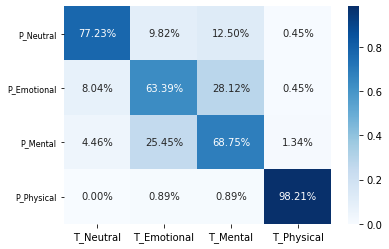

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       224
           1       0.64      0.63      0.64       224
           2       0.62      0.69      0.65       224
           3       0.98      0.98      0.98       224

    accuracy                           0.77       896
   macro avg       0.77      0.77      0.77       896
weighted avg       0.77      0.77      0.77       896



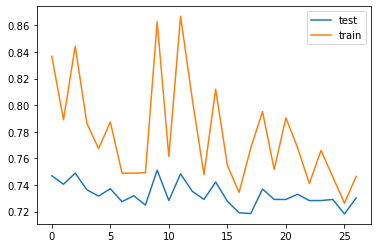

In [263]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras.constraints import maxnorm
import numpy as np

pred = grid_result.predict(X_test_anova_filter)

y_test2=np.argmax(y_test_one, axis=1)

print("Accuracy: {:.3f}".format(accuracy_score(y_test2, pred)))

print("Confusion matrix:")

conf=confusion_matrix(y_test2, pred)
print(conf)

y_axis_labels = ['P_Neutral','P_Emotional','P_Mental','P_Physical'] 
x_axis_labels = ['T_Neutral','T_Emotional','T_Mental','T_Physical']
g=sns.heatmap(((conf*4)/np.sum(conf)), annot=True, 
            fmt='.2%', cmap='Blues', yticklabels=y_axis_labels, xticklabels=x_axis_labels,)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
plt.show()


print(classification_report(y_test2, pred))

test_scores = grid_result.cv_results_['mean_test_score']
train_scores = grid_result.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()